<a href="https://colab.research.google.com/github/oweskhan77/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Netflix-Movies-and-TV-Shows-Clustering**






##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**           - Owes Khan (Cohort Zurich)

# **Project Summary -**

**Project Name:** Netflix Movies and TV Shows Clustering

In this project  dataset consists of tv shows and movies available on Netflix as of 2019.The aim of this project is to find clusters.In this project, required to do: (1)Exploratory Data Analysis, (2) Understanding what type content is available in different countries, (3) Is Netflix has increasingly focusing on TV rather than movies in recent years,  (4) Clustering similar content by matching text-based features.

**Data Description:**
* **show_id :** Unique ID for every Movie / Tv Show

* **type :** Identifier - A Movie or TV Show

* **title :** Title of the Movie / Tv Show

* **director :** Director of the Movie

* **cast :** Actors involved in the movie / show

* **country :** Country where the movie / show was produced

* **date_added :** Date it was added on Netflix

* **release_year :** Actual Releaseyear of the movie / show

* **rating :** TV Rating of the movie / show

* **duration :** Total Duration - in minutes or number of seasons

* **listed_in :** Genere

* **description:** The Summary description



# **GitHub Link -**https://github.com/oweskhan77/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do:**


*   Exploratory Data Analysis
*   Understanding what type content is available in different countries

*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features











# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [68]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as map
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [69]:
# Load Dataset
data_path='https://github.com/oweskhan77/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv?raw=true'
df=pd.read_csv(data_path)

### Dataset First View

In [70]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [71]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [72]:
df['duration'].nunique

<bound method IndexOpsMixin.nunique of 0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object>

### Dataset Information

In [73]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [74]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [75]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

* 2389 nulls in 'director'
* 718 nulls in 'cast'
* 507 nulls in 'country'
* 10 nulls in 'date_added'
* 7 nulls in rating

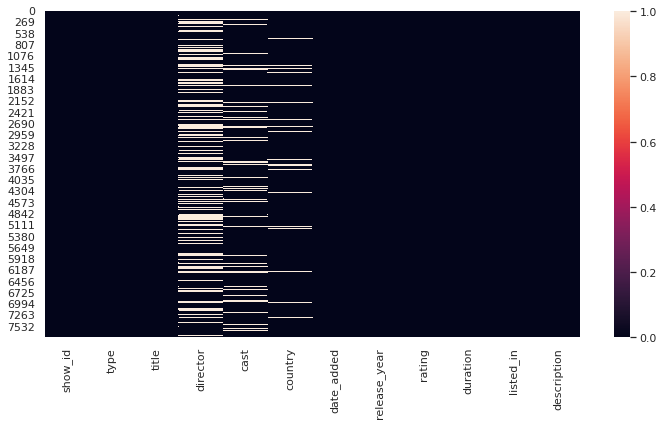

In [76]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

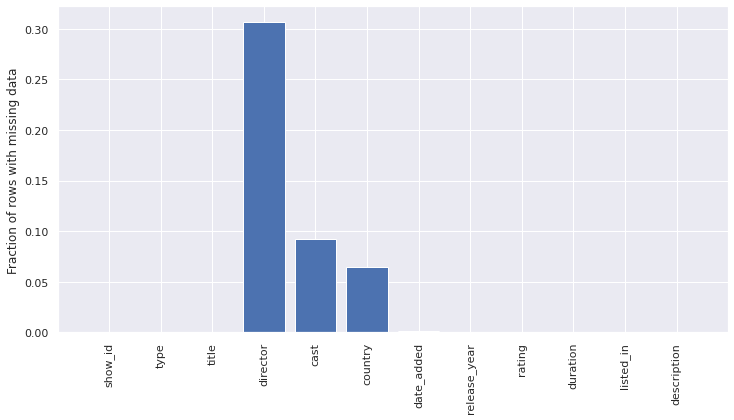

In [77]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

### What did you know about your dataset?

The dataset given is a dataset of TV Shows and Movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

From this dataset we have to find Exploratory Data Analysis,   Understanding what type content is available in different countries, Is Netflix has increasingly focusing on TV rather than movies in recent years and Clustering similar content by matching text-based features.

The above dataset has 7787 rows and 12 columns. There are some mising values so we need to handle the null values but no duplicate values in the dataset.The columns that have missing values are as follows: (1)director (2)cast (3)country (4)date_added (5)rating.

## ***2. Understanding Your Variables***

In [78]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [79]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

* **show_id :** Unique ID for every Movie / Tv Show

* **type :** Identifier - A Movie or TV Show

* **title :** Title of the Movie / Tv Show

* **director :** Director of the Movie

* **cast :** Actors involved in the movie / show

* **country :** Country where the movie / show was produced

* **date_added :** Date it was added on Netflix

* **release_year :** Actual Releaseyear of the movie / show

* **rating :** TV Rating of the movie / show

* **duration :** Total Duration - in minutes or number of seasons

* **listed_in :** Genere

* **description:** The Summary description

### Check Unique Values for each variable.

In [80]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [81]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to data
data=df.copy()

# Create two data frames saperate one contains the TV Show data and second one contains the Movie data
df_tv=data[(data['type']=="TV Show")]
df_movie=data[(data['type']=="Movie")]

In [82]:
#movie duration subsetting

# convert object data to int (for purpose of classification)
df_movie['duration']=df_movie['duration'].str.replace(' min','')
df_movie['duration']=df_movie['duration'].astype(str).astype(int)

# convert object data to int (for purpose of classification)
df_tv['duration']=df_tv['duration'].str.replace(' Seasons','')
df_tv['duration']=df_tv['duration'].str.replace(' Season','')
df_tv['duration']=df_tv['duration'].str.replace('s','')
df_tv['duration']=df_tv['duration'].astype(str).astype(int)


In [83]:
# Create three dataframes
# create 3 dataframe which classify the movies in to three class

long_movie= df_movie[df_movie['duration'] >= 150]
av_time_movie= df_movie[ (df_movie['duration'] < 150) & (df_movie['duration'] > 100 )]
short_movie= df_movie[df_movie['duration'] <= 100]

print("Number of long movies are :",len(long_movie))
print("Number of Average time movies are :",len(av_time_movie))
print("Number of Short movies are :",len(short_movie))

Number of long movies are : 243
Number of Average time movies are : 2191
Number of Short movies are : 2943


In [84]:
#changed date added to datetime object 

# convert "date_added" column in to datetime format
data["date_added"] = pd.to_datetime(data['date_added'])

# create two columns year and month for analysis purpose.
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [85]:
# get unique catogorties for classification

data["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [86]:
#Assigning the Ratings into grouped categories

ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)

# Find the which is the target audiance for any program.
data["target_ages"].value_counts()

Adults        3620
Teens         2317
Older Kids    1330
Kids           513
Name: target_ages, dtype: int64

In [87]:
# create dataframe for getting the name of actors

actor_df=data["cast"].fillna('')
actor_df.isnull().sum()

0

In [88]:
# fuction for count actor name

def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(actor_df)
  for i in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[i]).split(","))
  for i in cast_count_final:
    if i not in cast_count:
      cast_count[i] = cast_count_final.count(i)
  return cast_count

In [89]:
cast_df = convert_to_list(data)
casts_df = pd.DataFrame.from_dict(cast_df, orient='index', columns=['count'])

#highest number movie for actors
casts=casts_df.sort_values('count', ascending=False).drop('').reset_index()
casts

index  count
0             Anupam Kher     38
1        Takahiro Sakurai     28
2          Shah Rukh Khan     27
3                 Om Puri     27
4             Boman Irani     25
...                   ...    ...
35367    Juan Manuel Diaz      1
35368           Ana Wills      1
35369   Mauricio Figueroa      1
35370    Matias Maldonado      1
35371         Rachel Khoo      1

[35372 rows x 2 columns]

In [90]:
# create dataframe for getting the name of genre

genre=data["listed_in"]

In [91]:
# fuction for count the genre name

def convert_to_list(df):
  genre_count = {}
  genre_count_final = []
  genre_list = list(genre)
  for i in range(len(genre_list)):
    genre_count_final.extend(str(genre_list[i]).split(","))
  for i in genre_count_final:
    if i not in genre_count:
      genre_count[i] = genre_count_final.count(i)
  return genre_count

In [92]:
genre_df = convert_to_list(data)
genre_df = pd.DataFrame.from_dict(genre_df, orient='index', columns=['count'])

#highest number genres
genre_df.sort_values('count', ascending=False)


count
 International Movies       2323
Dramas                      1384
Comedies                    1074
Documentaries                751
 Dramas                      722
...                          ...
Romantic Movies                3
Spanish-Language TV Shows      2
Sports Movies                  1
TV Sci-Fi & Fantasy            1
LGBTQ Movies                   1

[73 rows x 1 columns]

### What all manipulations have you done and insights you found?

I have done many manipulation in data. First I created two dataframe on the basis of TV Show and Movies , this is because of I want to classify the Movies in to three catogories Long, Average and Short time movies.

Second one is, I created new column in which I categoried the rating.From this I found that targeted audience is Adults.

Third one is, change the datatype of "data_added" column for analysis and also created two separate columns for further analysis Year and Months.

Other one is, I created two functions and got top actors and genres from the data.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Function to plot some basic graphs

In [93]:
#Function to plot countplot
def count_plot(col, df, Order = None):
  '''This function plots the count plot for the passed feature
     Pass column name (str), Pandas DataFrame, Order (list of indexes) to plot the graph.'''
  plt.figure(figsize = (20,7))
  plt.title(f'Count plot of {col}')
  sns.countplot(x=col,data=df, order = Order)
  plt.xticks(rotation = 90)
  plt.show()

countplot will be used for the better visuallization of the observational counts of the categorical variable. As it puts observational counts in different category-based bins using bars.

In [94]:
#Function to plot Pie chart
def pie_chart(col):
  '''This function plot the pie chart for the given data.
  Pass the feature name in str to plot the pie chart.'''
  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(df[col].value_counts())
  df[col].value_counts().plot.pie(autopct = '%1.1f%%', explode = exp)
  plt.title(f'percentage distribution of {col}')
  plt.axis('off')
  plt.show()

Pie charts are very much useful in displaying relative proportions of multiple classes of data. 

In [95]:
def col_word_cloud(col, w_df):
  ''' This function will show the WordCloud for the passed feature'''
  plt.figure(figsize = (15,7))
  text = " ".join(word for word in w_df[col])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

WordClouds offer a visible picture of text data. 

### Univariate Analysis

#### Chart - 1 - Type (TV Shows/ Movies) 

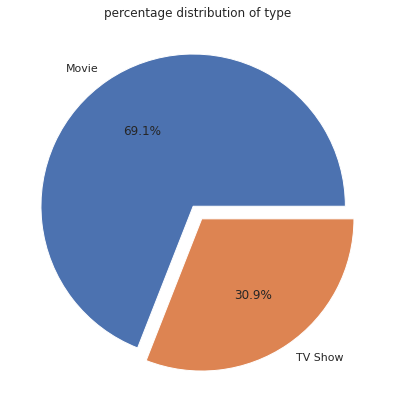

In [96]:
# Chart - 1 visualization code
pie_chart("type")

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

Here we get information that this dataset contains 5377 rows for Movies which is 69.1% and 2410 rows for TV Show which is 30.9%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the given data we can say that the data given here is more about Movies. It is impect on clustering.From this chart we can take further decisions because this chart shows Movies are watched more than TV shows on Netflix.With its reference we can decide the next strategy.

#### Chart - 2

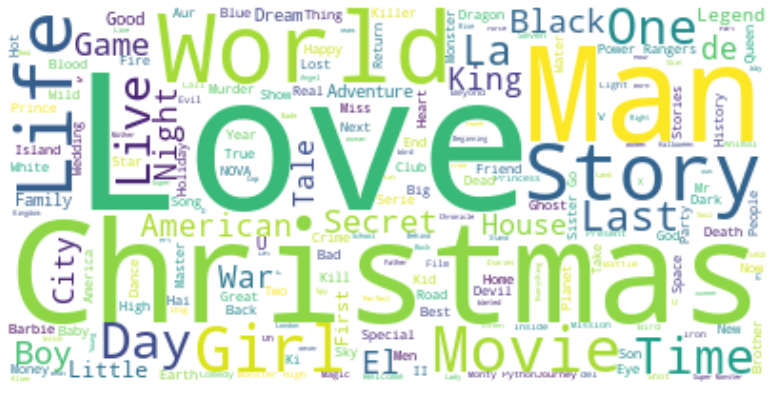

In [97]:
# Chart - 2 visualization code
col_word_cloud('title',df)

##### 1. Why did you pick the specific chart?

Word cloud chart. A word cloud is a visual representation of text data using color and font size to represent the frequency of a term or topic. Wordcloud visualizations make it easy to read and understand the most prominent terms.

##### 2. What is/are the insight(s) found from the chart?

It seems like words like "Christmas","Love", "Man", "World", "Story" are very common in titles.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this chart we can know which words occurs many times in the data.From this we can predict that what kind of data and and which type of titles for the TV Shows and Movies.

A major disadvantage here that we cannot draw any definite conclusion because it works on the frequency of the work.

#### Chart - 3

In [98]:
# Chart - 3 visualization code
#Directors having most counts of movies
df[df['director']!= 'Unknown']['director'].value_counts().head(20)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Robert Rodriguez           8
Kunle Afolayan             8
Hakan Algül                8
Shannon Hartman            8
Johnnie To                 8
Quentin Tarantino          8
Lance Bangs                8
Don Michael Paul           7
McG                        7
Justin G. Dyck             7
Name: director, dtype: int64

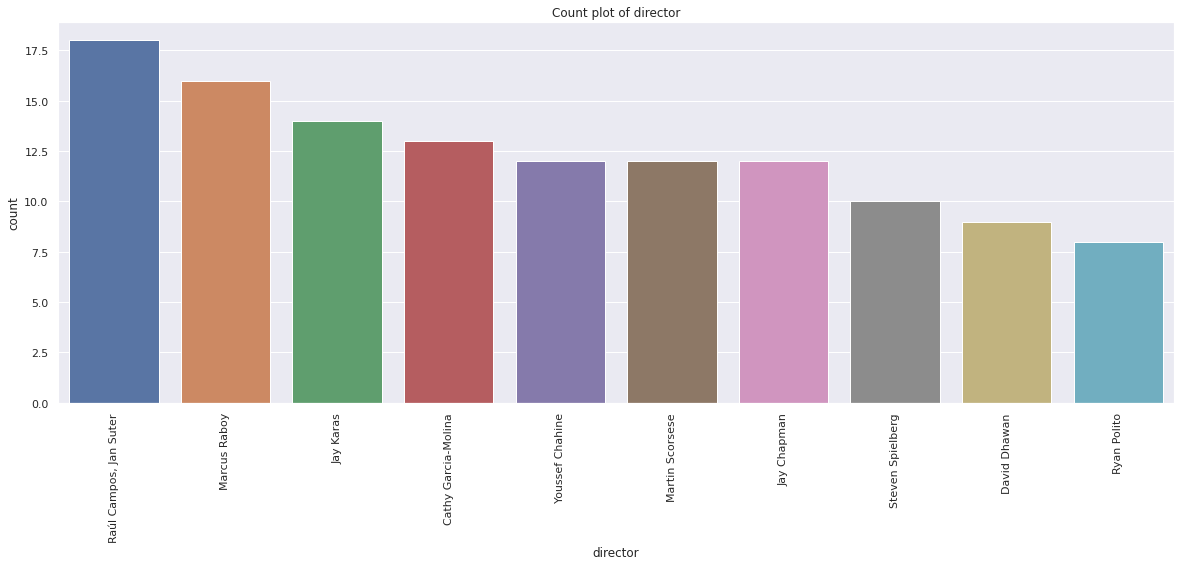

In [99]:
#Plotting the bar graph for top 10 directors who have most number of shows/movies in the dataset.
count_plot('director', df, df[df['director']!= 'Unknown']['director'].value_counts().head(10).index)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?


From the bar plot we found top 10 Directors with most number of Movies/Shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this information we can get better transparency on the bussiness. This information is very important for bussiness. From this information we can know that what is the contribution of which director in Entertainment field and also we can know that which director makes how many films and TV shows.



#### Chart - 4

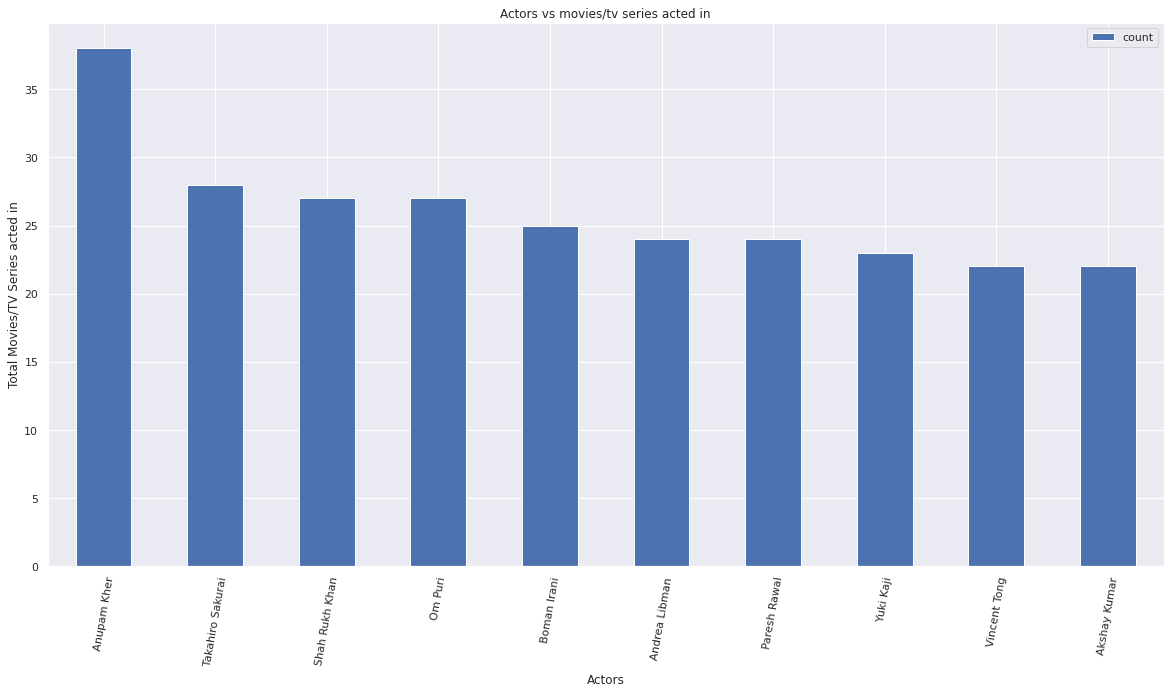

In [100]:
# Chart - 4 visualization code
# use the data frame which is created in data wrangling part.
casts_df.sort_values('count', ascending=False).drop('')

# plot for top actors and count

plt.rcParams["figure.figsize"] = (20, 10)
casts_df.sort_values('count', ascending=False).drop('').head(10).plot(kind='bar') # here we drop '' because we use it instead of nan
plt.xlabel("Actors")
plt.ylabel("Total Movies/TV Series acted in")
plt.title("Actors vs movies/tv series acted in")
plt.xticks(rotation=80)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

I found many information from this graph. I found that Top Actors with highest count of Movies/TV Shows on Netflix. Top actor is Anupam Kher.This data shows  Anupam Kher has worked 35-40 times.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This data (visulization) has a good effect in bussiness. From this information we can say that being a top actor, Anupam Kher must be charging good money. From this data, we can also decide the budget of Movie and TV Shows. From this data we can say which actor is more active and more famous.

#### Chart - 5

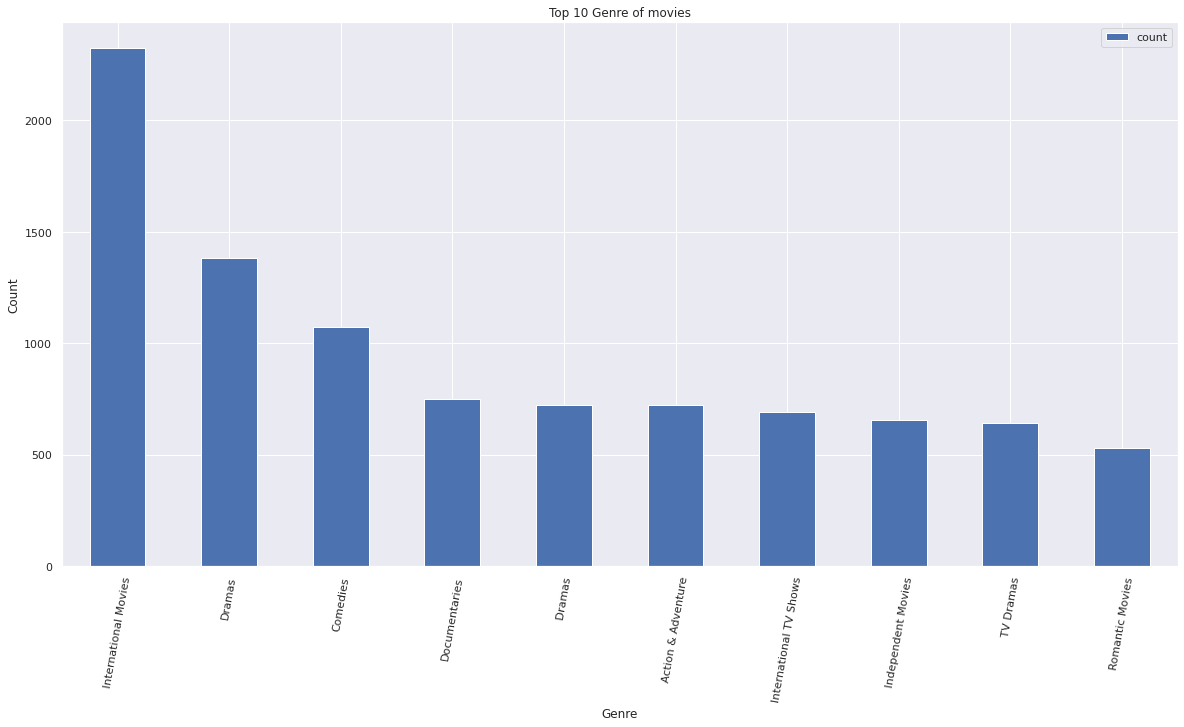

In [101]:
# Chart - 5 visualization code
# use the data frame which is created in data wrangling part.
genre_df .sort_values('count', ascending=False)

# plot for top actors and count

plt.rcParams["figure.figsize"] = (20, 10)
genre_df .sort_values('count', ascending=False).head(10).plot(kind='bar') 
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Genre of movies")
plt.xticks(rotation=80)
plt.show()

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

I found many information from this graph. I found that Top  Genre withh highest count of Movies/TV Shows on Netflix. Top Genre is International Movies.This data shows  International movies are more than 2000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This data (visulization) has a good effect in bussiness. From this information we can say that top  genre is International Movies, People like such movies more as compare to others. From this data we can say what are other genres are more famous.

#### Chart - 6

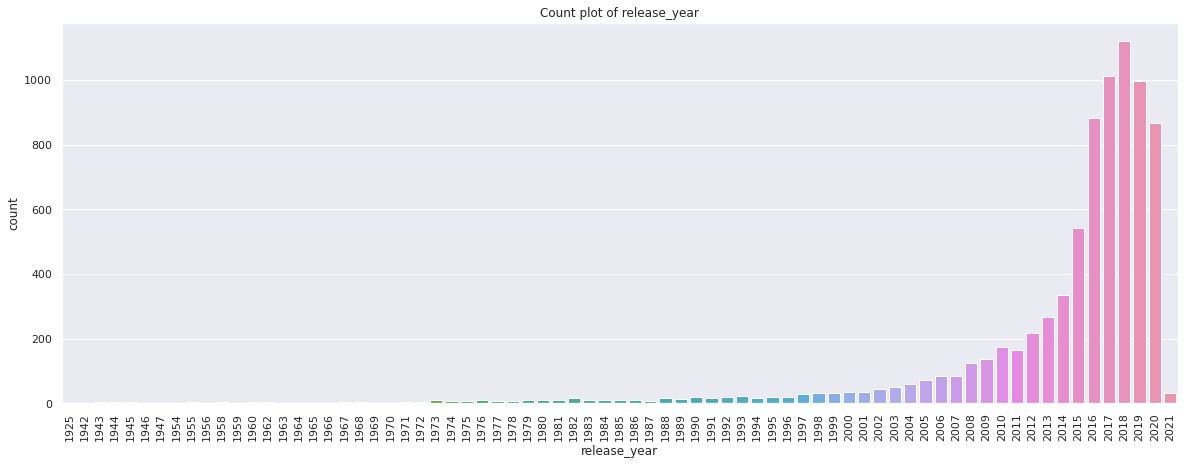

In [102]:
# Chart - 6 visualization code
#Count plot for release year
count_plot('release_year', df)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is a sudden rise in the number of TV shows and Movies from year 2010.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From above chart we can see that company is growing yearly in exponetial manner from 2010 to 2018 but there is decrease in 2019 and 2020 it show negative impact.

#### Chart - 7

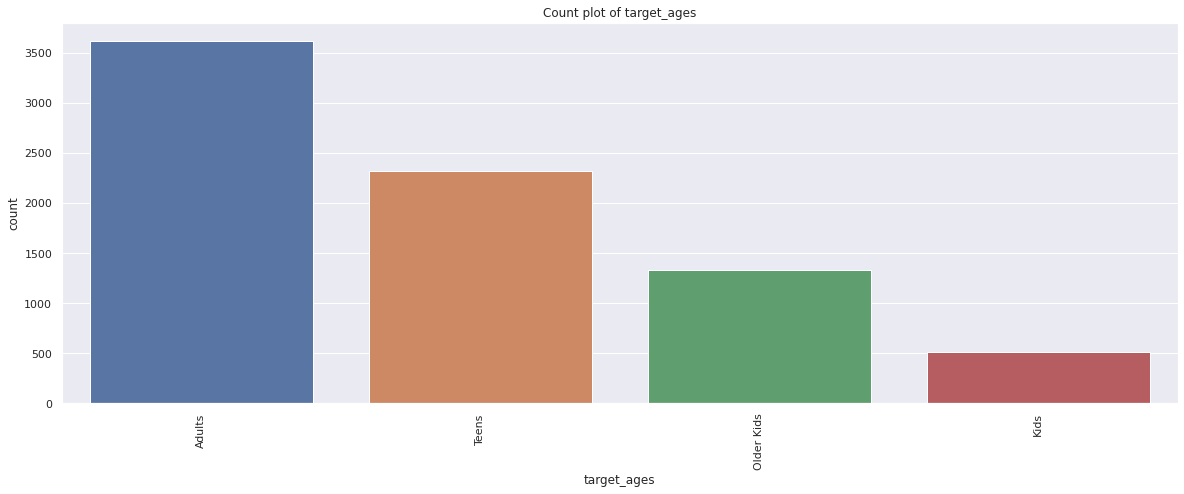

In [103]:
# Chart - 7 visualization code
count_plot('target_ages', data)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

From above graph we can see that the most targeted auduience is Adults then teens.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,the gained insights help creating a positive business impact. From the information we get, we can know what kind of content we should provide for company growth and business expansion.Majority of the audience here is adults so it can be known from here to give something that they like. We can take advertisements that are used by adults.

#### Chart - 8 - Duration Analysis (Univariate Analysis)

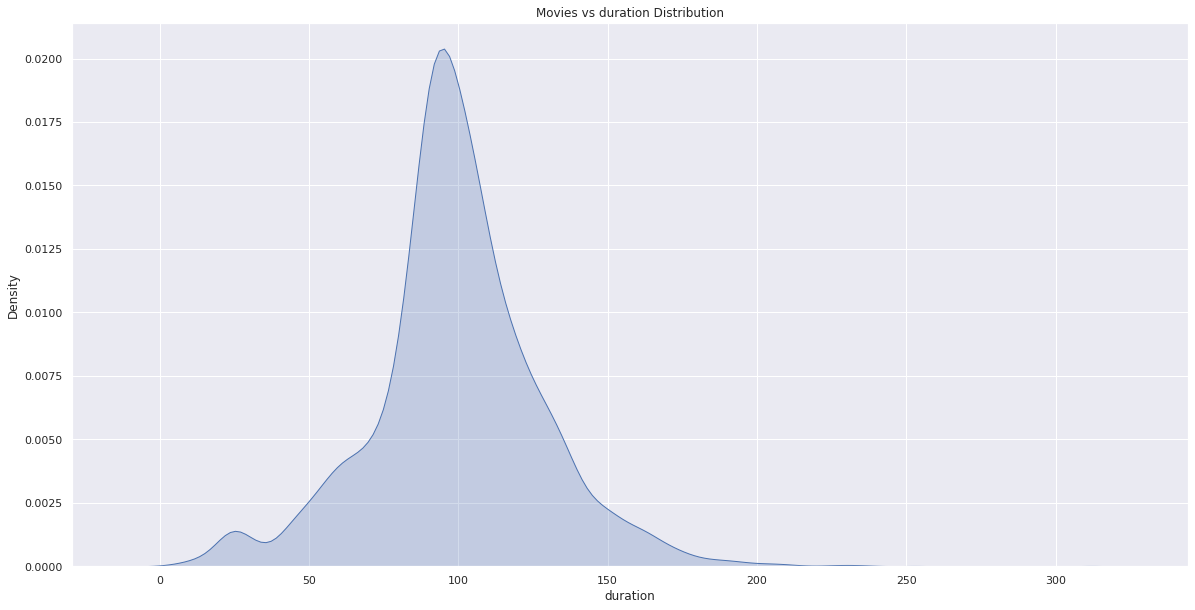

In [104]:
# Chart - 8 visualization code

sns.set(style="darkgrid")
sns.kdeplot(data=df_movie['duration'], shade=True)
plt.title("Movies vs duration Distribution")
plt.show()

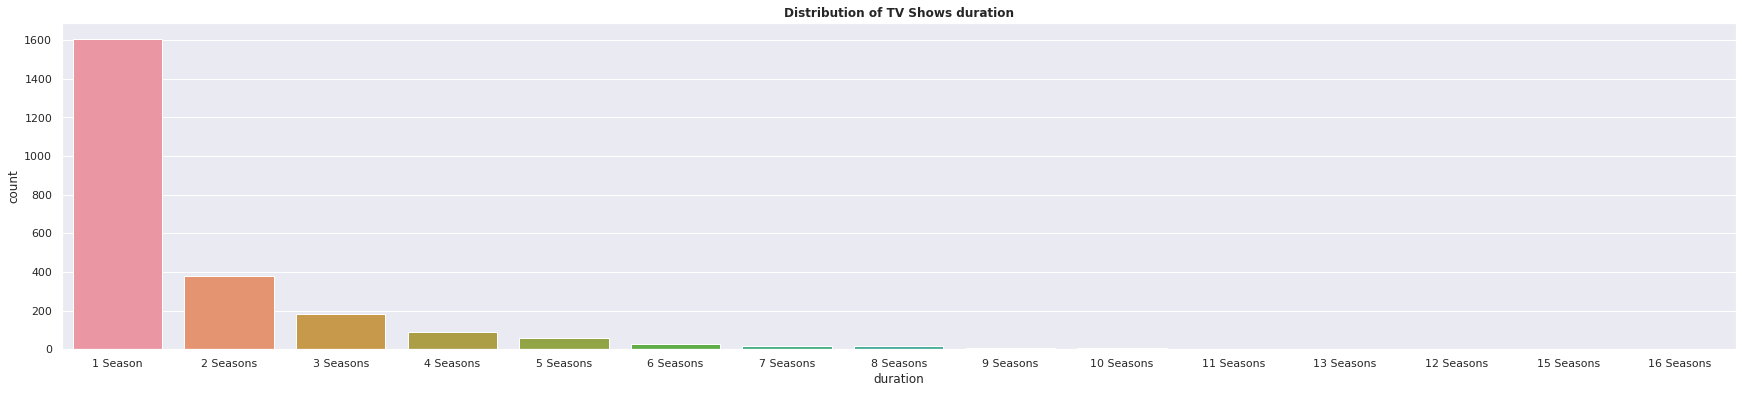

In [124]:
df_tv_show=data[(data['type']=="TV Show")]
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=df_tv_show['duration'],data=df_tv_show,order = df_tv_show['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

A density plot is a representation of the distribution of a numeric variable that uses a kernel density estimate to show the probability density function of the variable.

barchart for visulasing category and thier count.



##### 2. What is/are the insight(s) found from the chart?

From the first chart we can know that most content are about 70 to 120 min duration for Movies.

From the second chart we can know that most of the shows are 1 to 2 seasons long and other are less mostly 1 season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact. The given duration data can be used by us in future.From the given information we can determine the moive and tv show duration to be produces in future.


#### Chart - 9  Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [106]:
#Extracting year wise TV Show & Movie added
yr_added_movie = data[data['type'] == "Movie"]['year_added'].value_counts().reset_index().sort_values(by = 'index')
yr_added_tv = data[data['type'] == "TV Show"]['year_added'].value_counts().reset_index().sort_values(by = 'index')

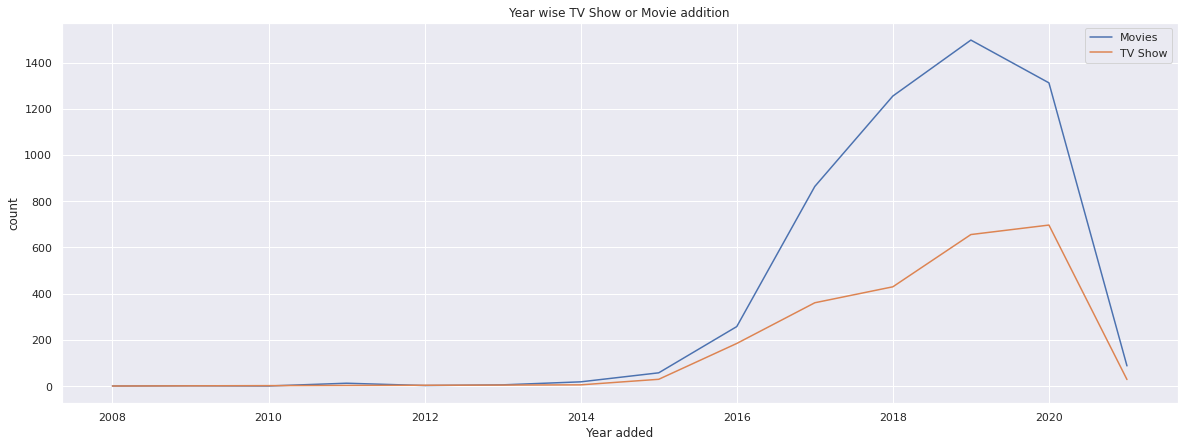

In [107]:
#Plotting a line graph
plt.figure(figsize = (20,7))
plt.plot('index','year_added', data = yr_added_movie, label = 'Movies')
plt.plot('index','year_added', data = yr_added_tv, label = 'TV Show')
plt.title('Year wise TV Show or Movie addition')
plt.xlabel('Year added')
plt.ylabel('count')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart, also referred to as a line graph or a line plot, connects a series of data points using a line. This chart type presents sequential values to help you identify trends. Most of the time, the x-axis (horizontal axis) represents a sequential progression of values.

##### 2. What is/are the insight(s) found from the chart?

we are able to compare the tvshows and movies realease in different year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph also we can infer that number of movie addition has decresed after 2019 whereas number of TV Show addition has increased after 2019.

This shows that netflix is focusing more on TV shows.

#### Chart - 10 (Description word analysis for Tv Shows and Movies)

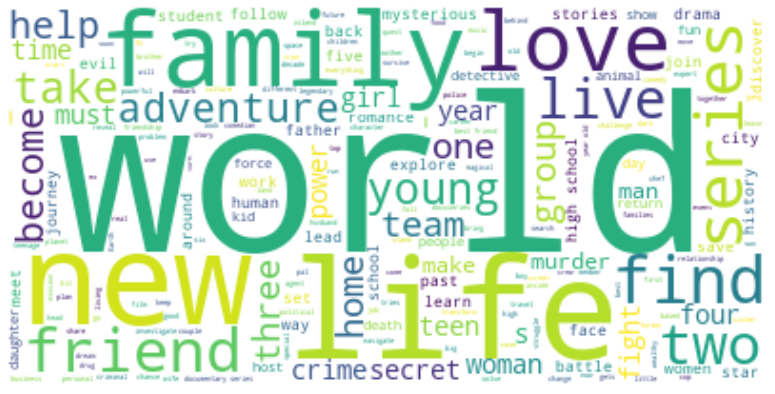

In [108]:
# Chart - 10 visualization code
# Visuallizing the wordcloud for description for TV Show
col_word_cloud('description', df_tv)


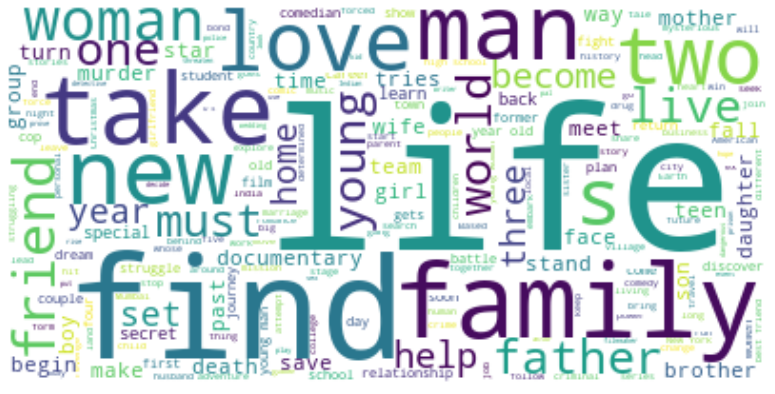

In [109]:
# Visuallizing the wordcloud for description for TV Show
col_word_cloud('description', df_movie)

##### 1. Why did you pick the specific chart?

Word cloud chart. A word cloud is a visual representation of text data using color and font size to represent the frequency of a term or topic. Wordcloud visualizations make it easy to read and understand the most prominent terms.

##### 2. What is/are the insight(s) found from the chart?

description of TV Shows contains more words like world, life, family, new, find, love etc. 

description of Movie also contains more words like life, find, family, love etc similar to TV Shows. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help the bussiness for future movies and shows what are  famous and important topics in audiencs.

#### Chart - 11 =  Q2. Country Wise Trend Analysis  ( Univariate + Bivariate  Analysis)
                      HERE WE GIVE THE ANSWER OF SECOND QUESTION OF PROJECT :
                      Understanding what type content is available in different countries

                      Top 10 Countries with more number of Productions
                      country vs genre
                      country vs rating
                      country vs type
                   
                 

In [110]:
# Chart - 5 visualization code

#count of unique column
data.country.nunique()

681

In [111]:
# Looking for countries and number of netflix productions

country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(data['country'][i])== str:
    split=data['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if data['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if data['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [112]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

**Top 10 Countries with more number of Productions**

In [113]:
#Top 15 countries
top_countries=country_df.head(10)
top_countries = top_countries[top_countries['country']!='']
top_countries

country  Productions  TV-Shows  Movies
0   United States         3297       866    2431
1           India          990        75     915
2  United Kingdom          723       256     467
3          Canada          412       126     286
4          France          349        84     265
5           Japan          287       184     103
6           Spain          215        57     158
7     South Korea          212       157      55
8         Germany          199        42     157
9          Mexico          154        53     101

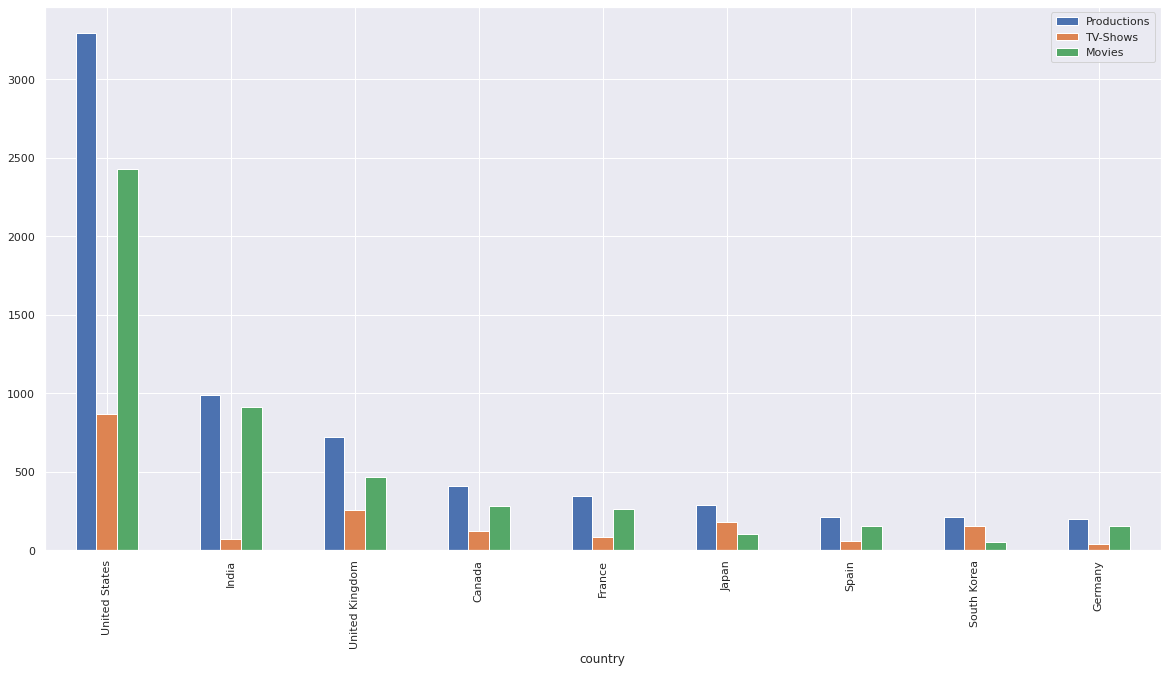

In [114]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")
plt.show()

*Above graph shows us  top 10 countries in number of production. 
US has the highest number of production of movies and tv shows then india and Uk.

**Plotting country wise trend for genre preference (country vs genre)**

In [115]:
#genre country wise
def get_genre_country_trends(data):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  data['country_list'] = data.apply(lambda x: explode_country(x['country']),axis=1)
  data = data.explode('country_list')
  data['genre_list'] = data.apply(lambda x: explode_country(x['listed_in']),axis=1)
  data = data.explode('genre_list')
  data.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df_ = data.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).head(10).plot.bar(x = "genre_list", y="title", color="skyblue", rot=90, figsize=(9,5))
    plt.title(f"{each}")
  return rating_country_df

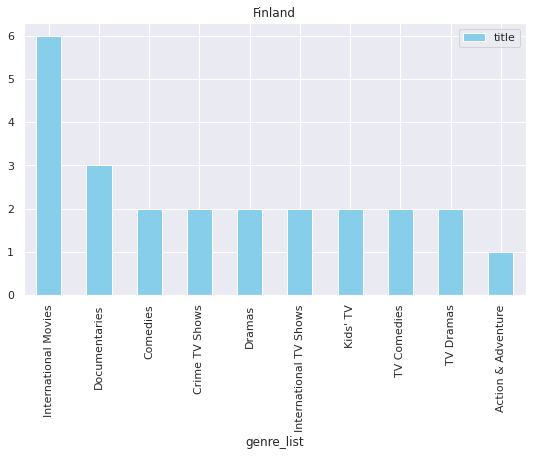

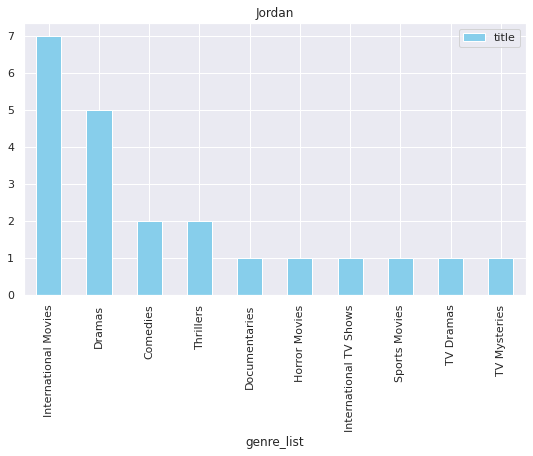

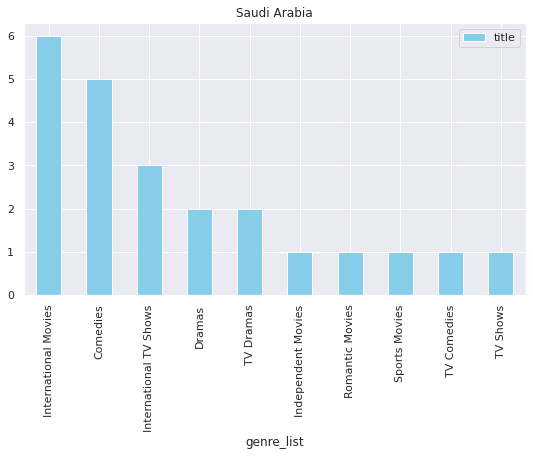

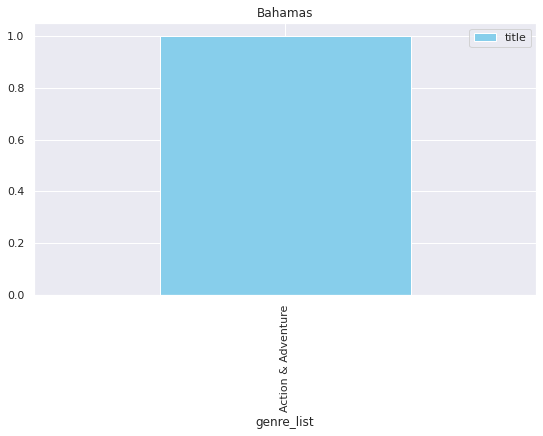

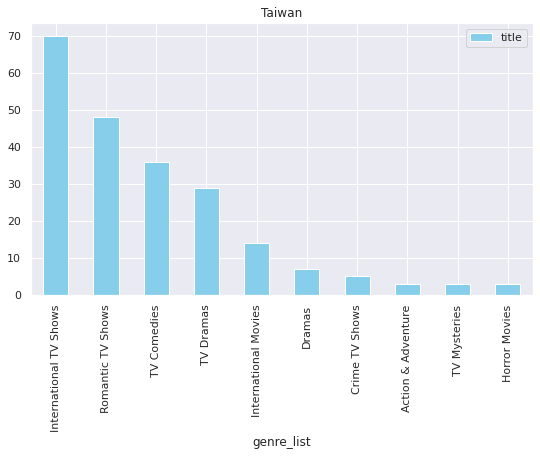

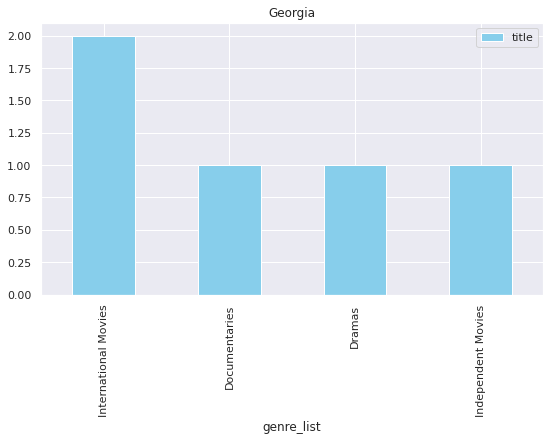

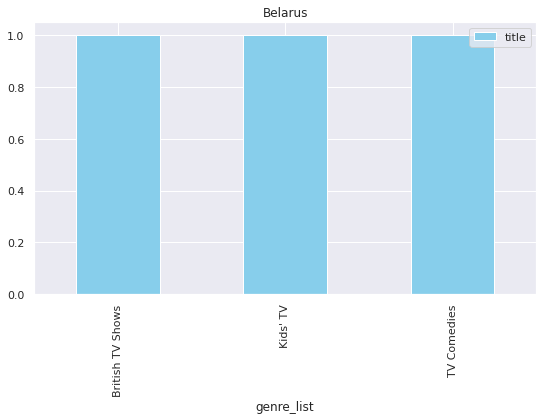

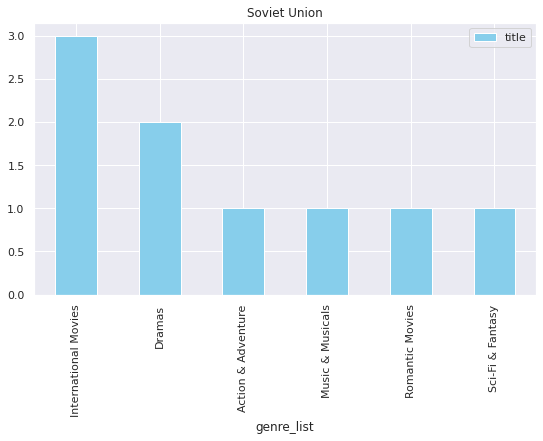

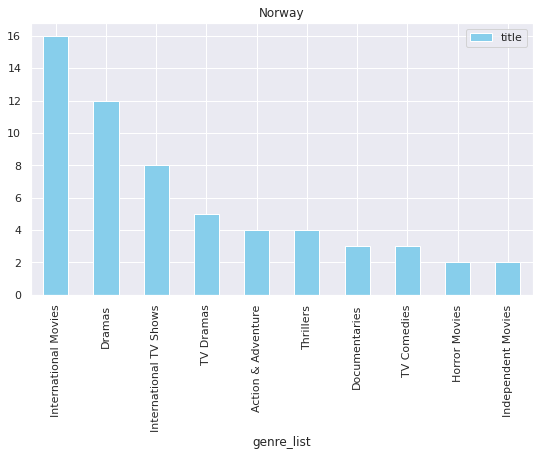

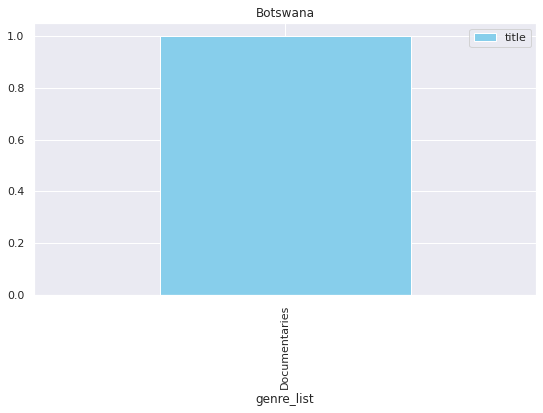

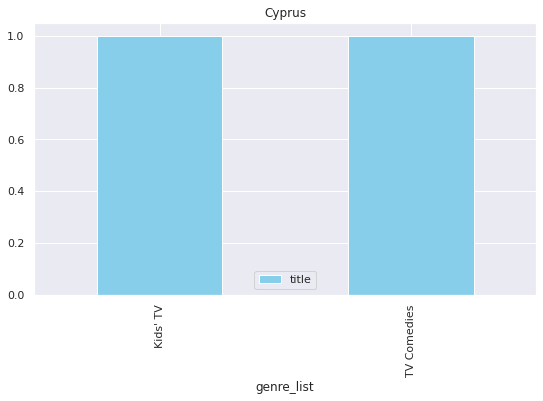

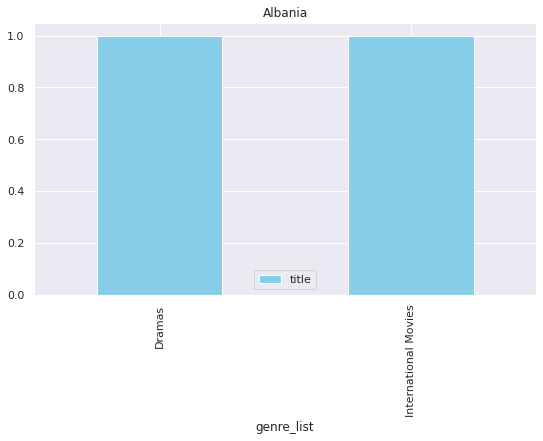

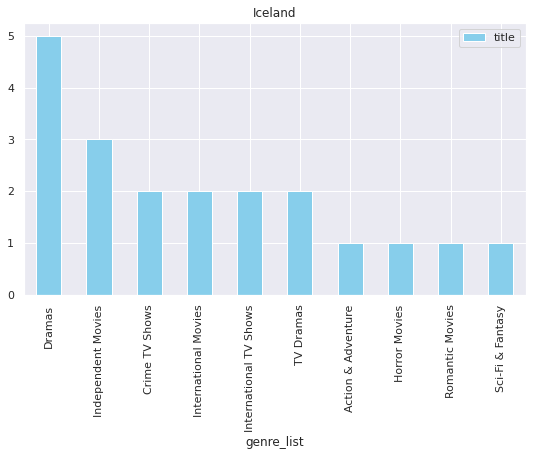

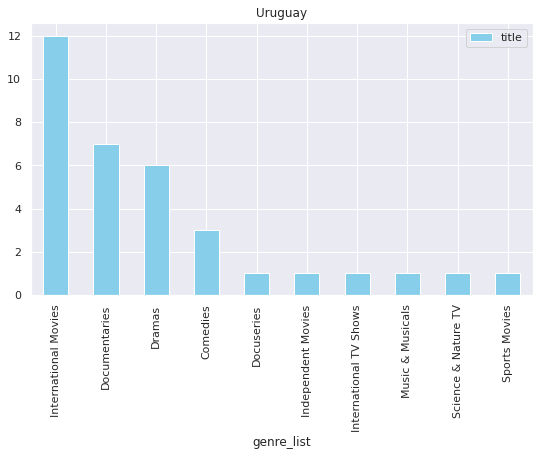

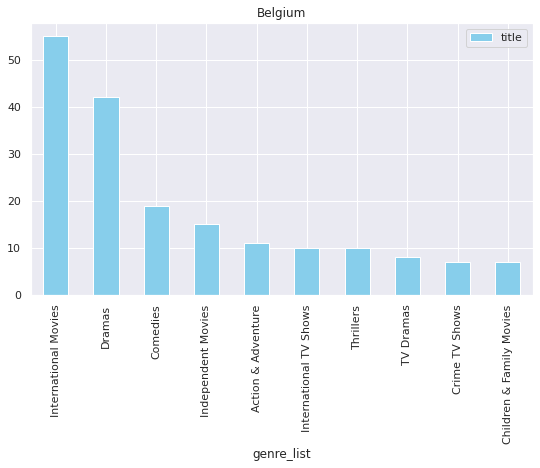

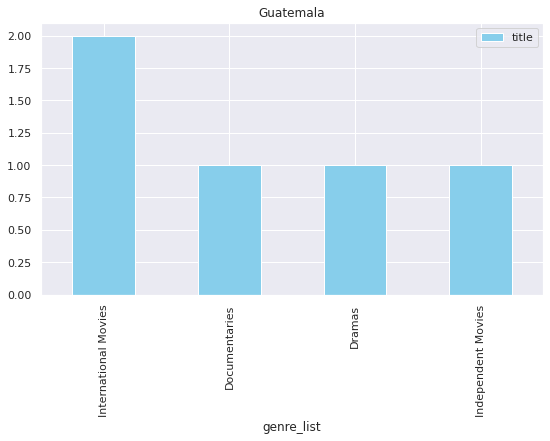

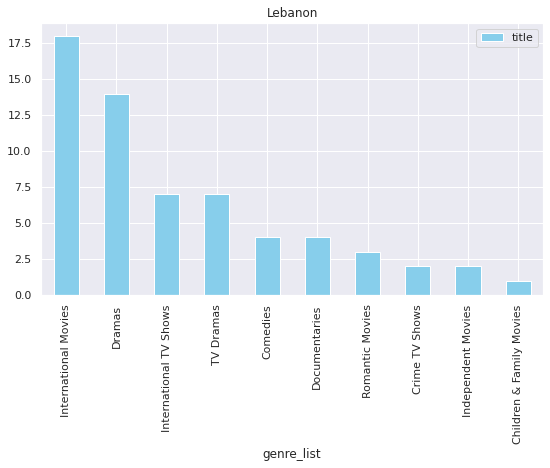

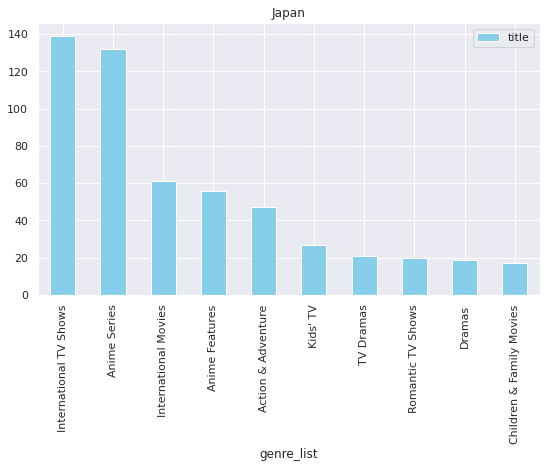

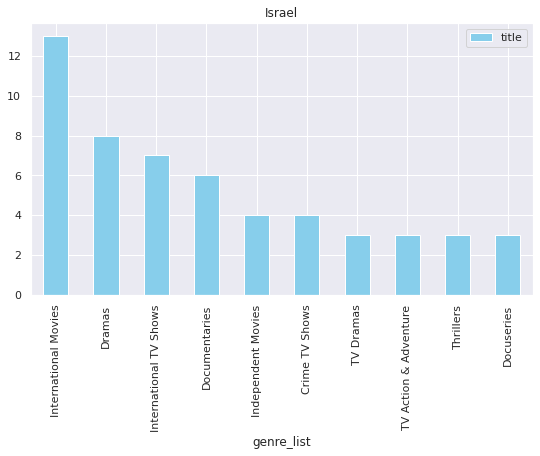

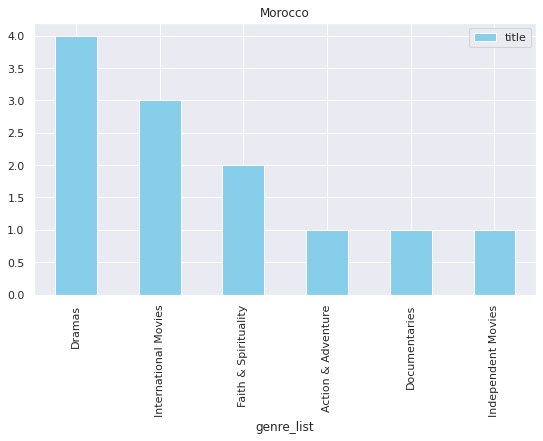

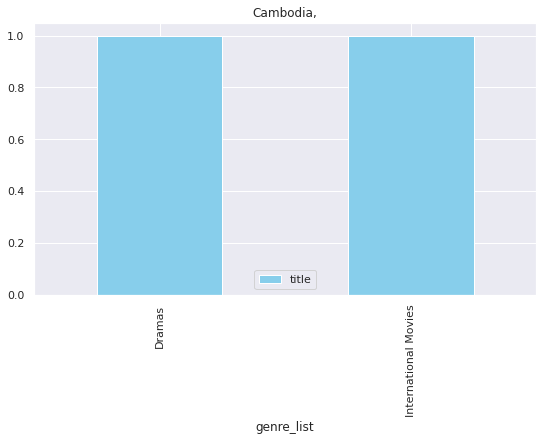

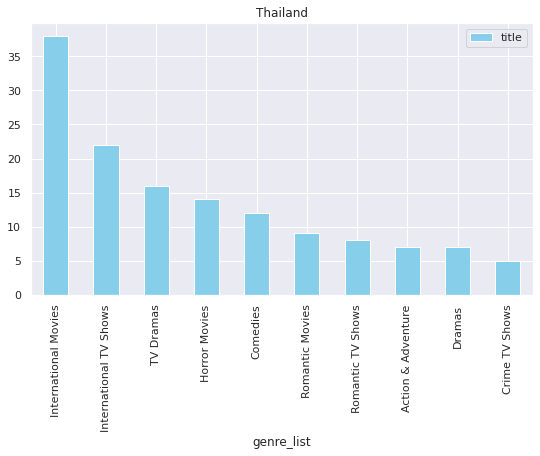

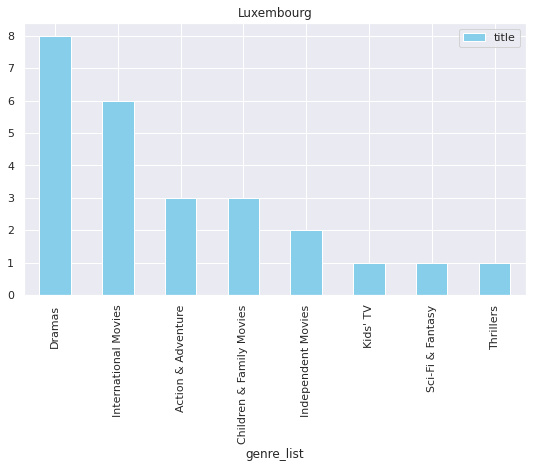

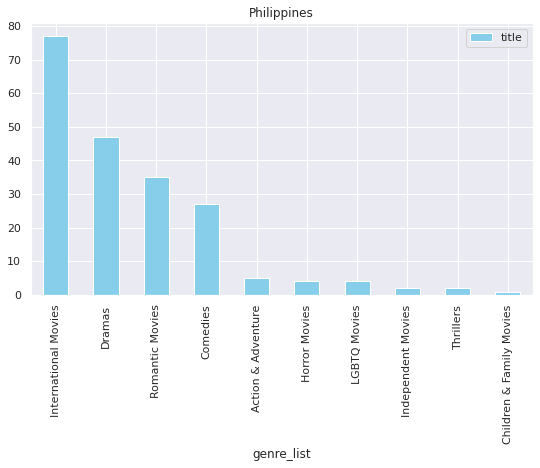

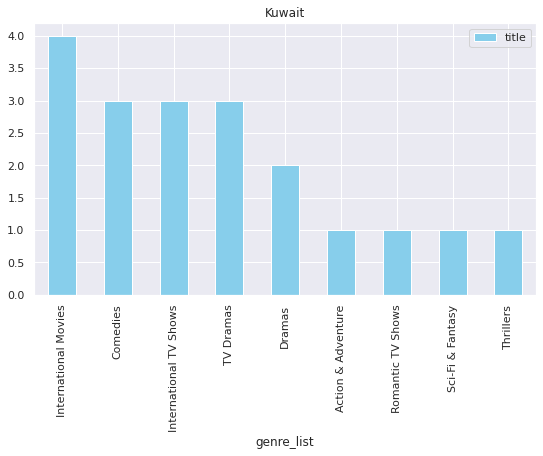

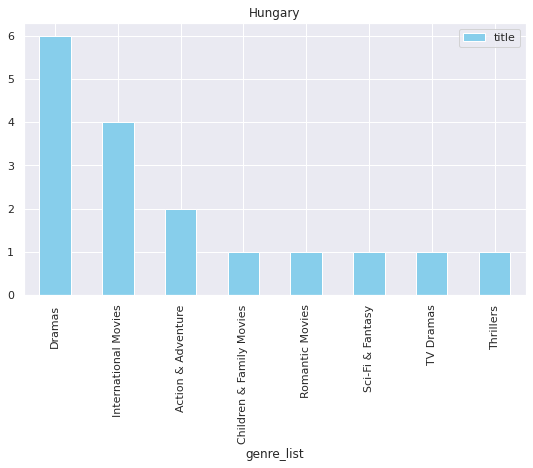

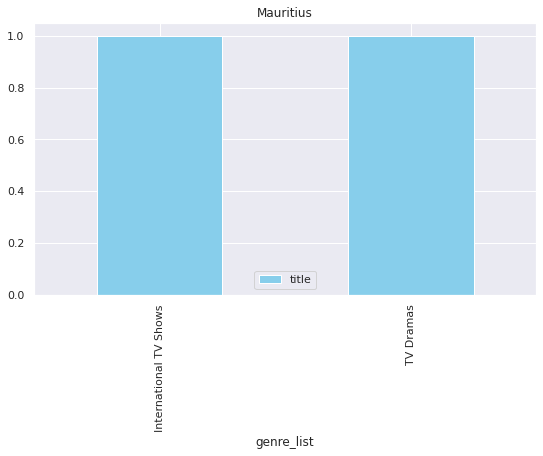

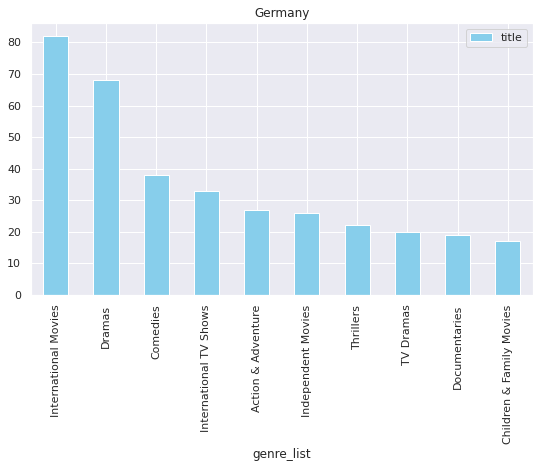

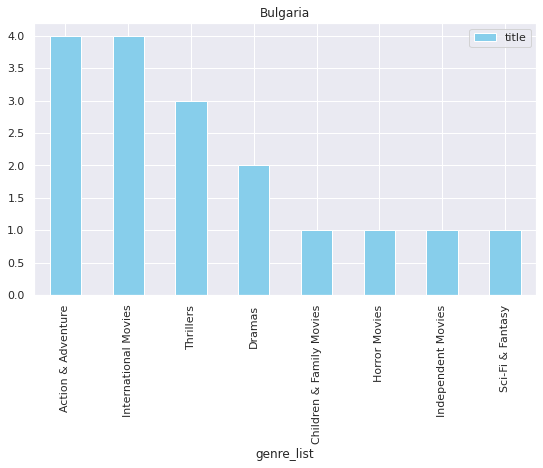

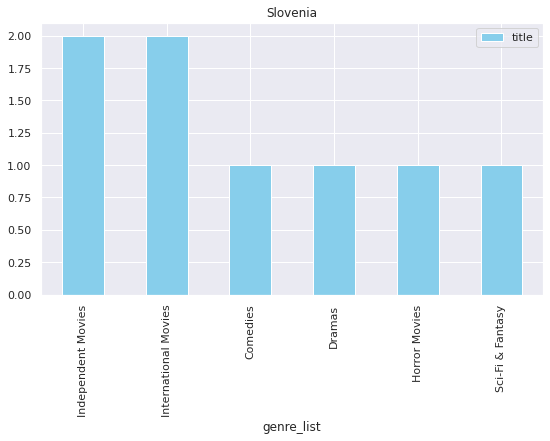

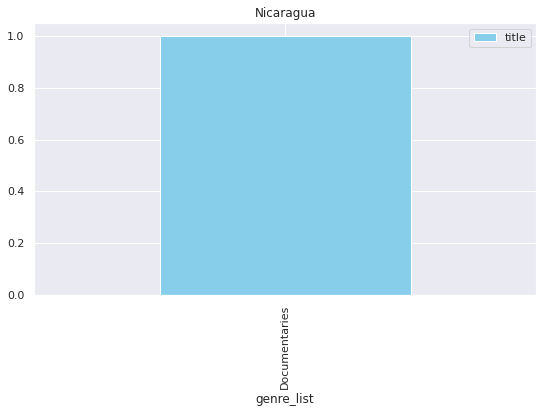

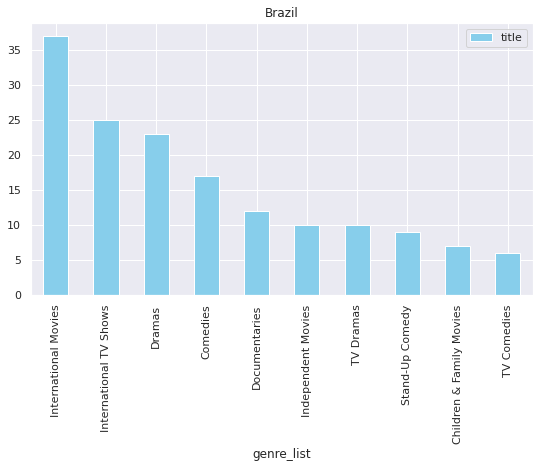

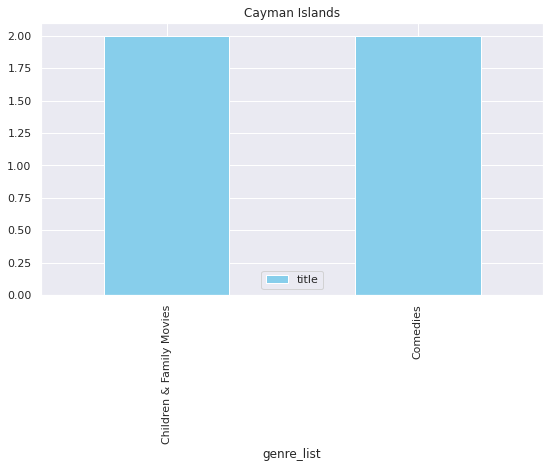

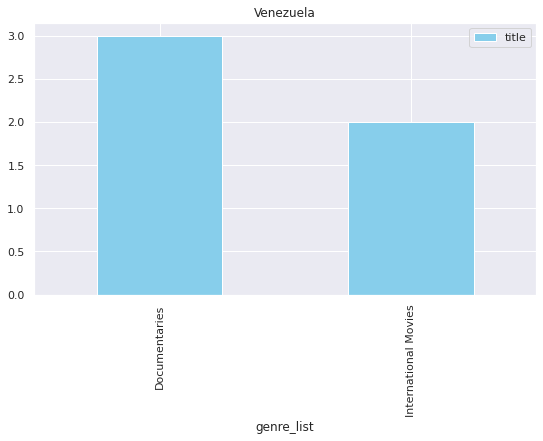

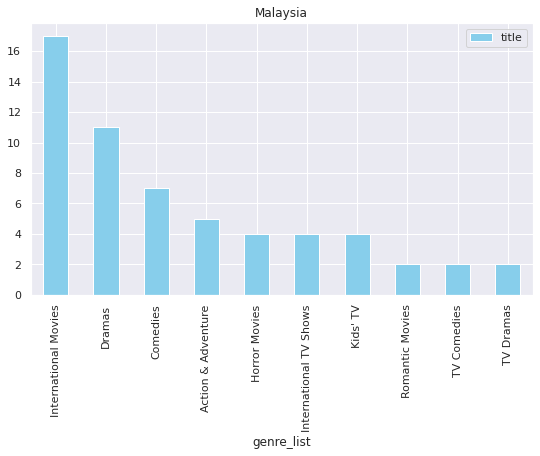

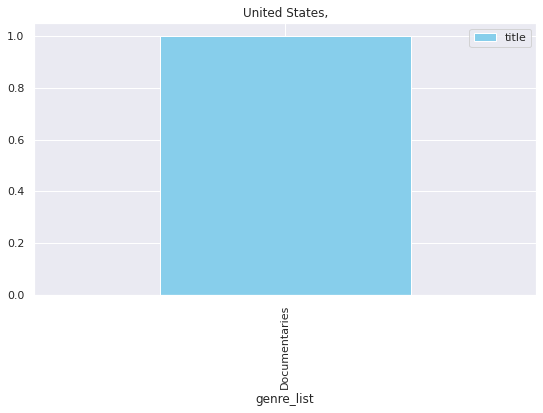

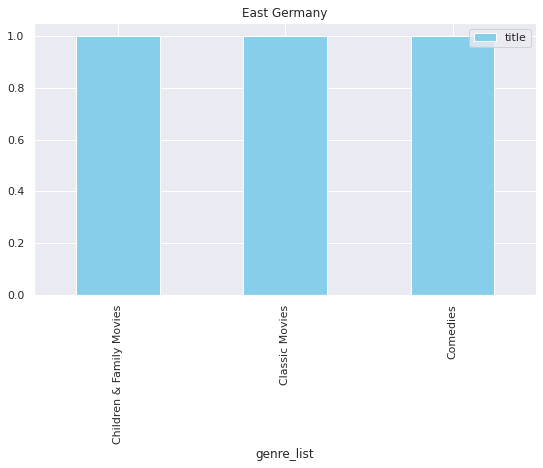

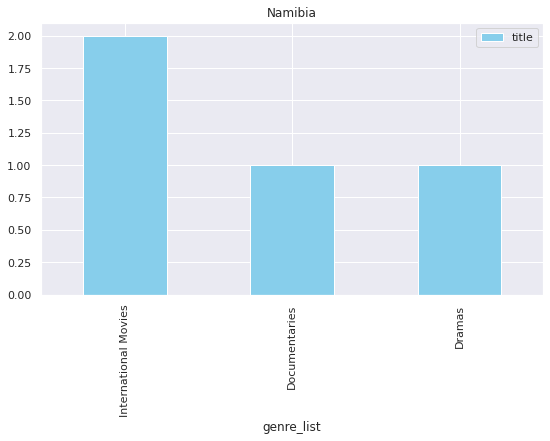

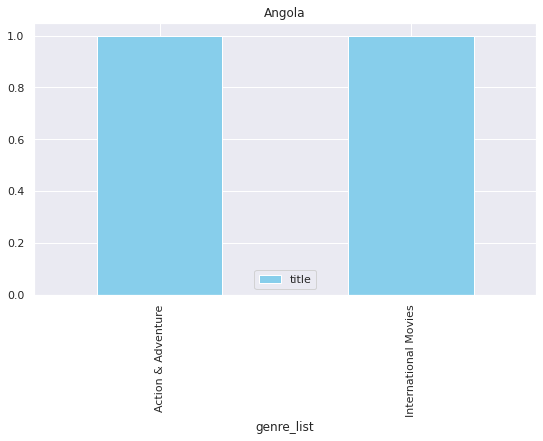

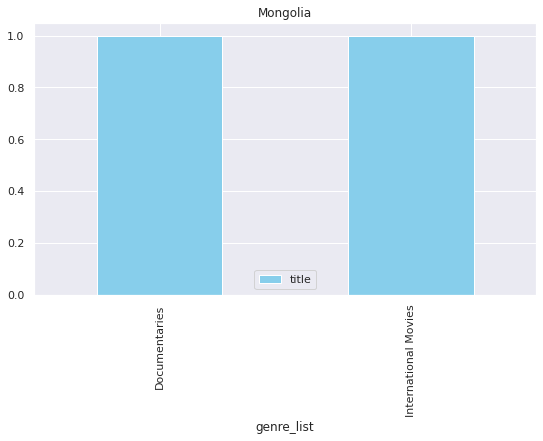

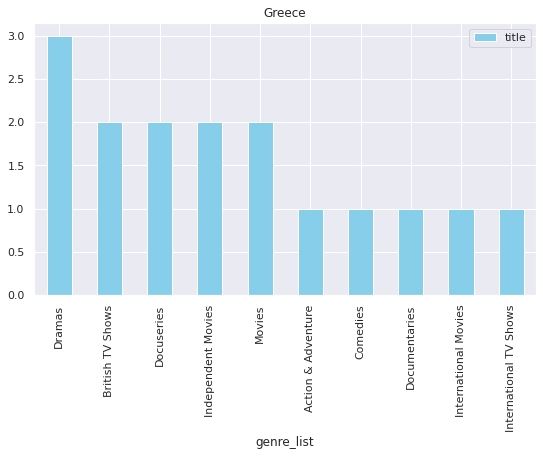

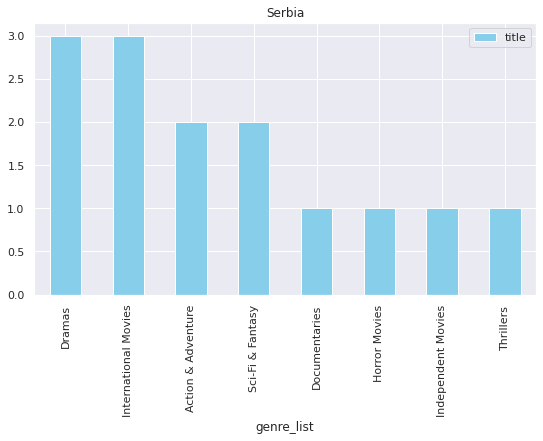

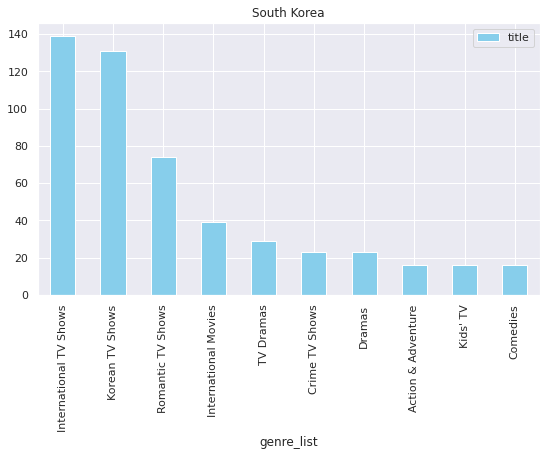

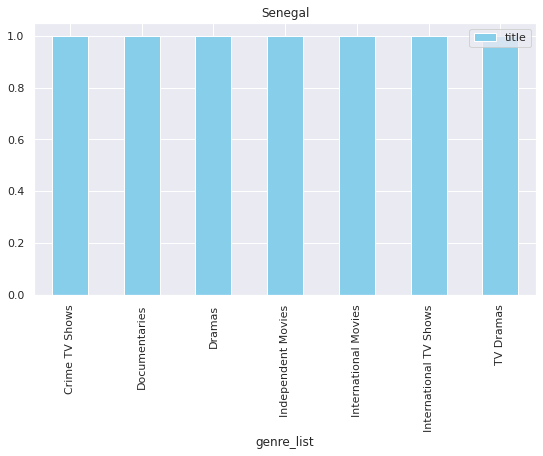

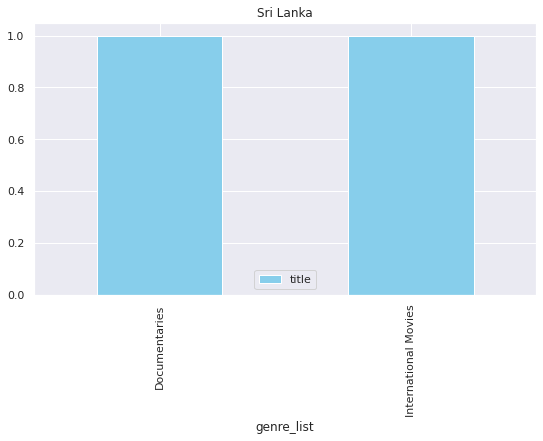

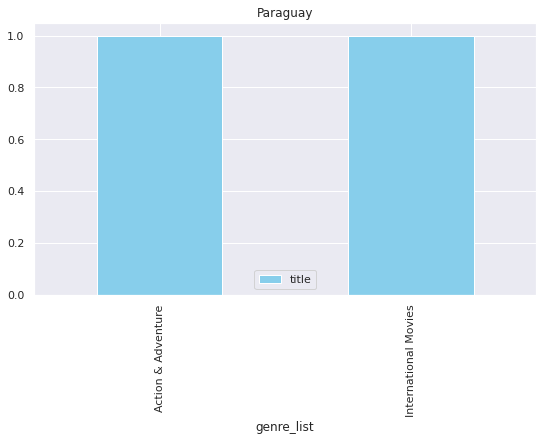

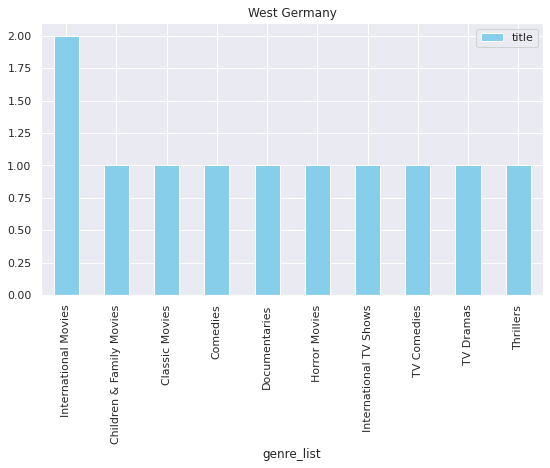

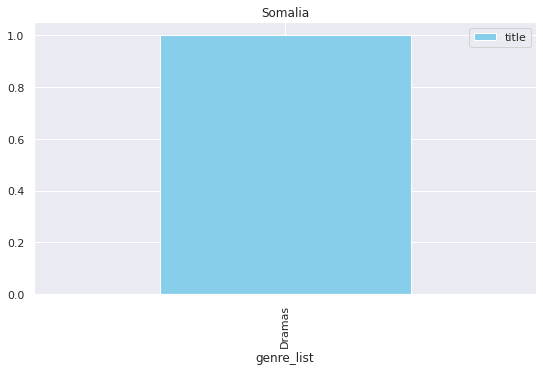

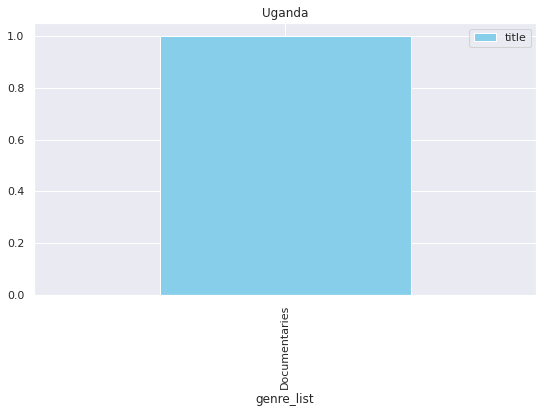

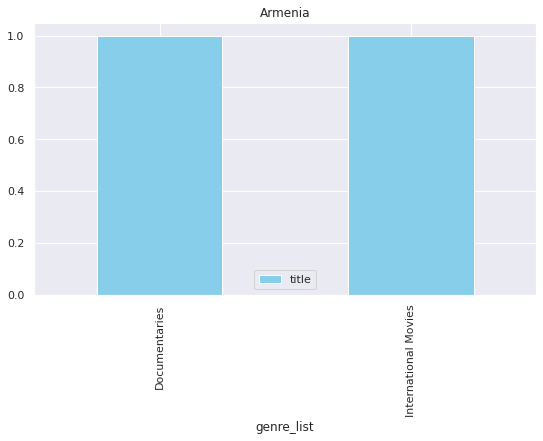

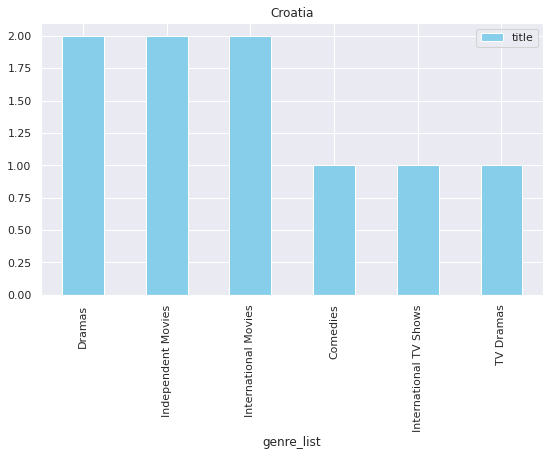

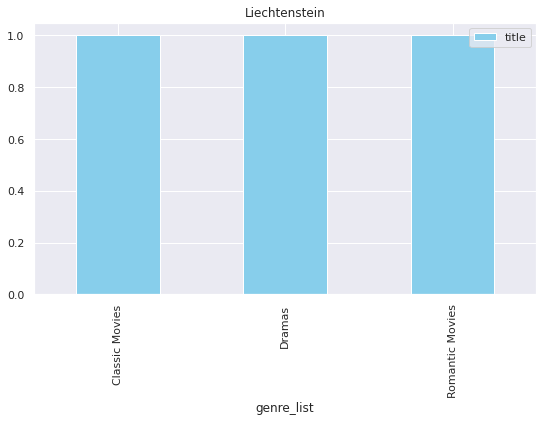

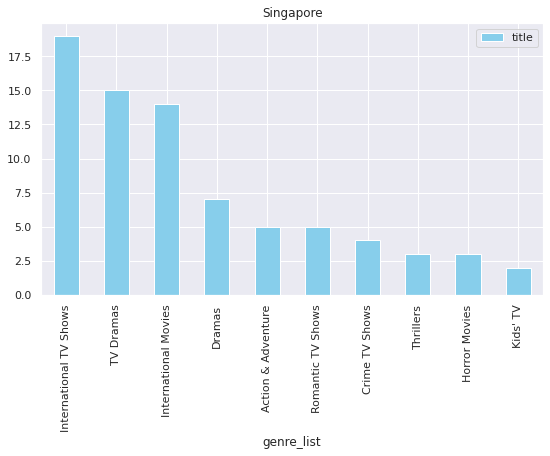

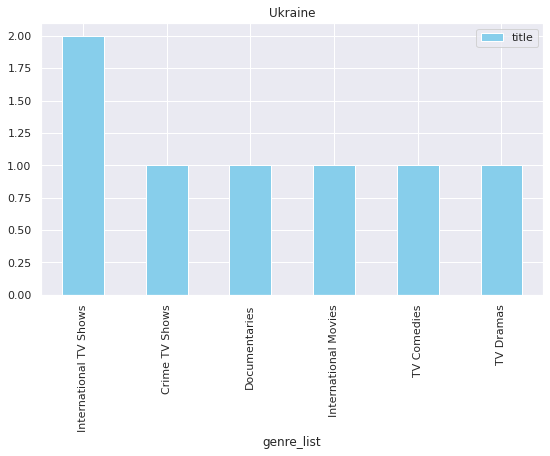

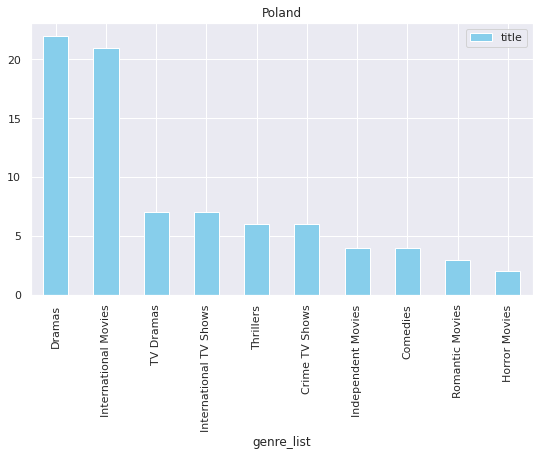

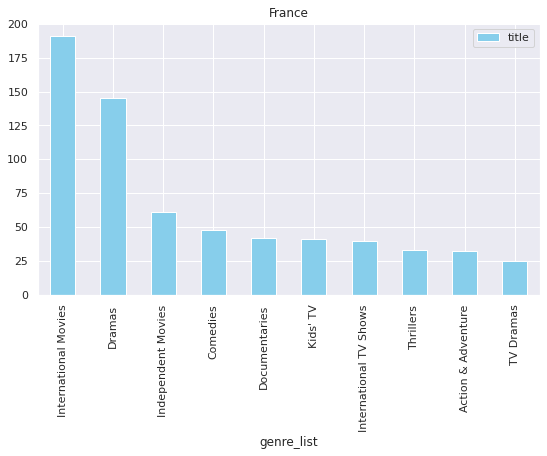

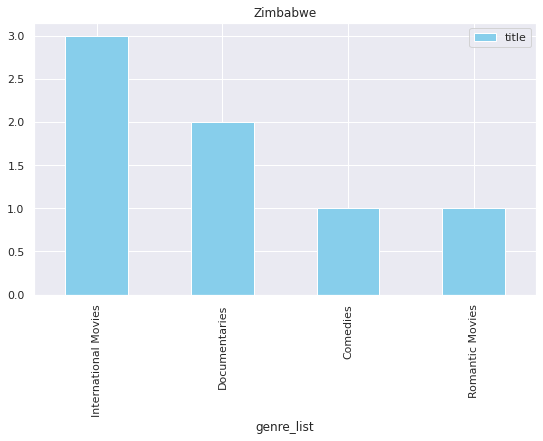

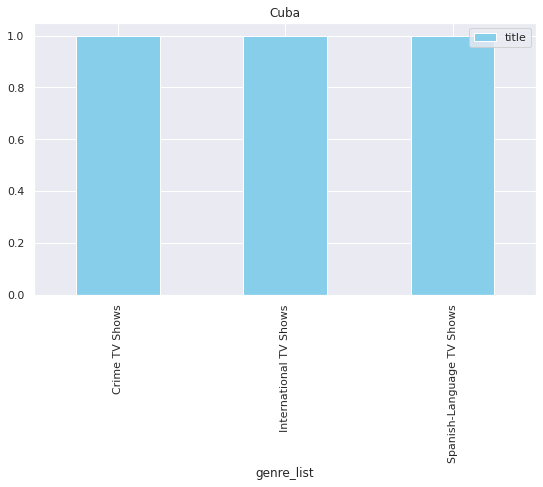

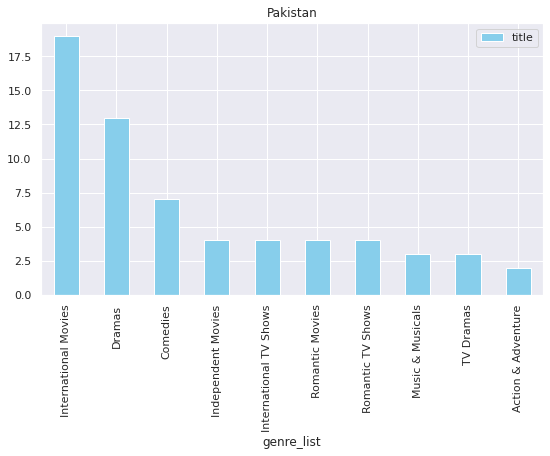

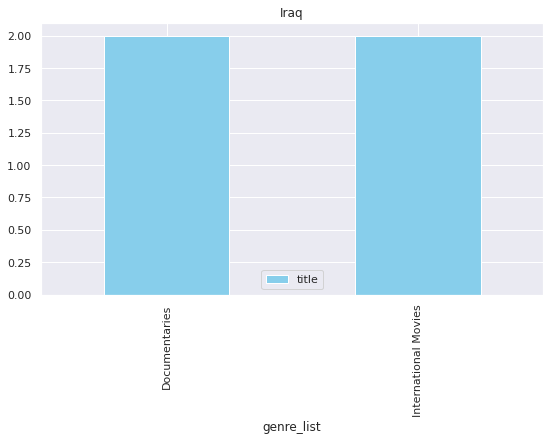

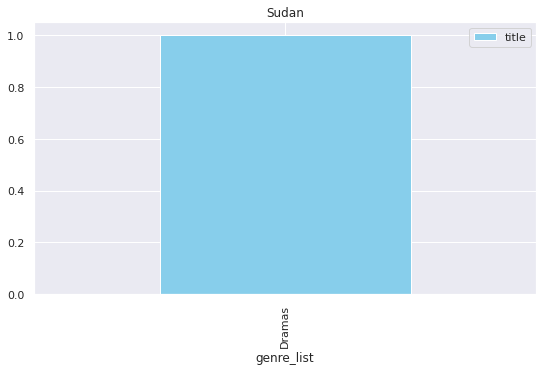

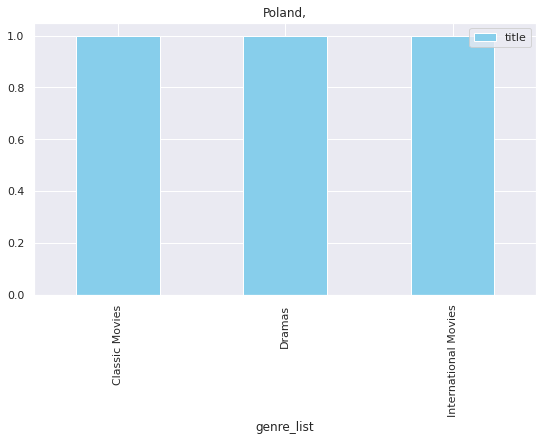

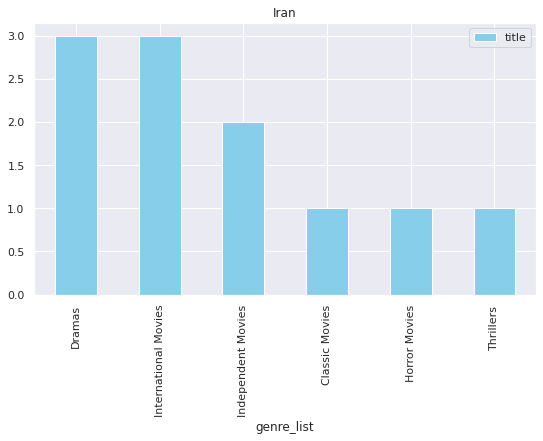

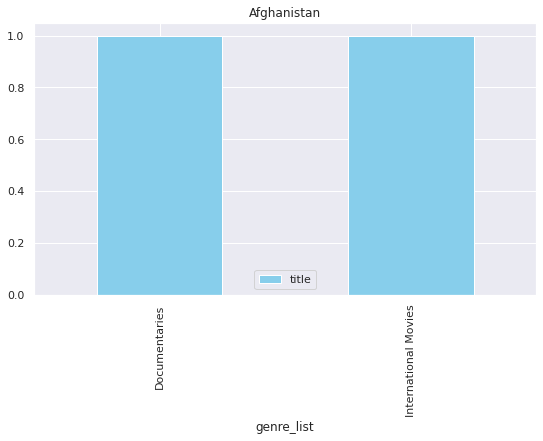

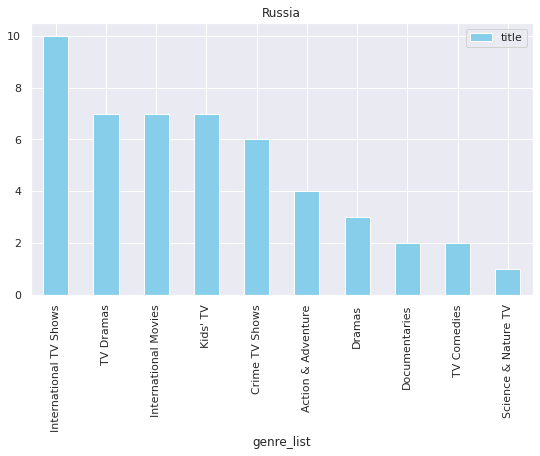

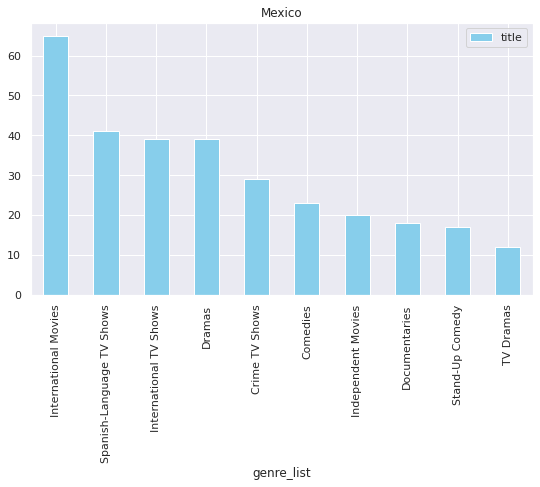

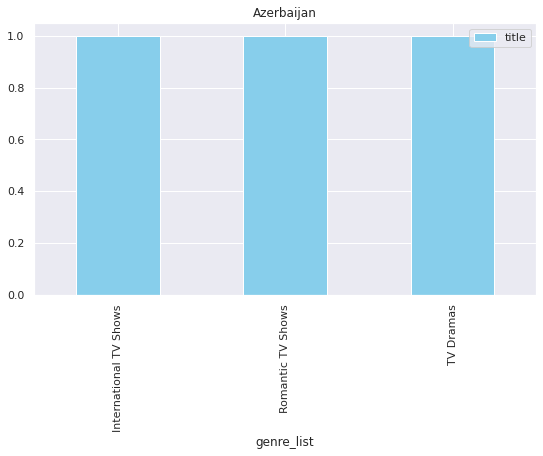

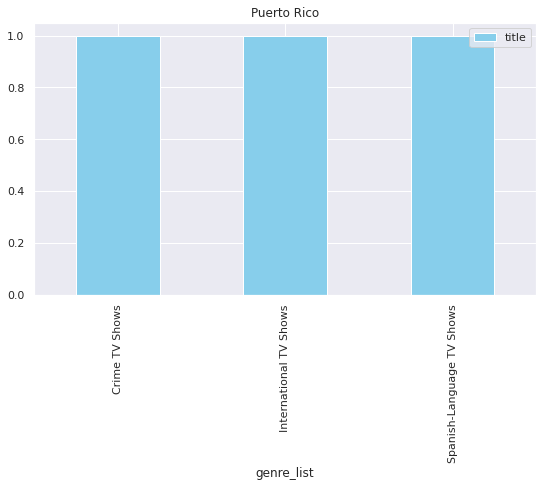

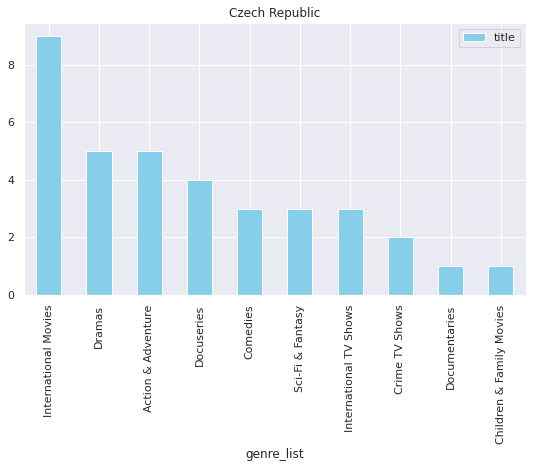

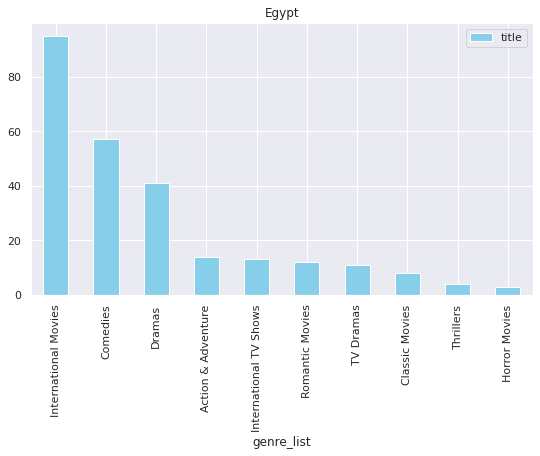

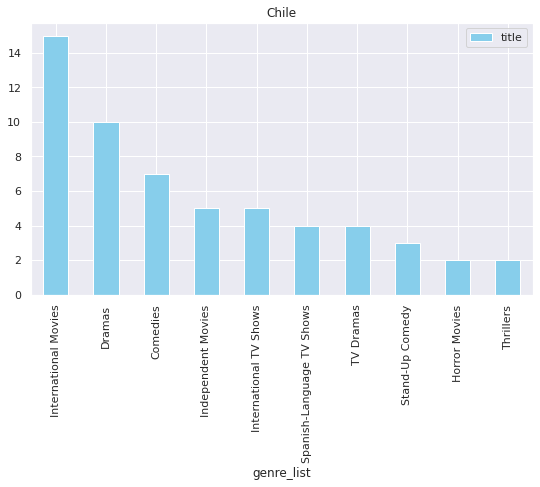

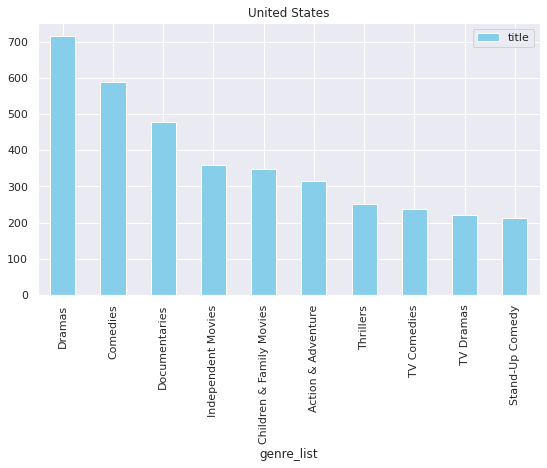

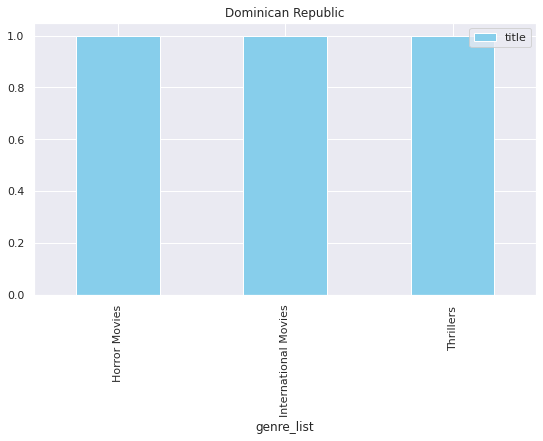

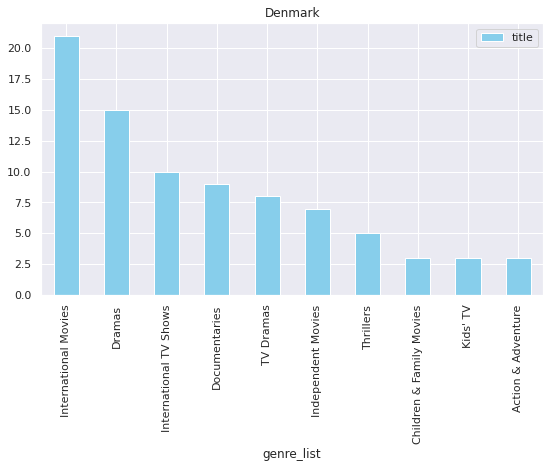

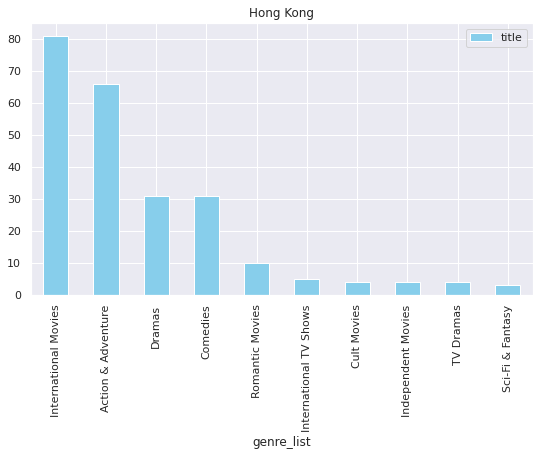

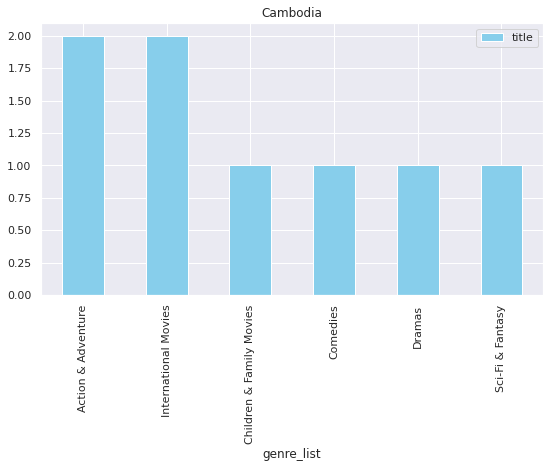

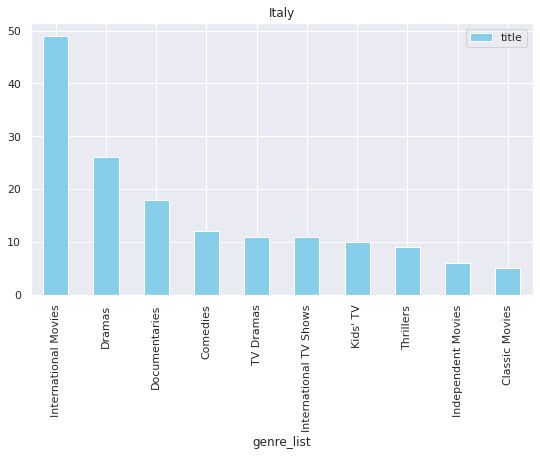

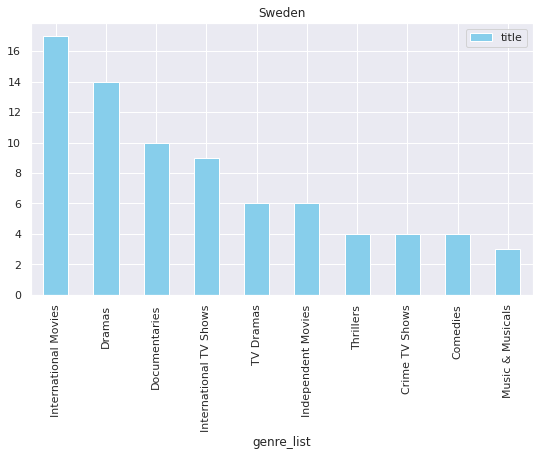

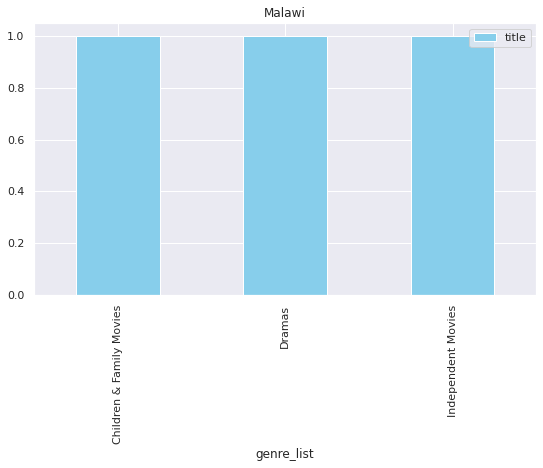

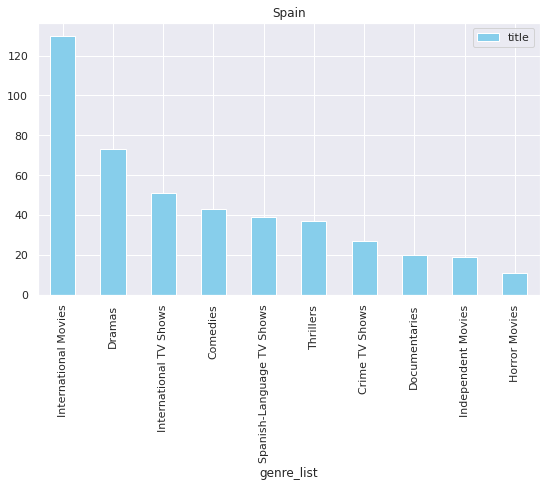

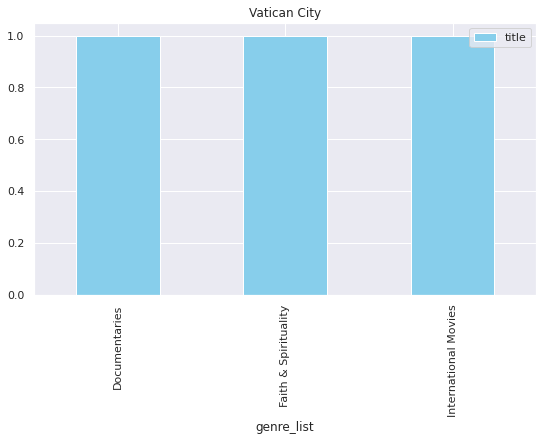

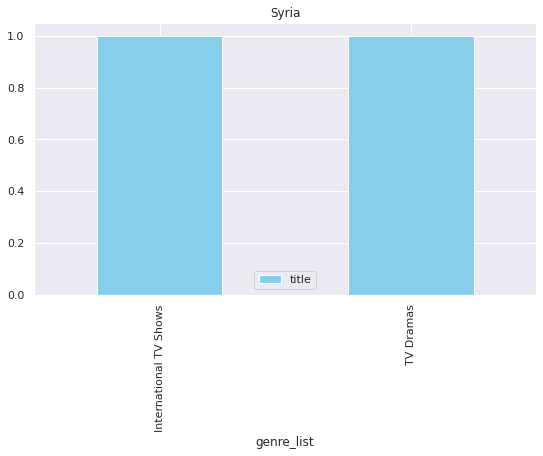

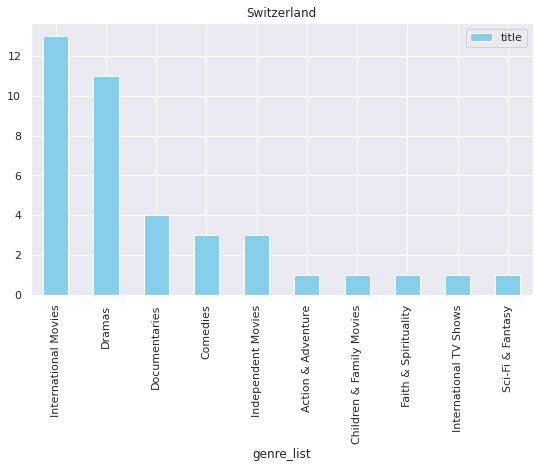

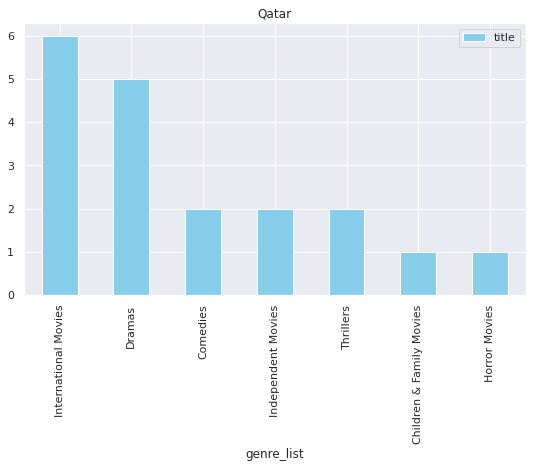

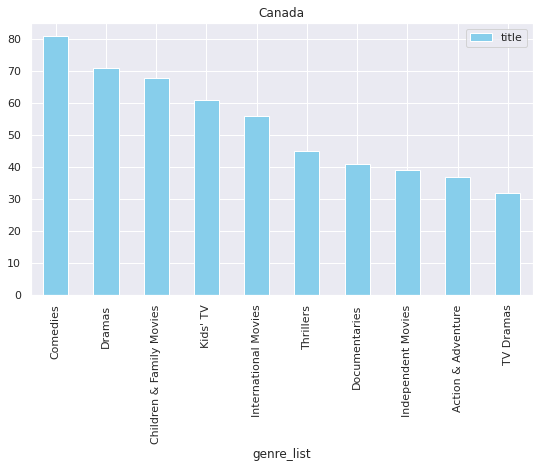

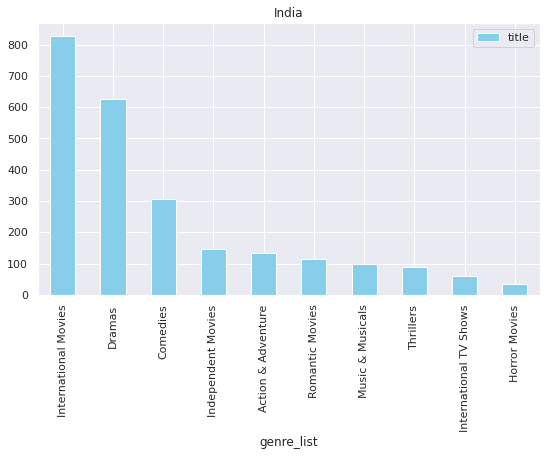

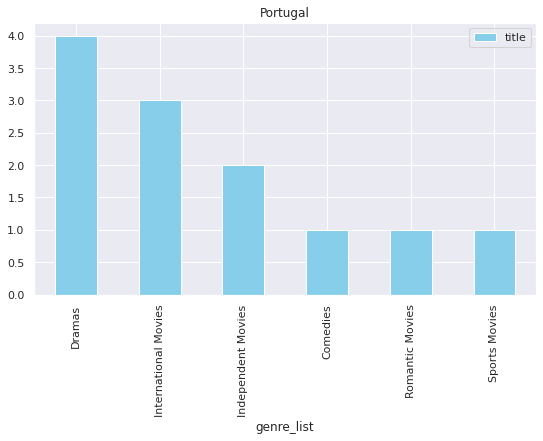

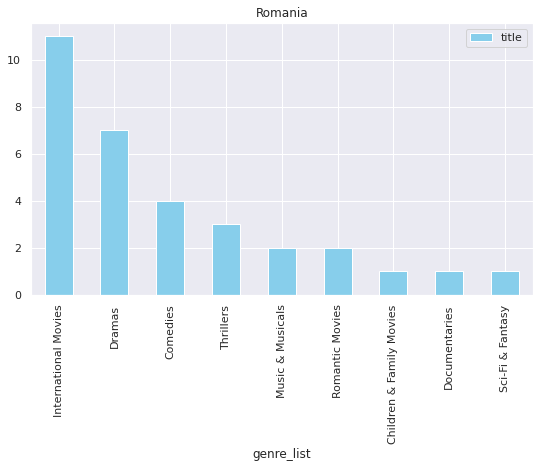

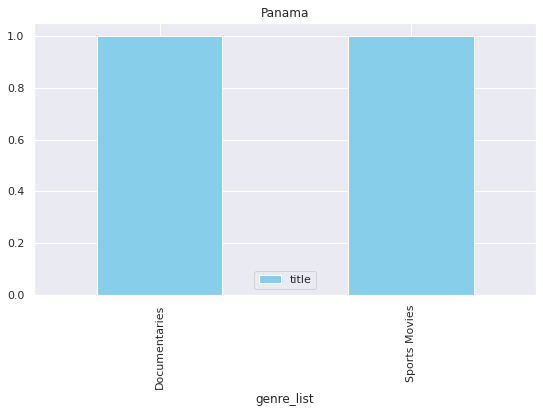

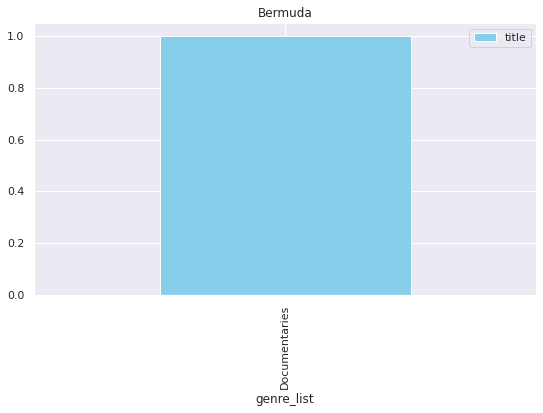

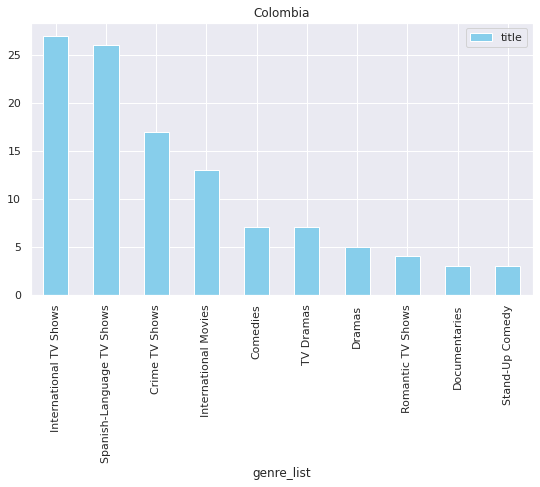

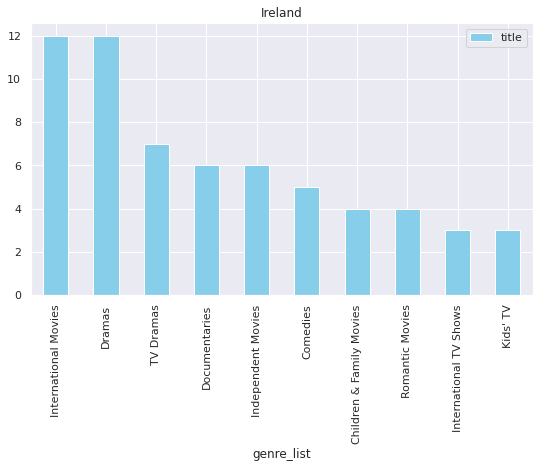

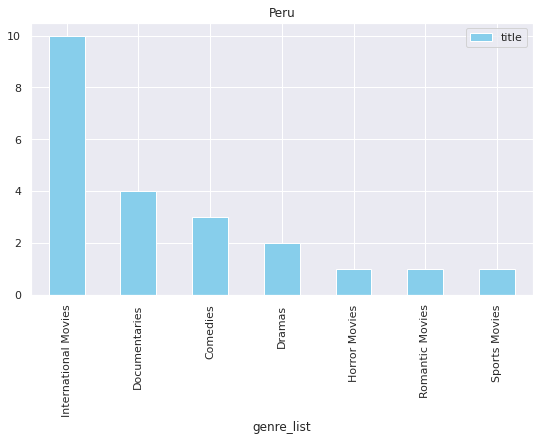

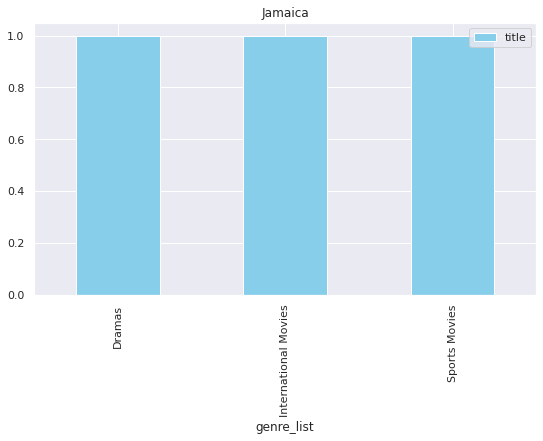

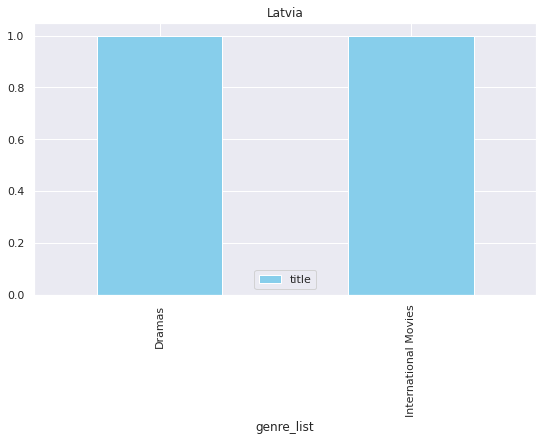

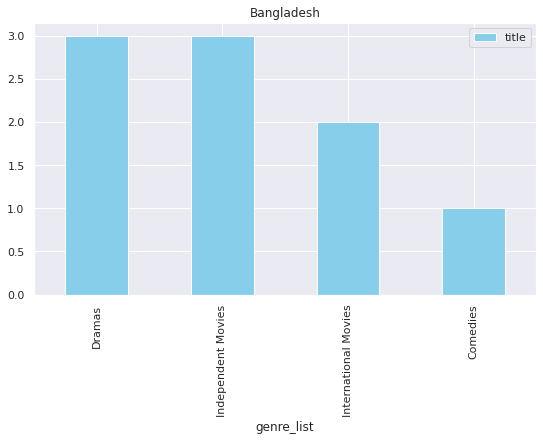

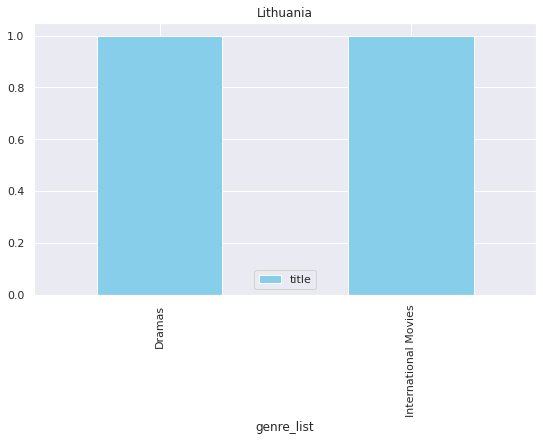

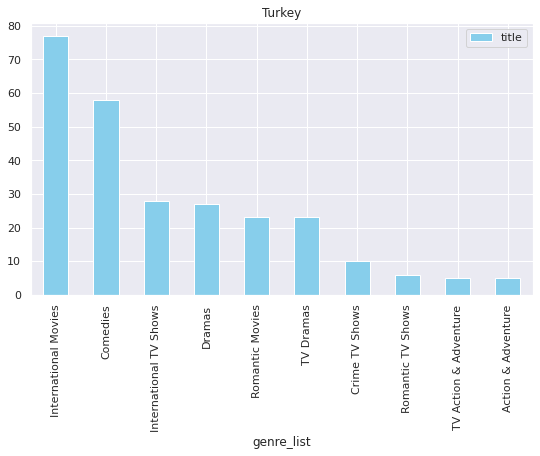

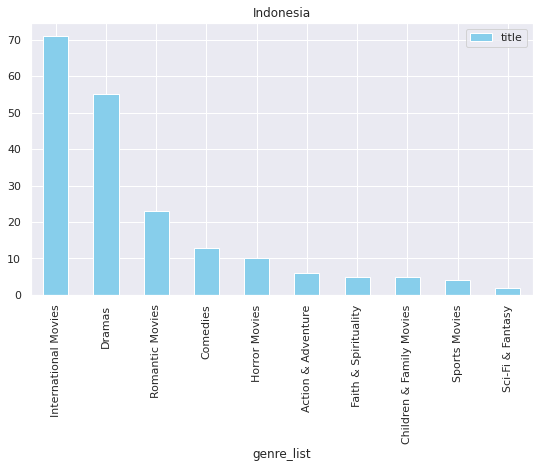

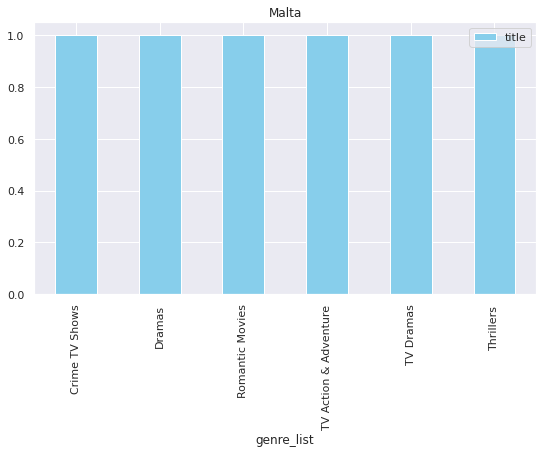

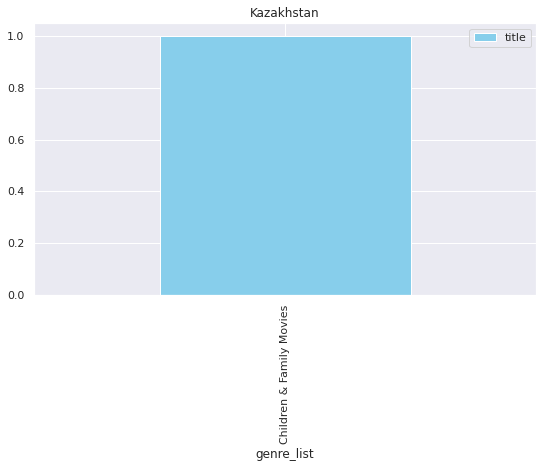

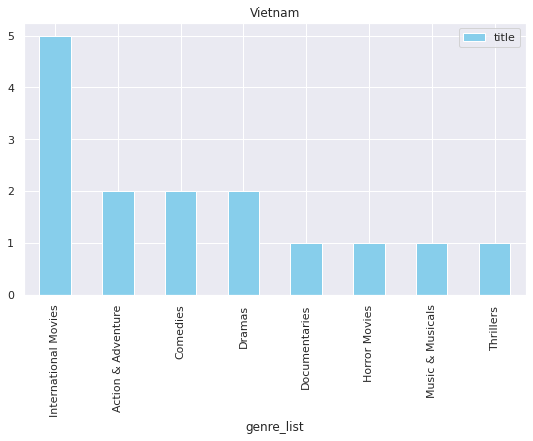

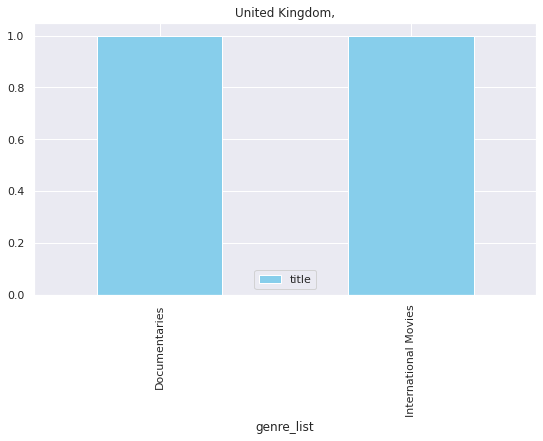

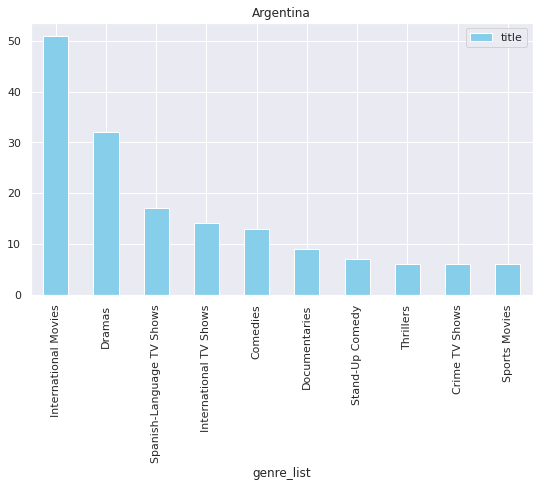

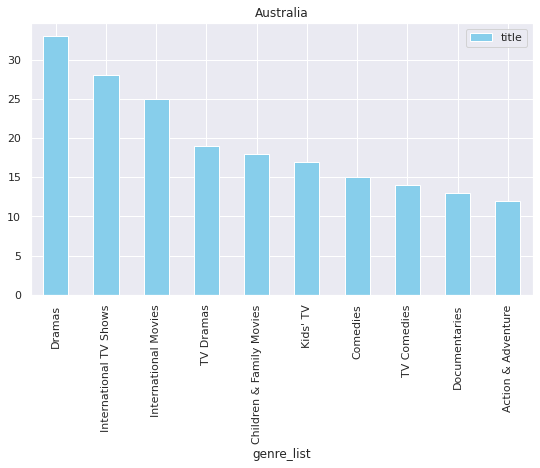

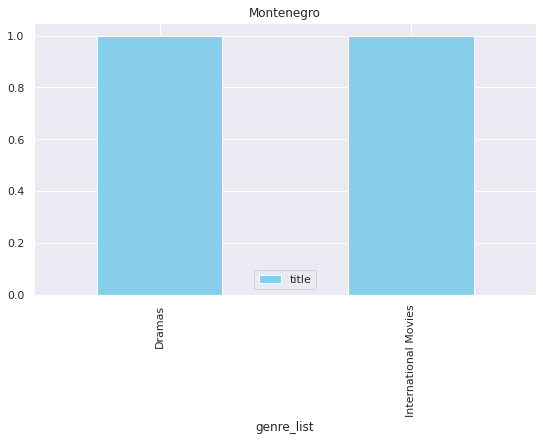

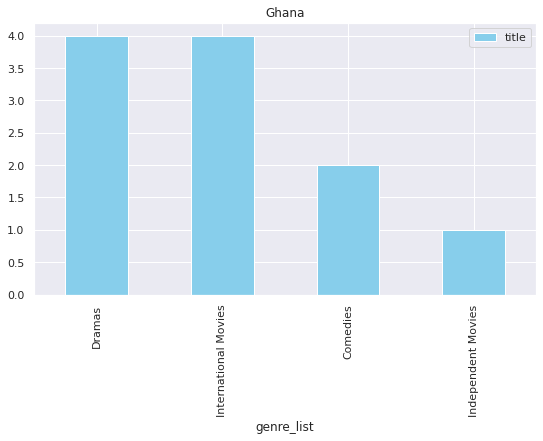

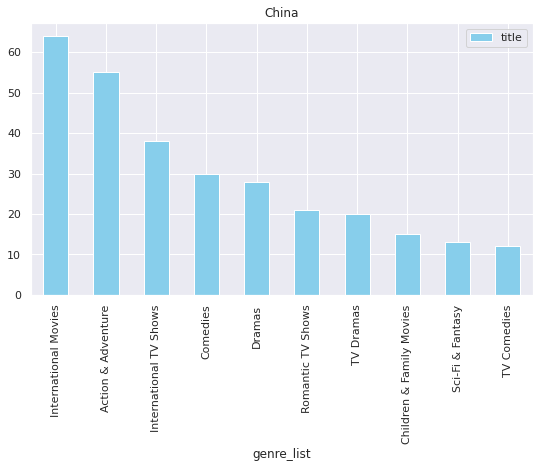

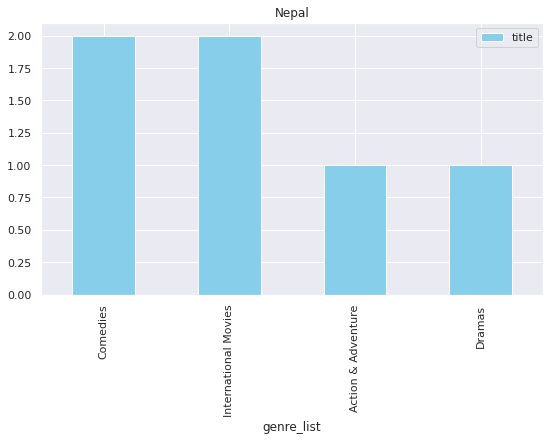

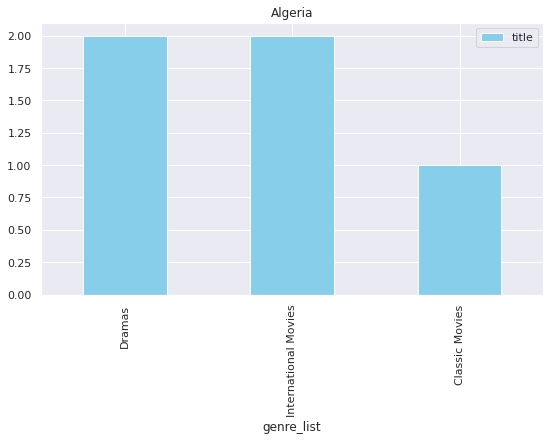

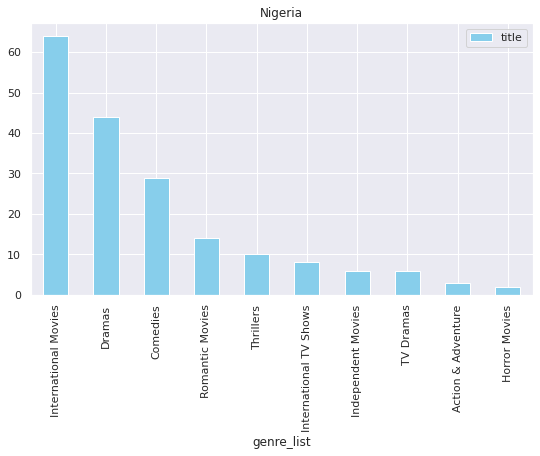

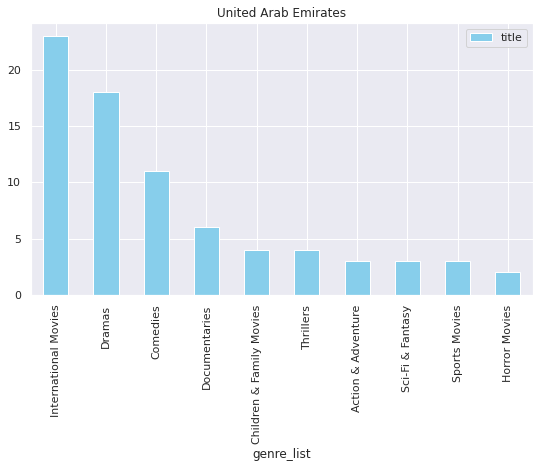

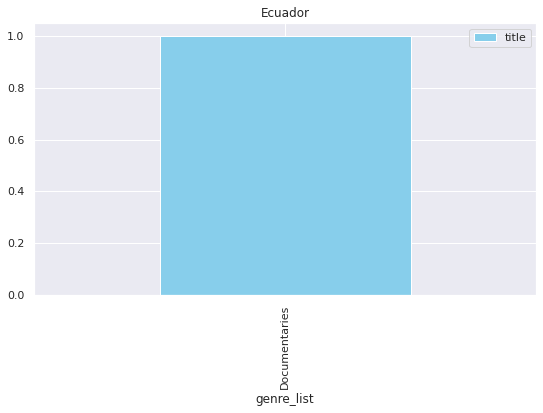

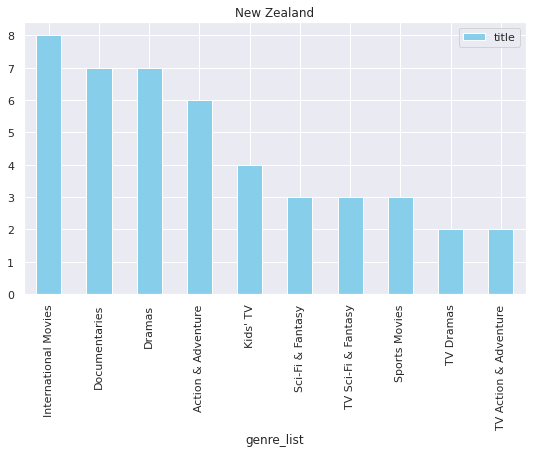

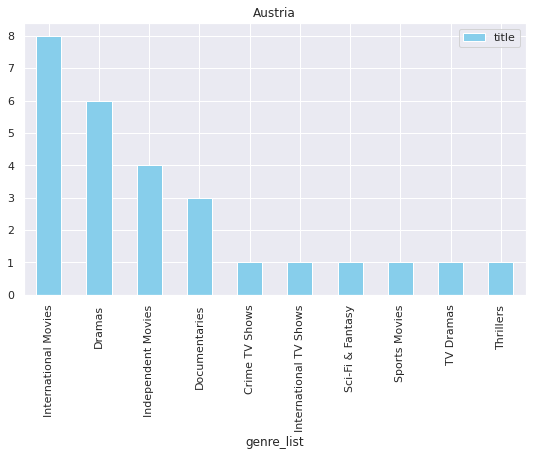

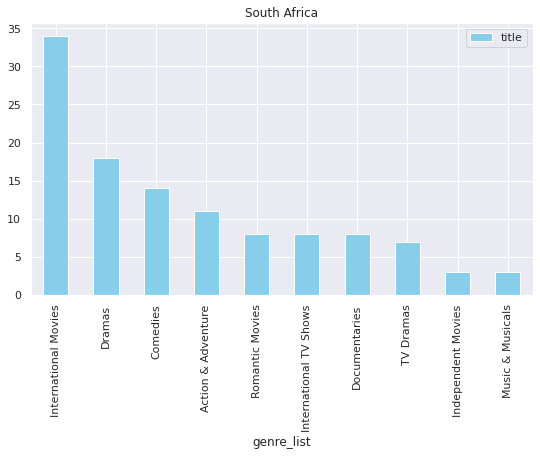

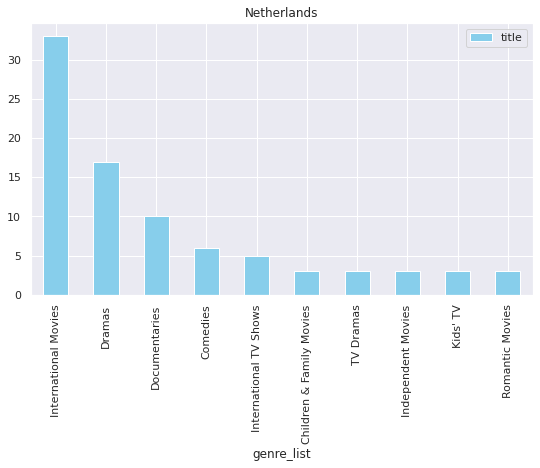

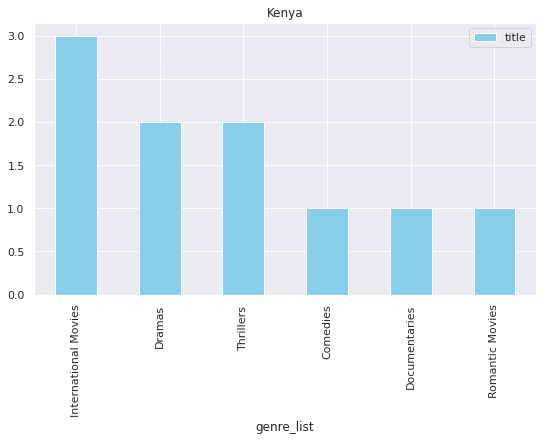

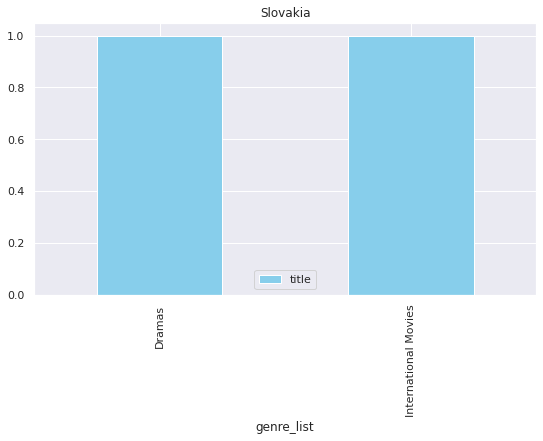

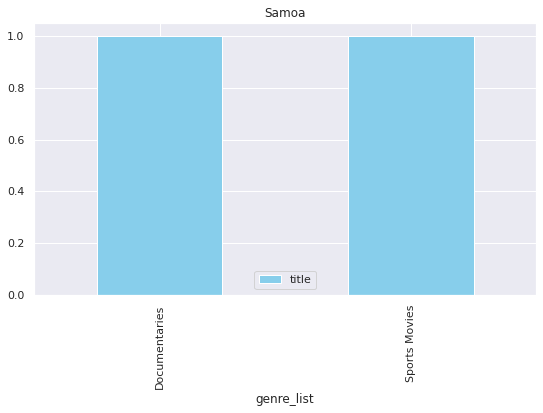

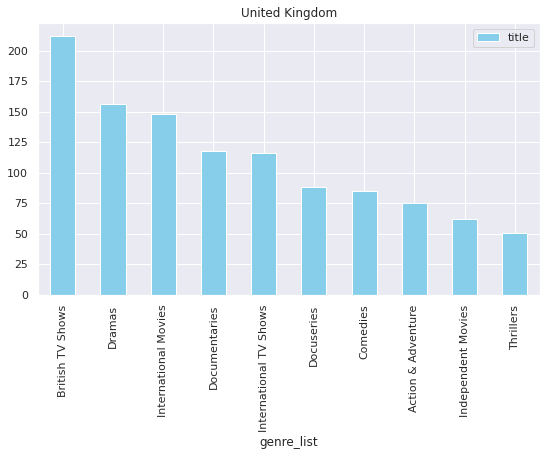

In [116]:
rating_country_df = get_genre_country_trends(data)

**Plotting country wise preferred rating for all countries (country vs rating)**

In [117]:
#getting country wise rating trend
def get_country_ratings_trends(data):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  data['country_list'] = data.apply(lambda x: explode_country(x['country']),axis=1)
  data= data.explode('country_list')
  grouped_df_ = data.groupby(['country_list','rating']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "rating", y="title", color="khaki", rot=45, figsize=(5,5))
    plt.title(f"{each}")

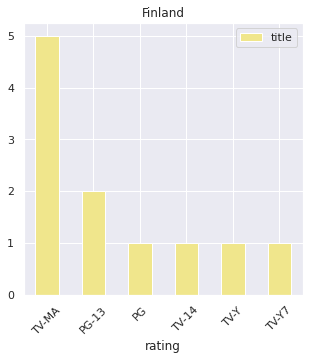

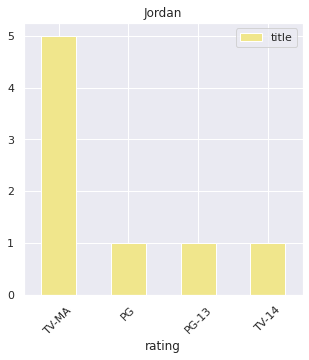

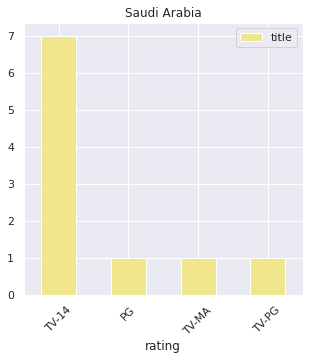

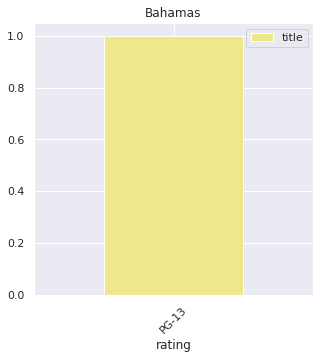

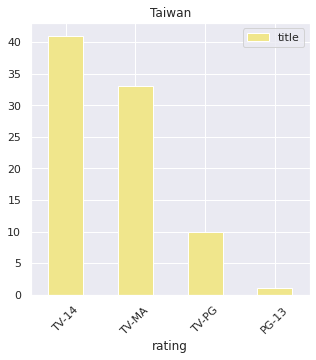

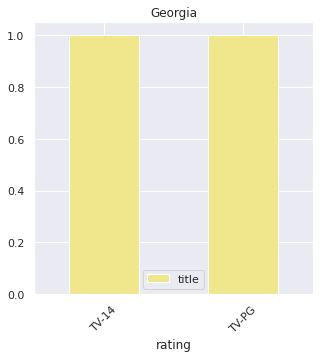

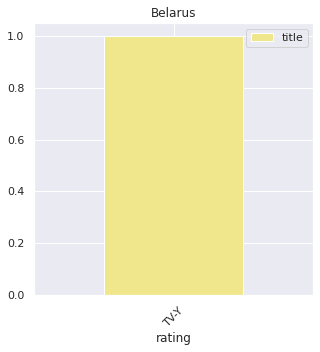

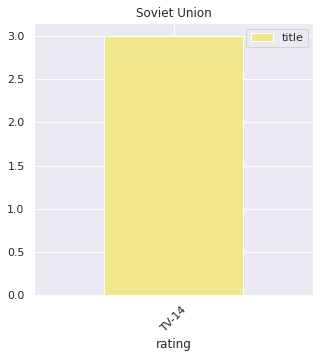

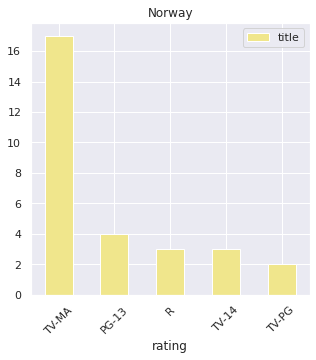

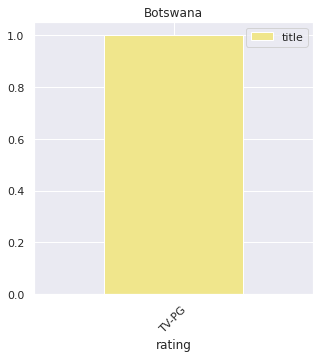

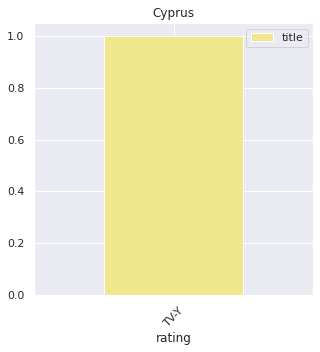

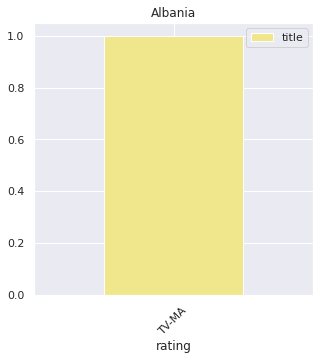

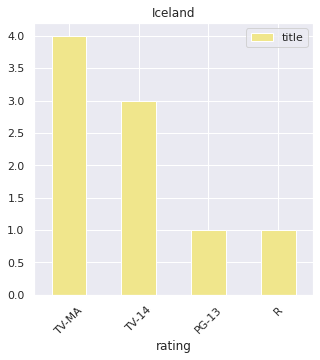

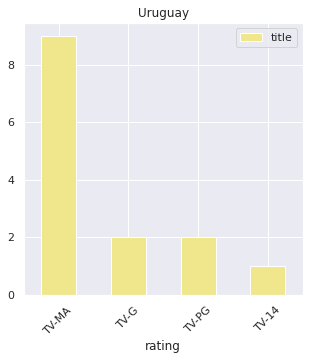

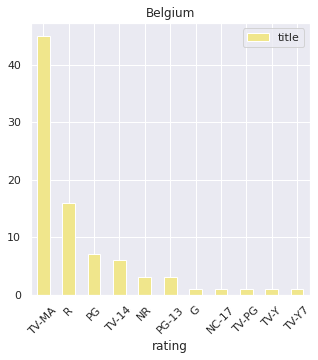

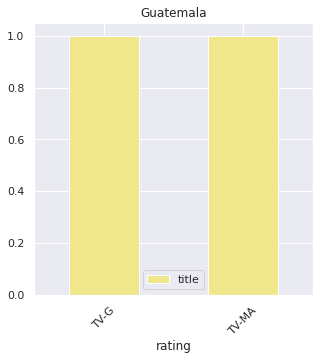

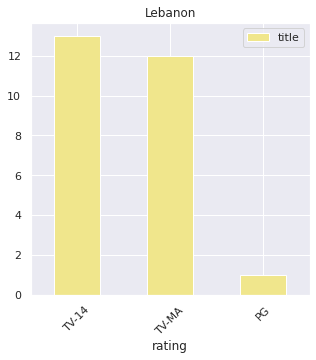

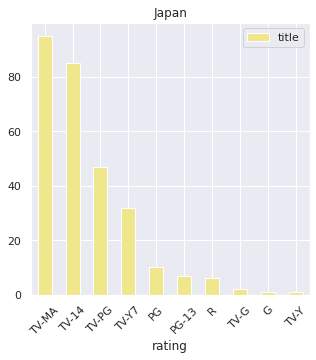

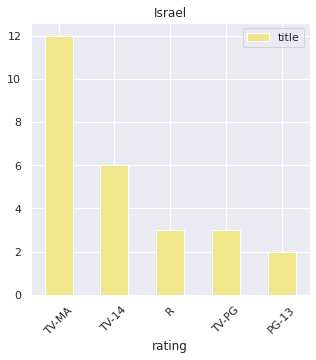

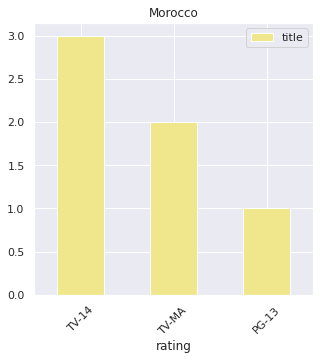

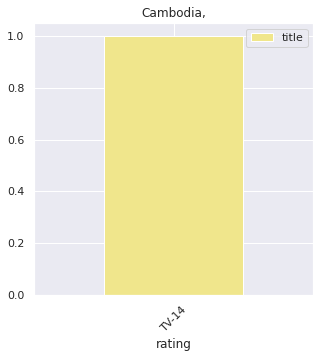

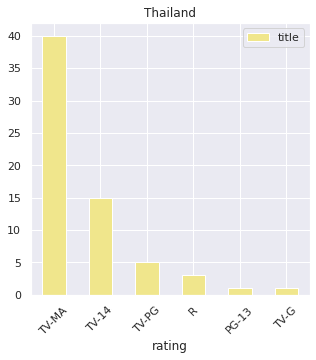

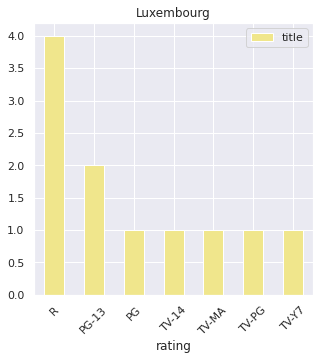

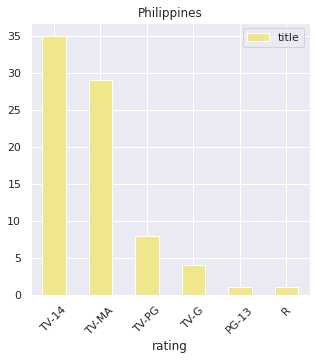

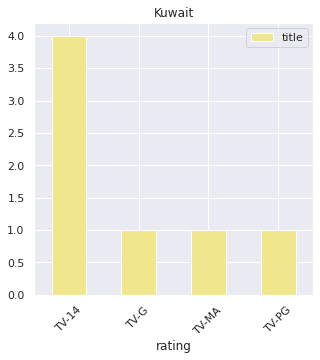

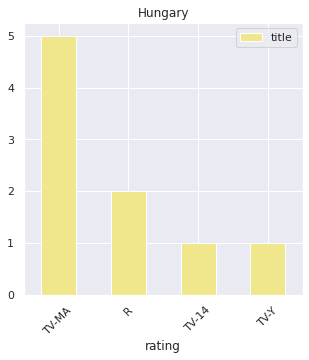

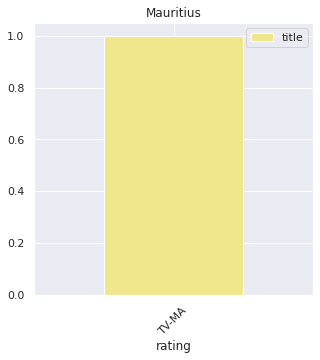

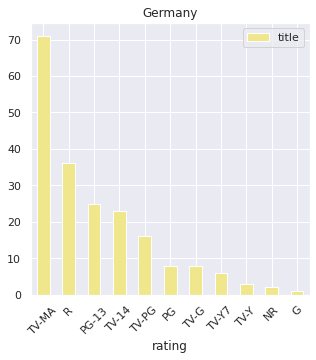

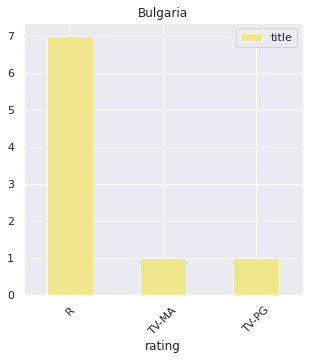

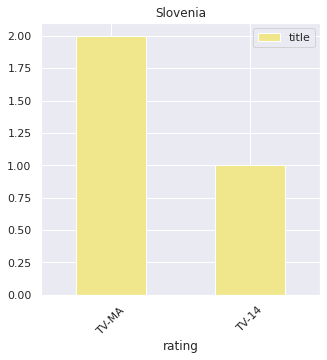

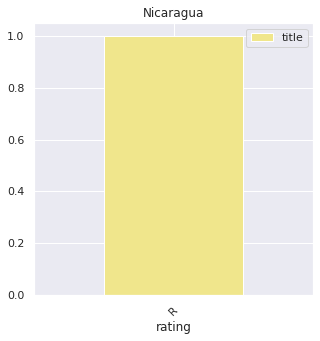

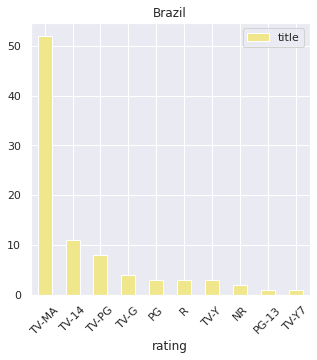

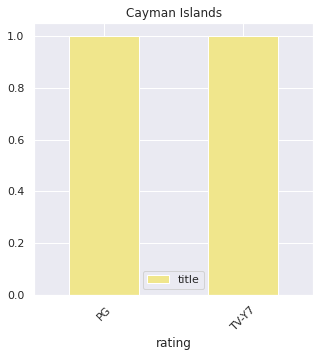

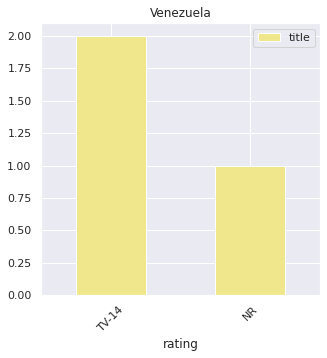

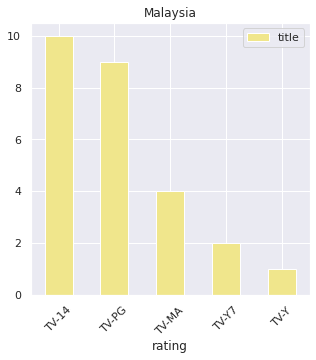

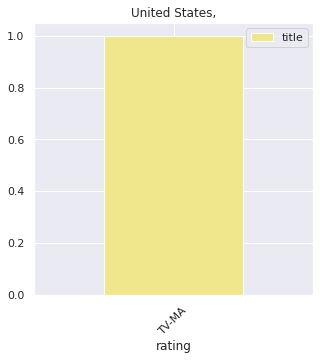

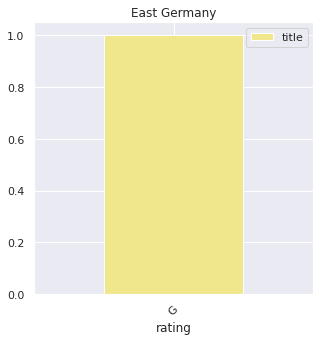

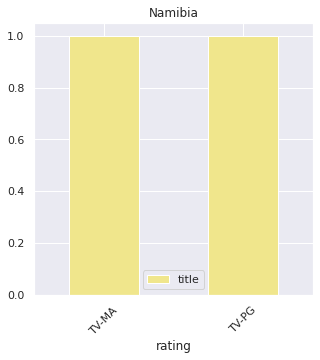

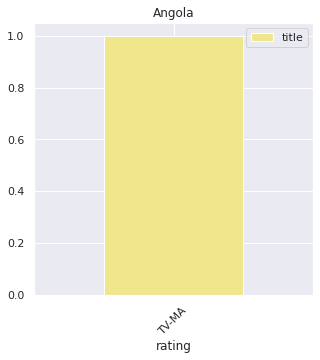

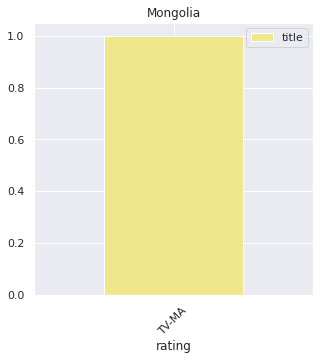

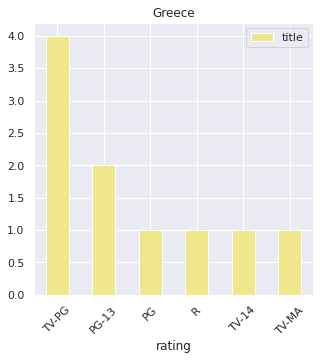

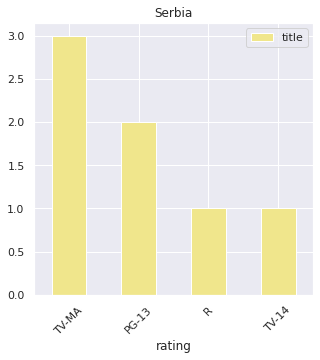

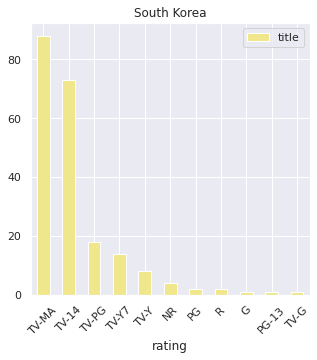

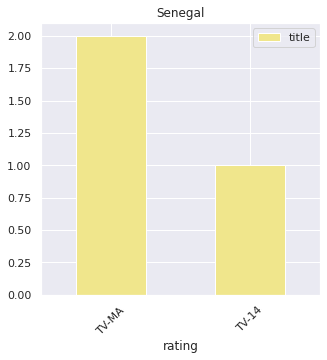

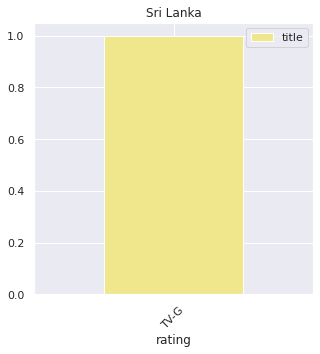

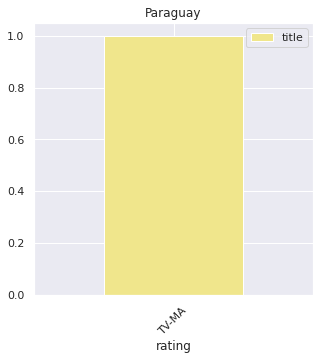

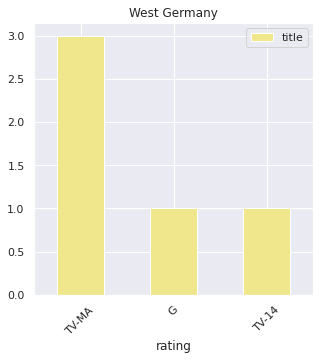

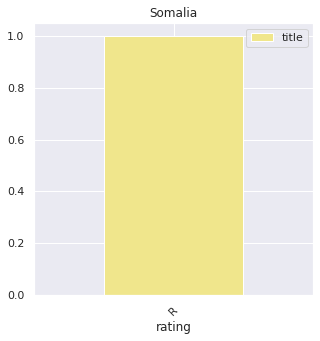

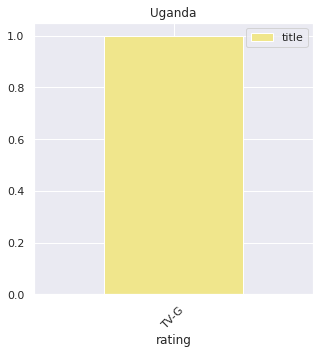

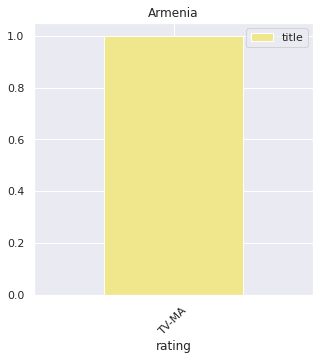

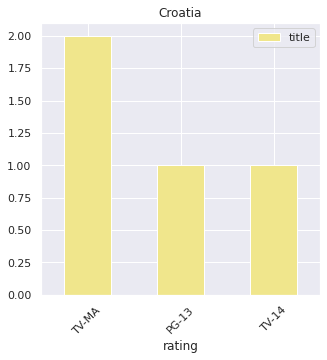

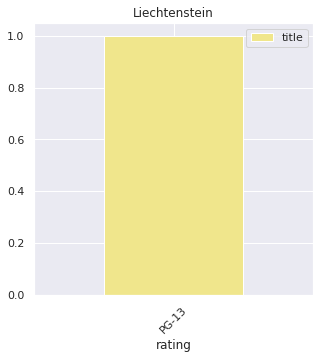

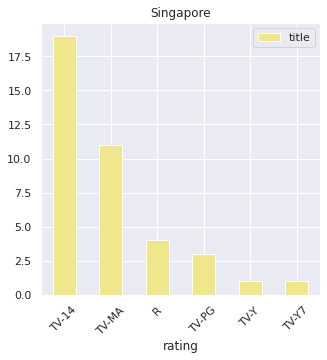

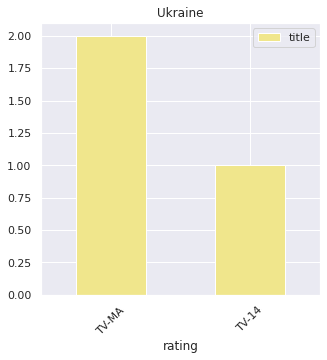

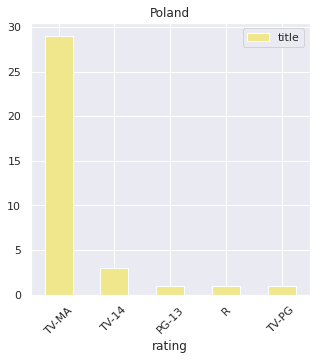

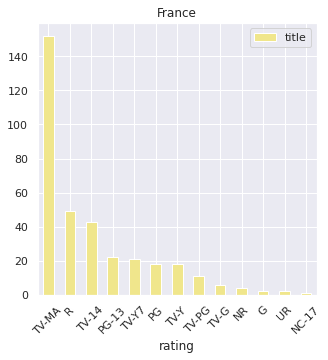

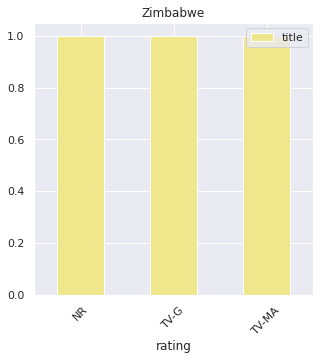

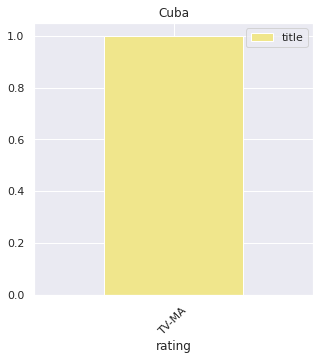

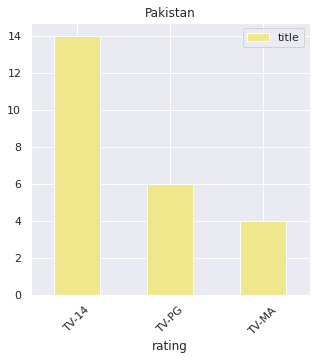

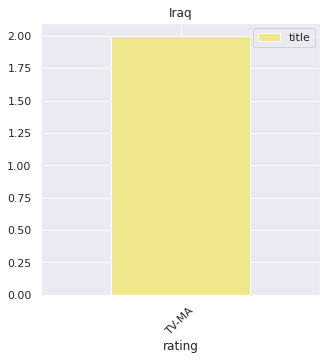

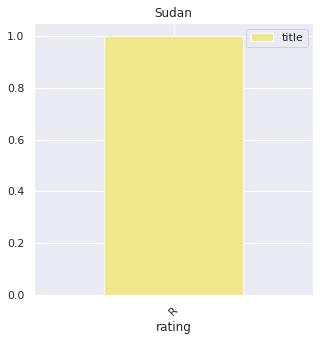

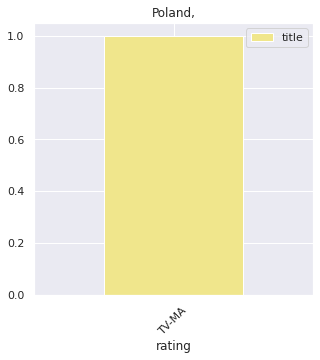

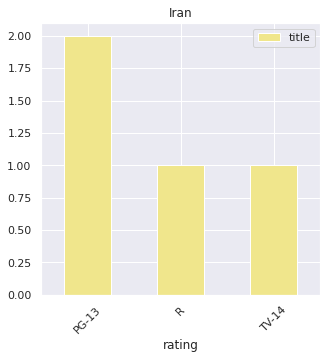

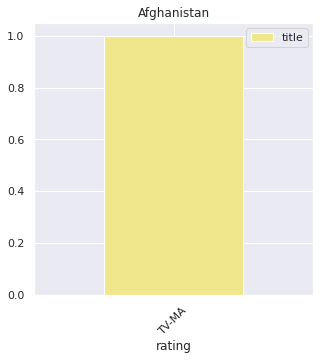

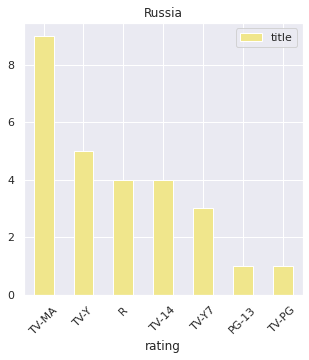

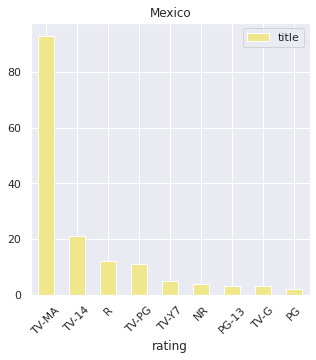

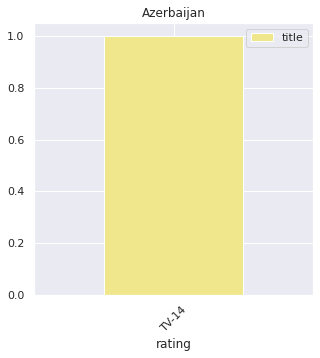

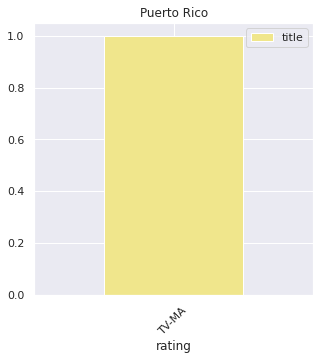

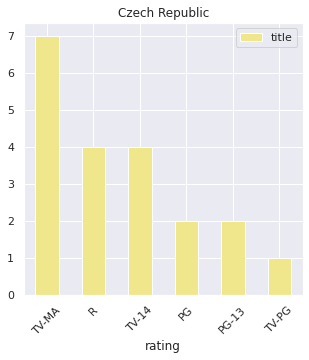

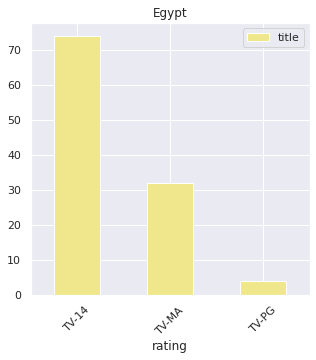

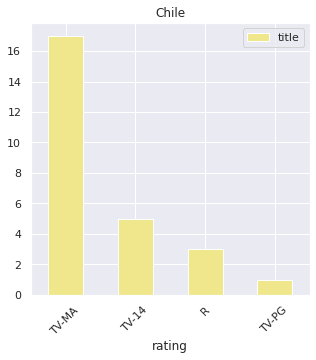

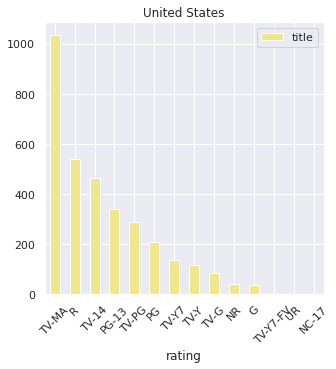

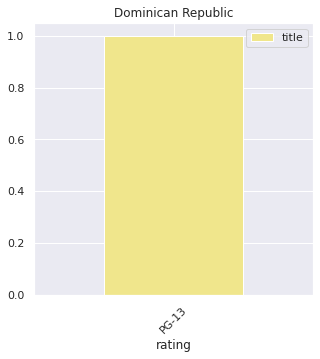

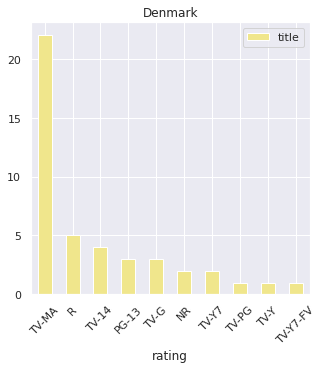

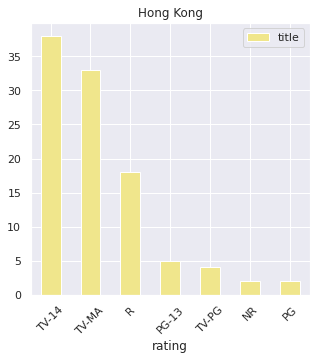

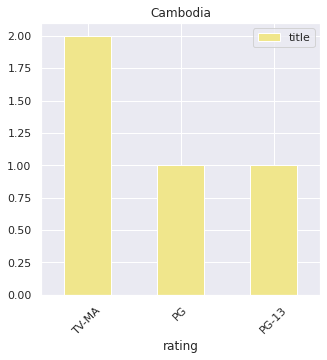

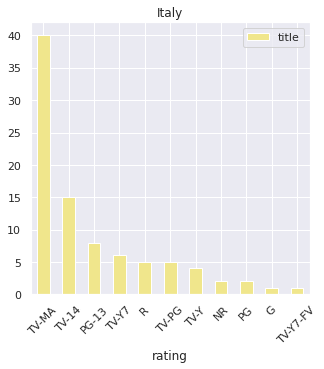

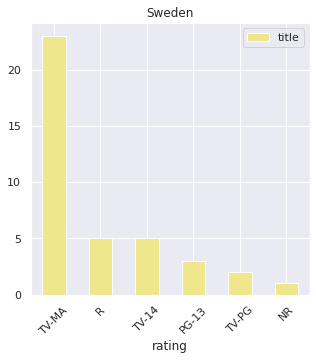

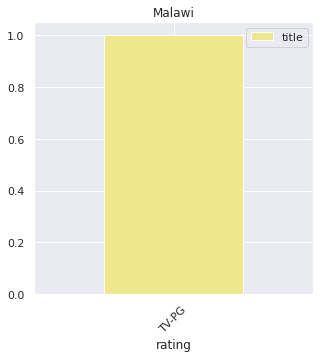

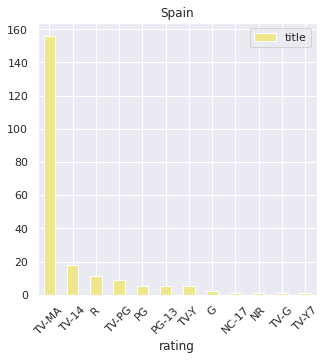

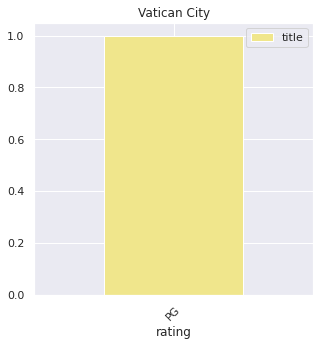

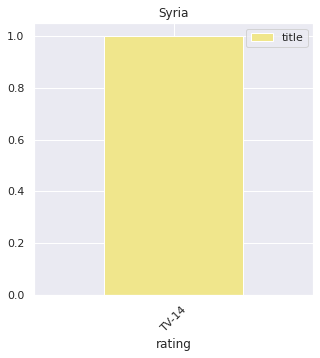

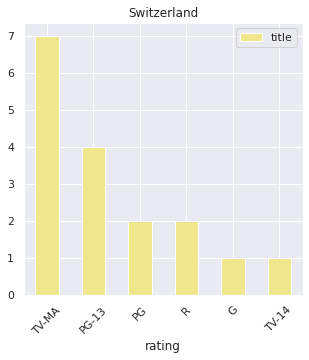

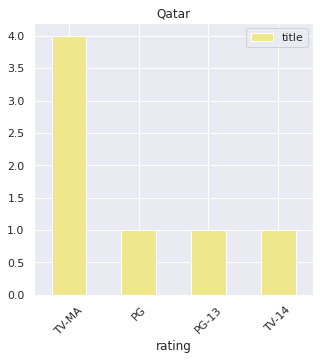

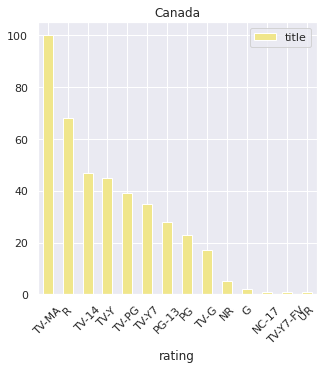

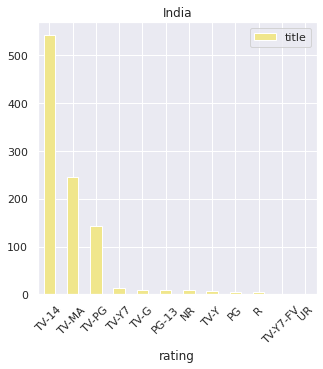

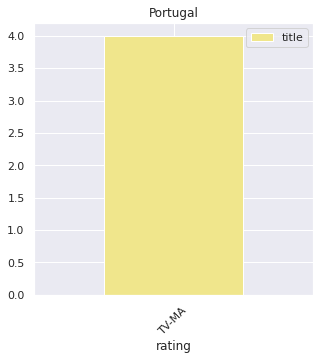

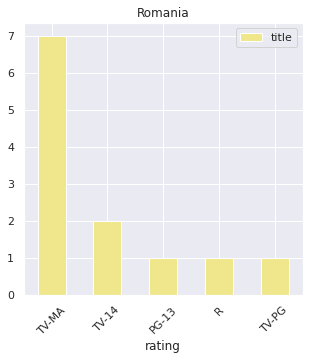

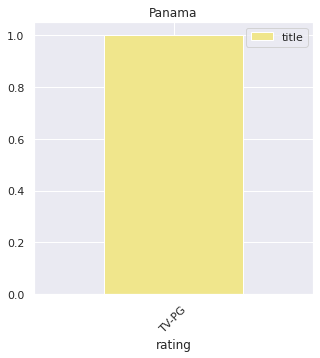

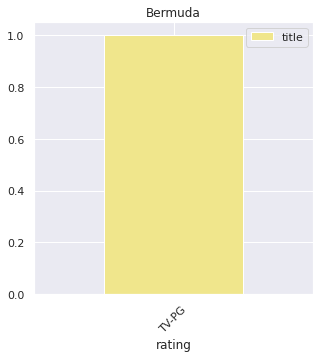

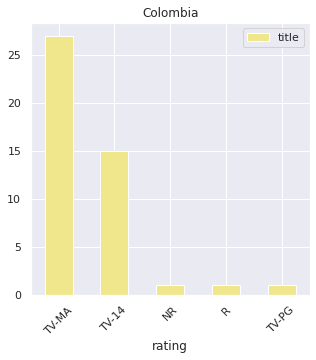

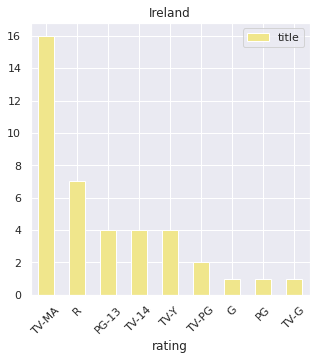

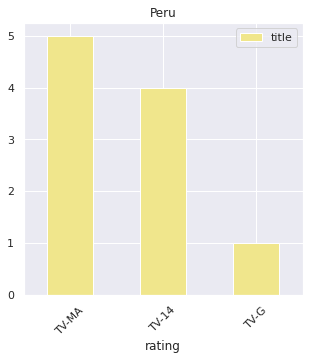

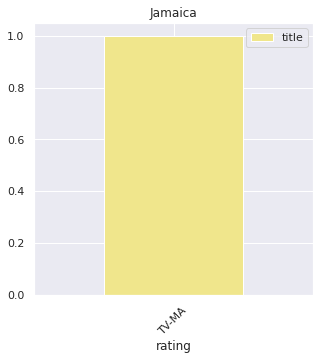

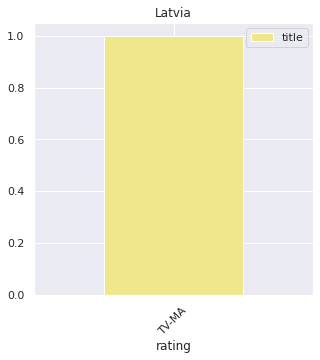

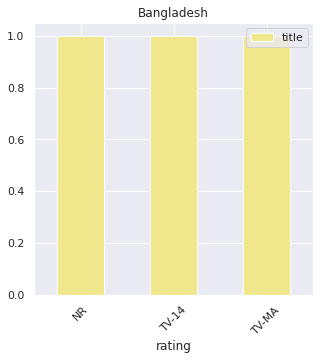

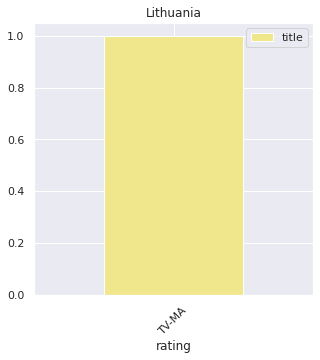

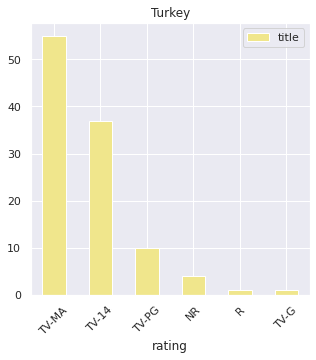

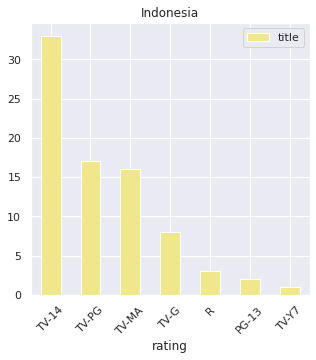

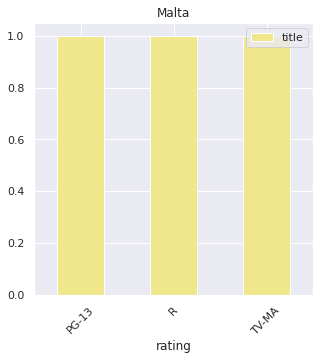

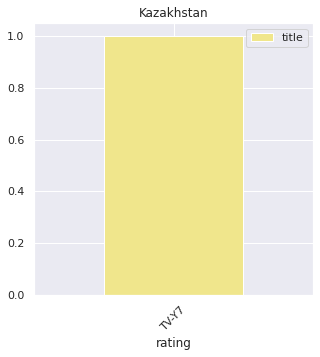

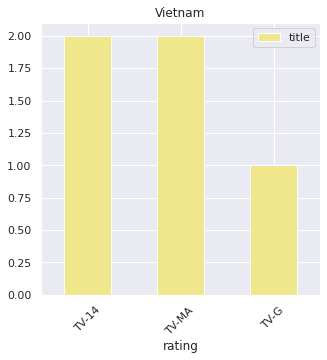

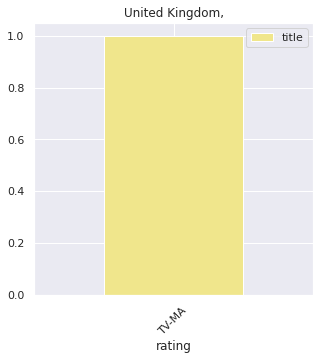

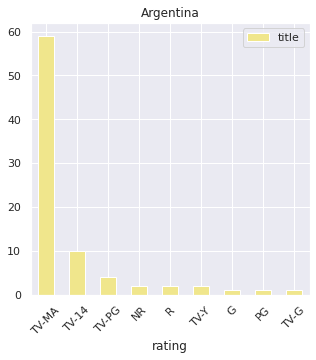

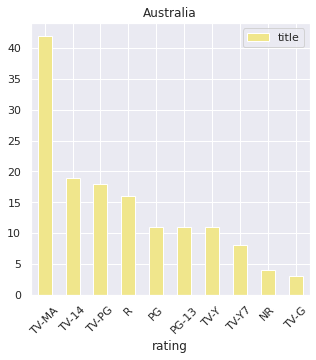

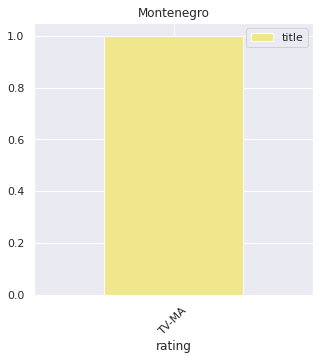

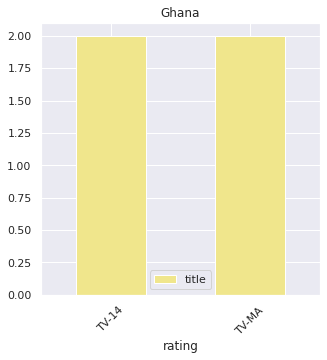

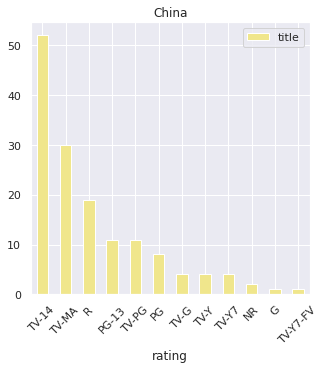

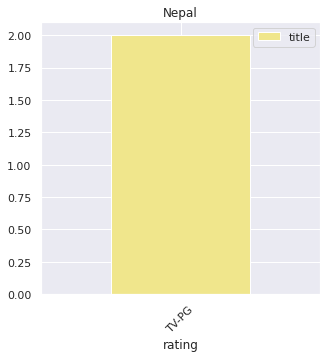

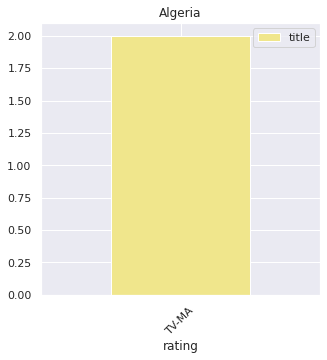

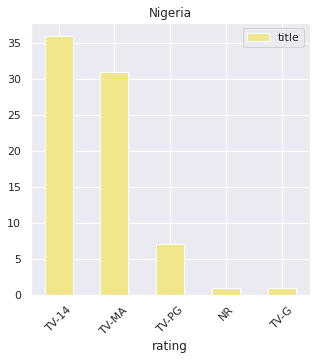

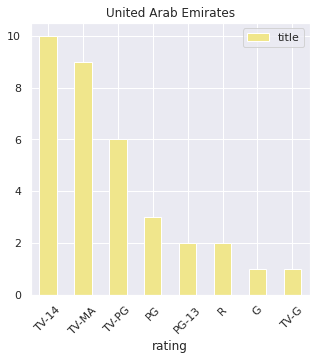

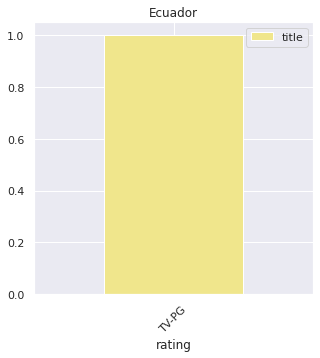

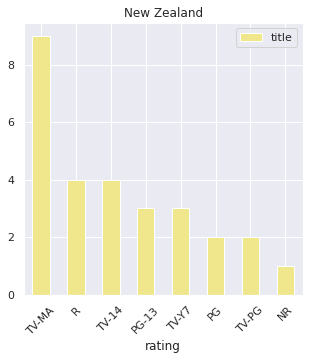

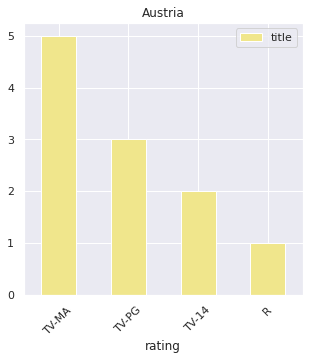

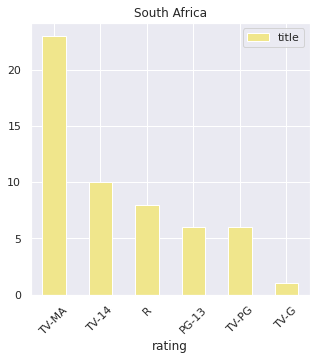

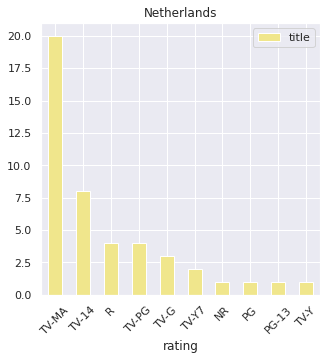

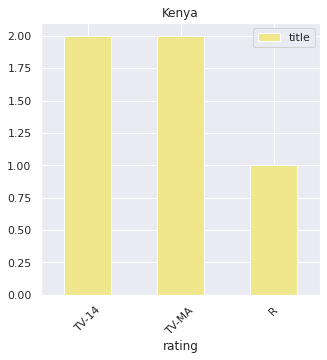

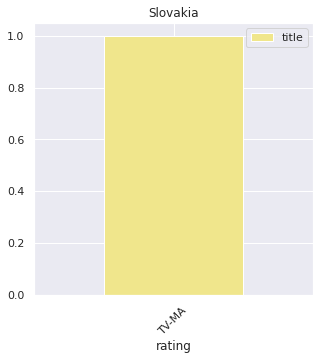

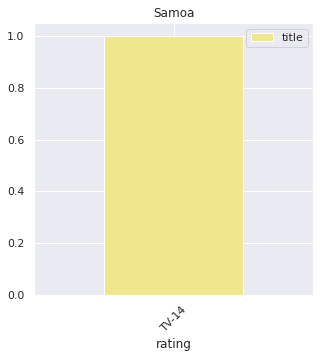

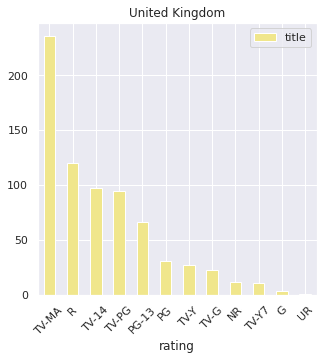

In [126]:
get_country_ratings_trends(data)

**Plotting country wise preferred 'type' for all countries  (country vs type)**

In [119]:
#get all country type preference
def get_country_type_trends(data):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  data['country_list'] = data.apply(lambda x: explode_country(x['country']),axis=1)
  data = data.explode('country_list')
  grouped_df_ = data.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="salmon", rot=45, figsize=(5,5))
    plt.title(f"{each}")

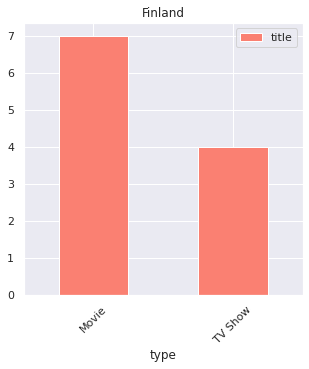

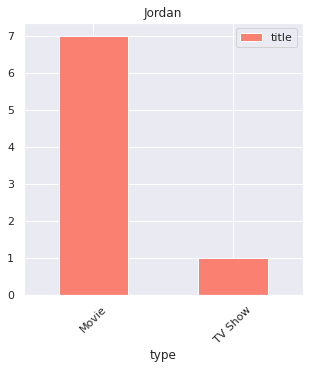

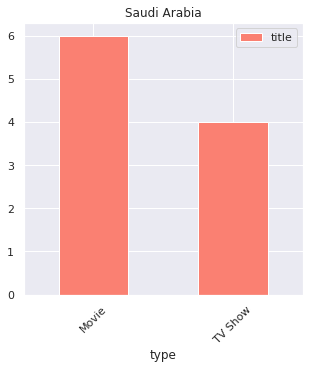

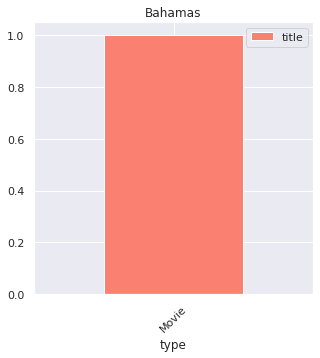

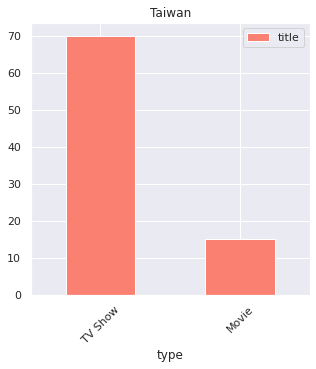

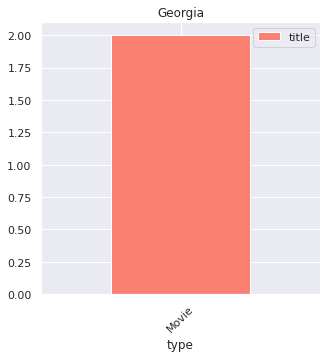

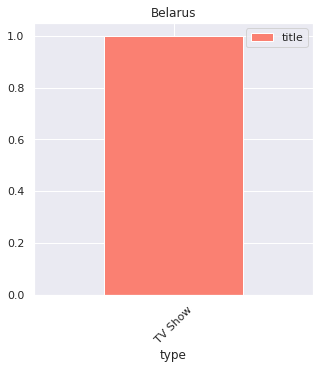

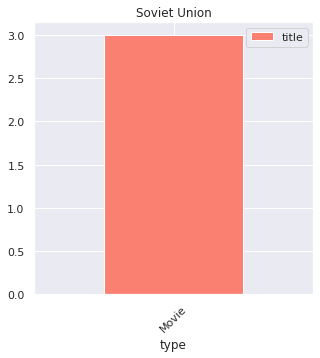

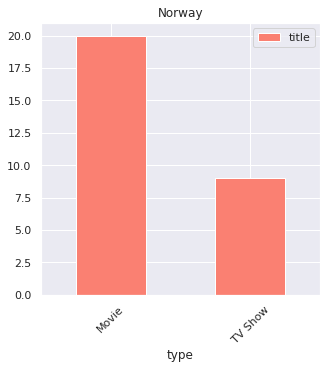

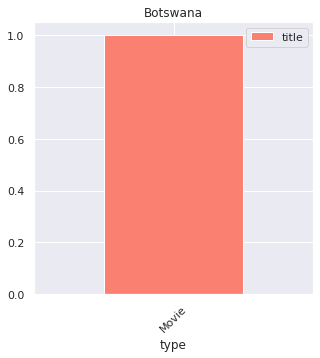

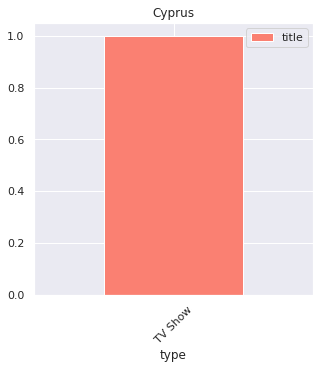

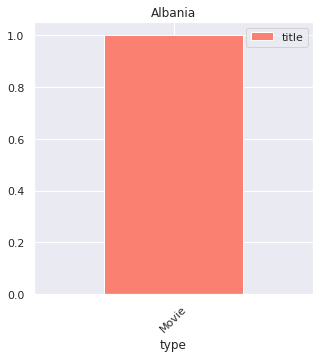

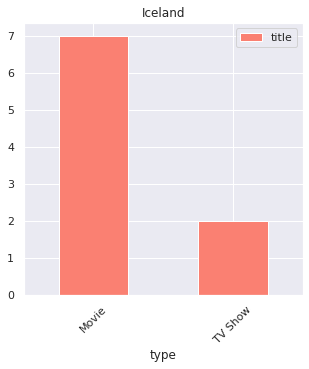

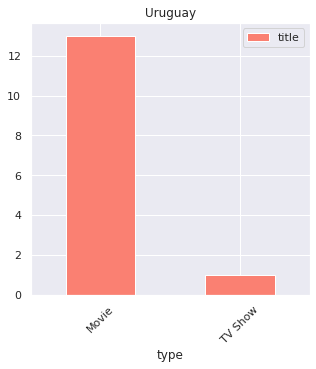

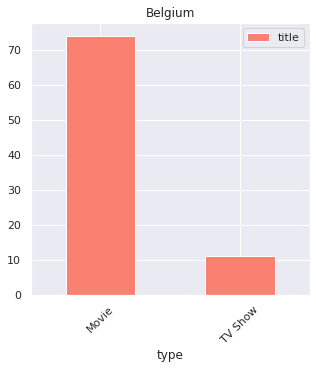

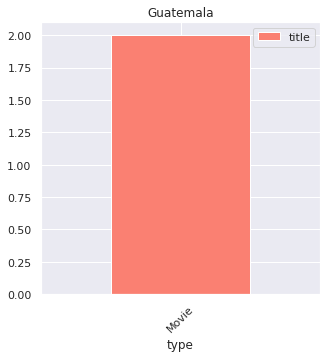

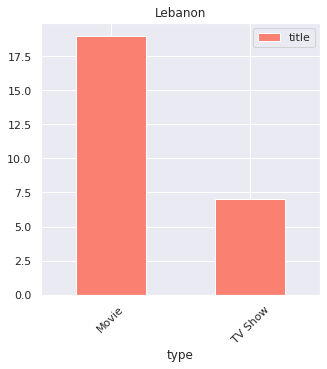

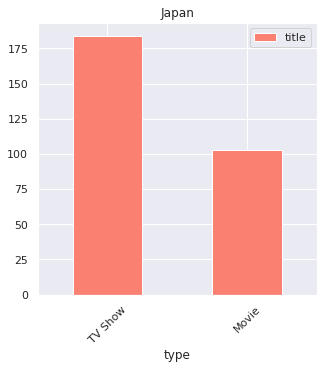

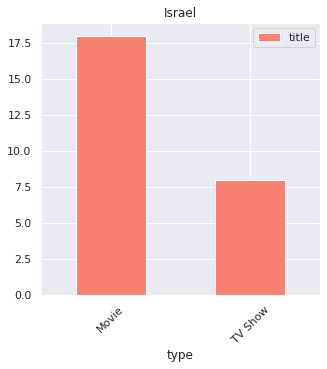

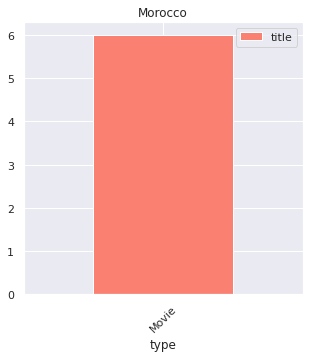

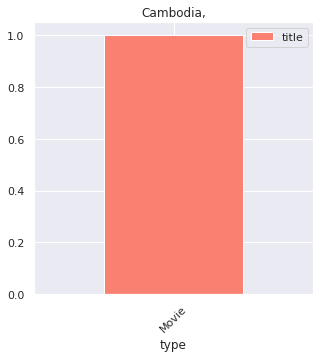

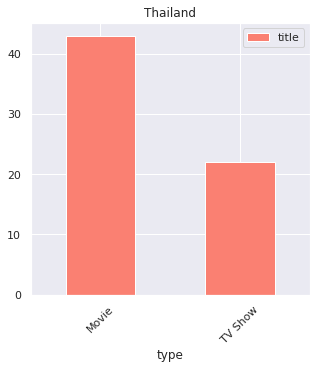

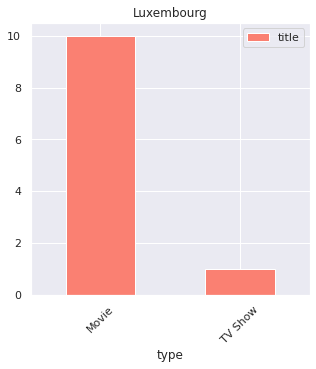

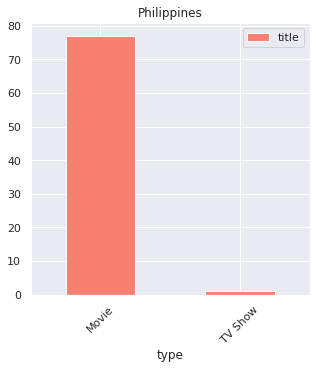

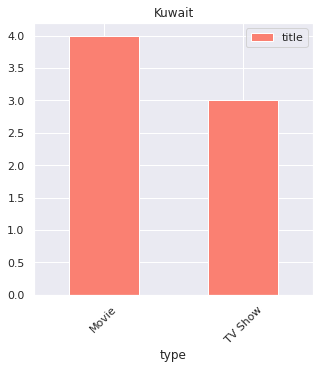

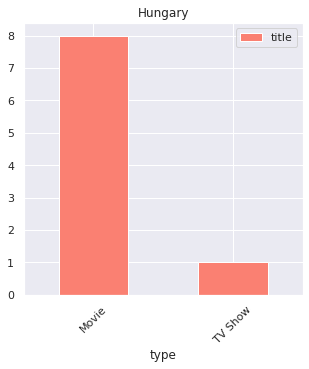

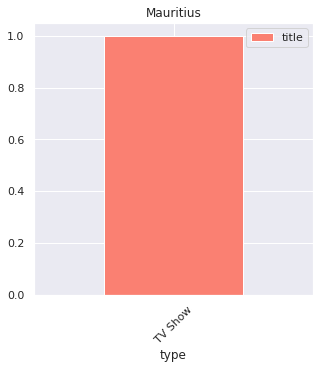

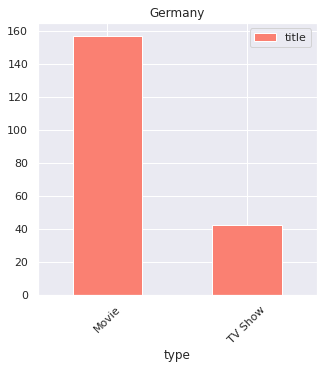

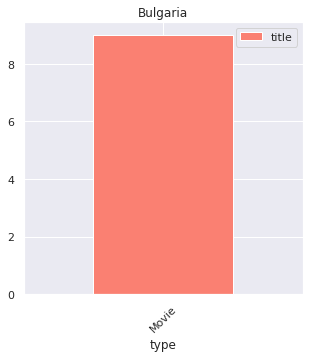

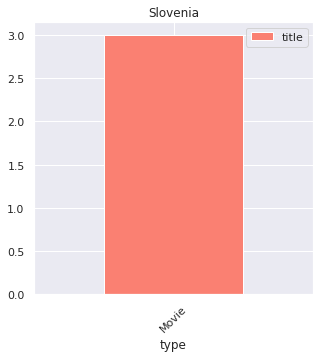

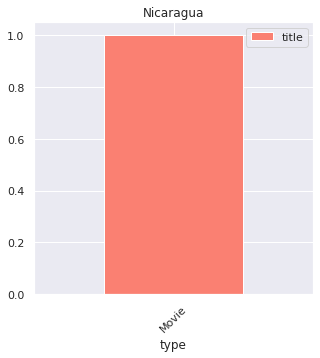

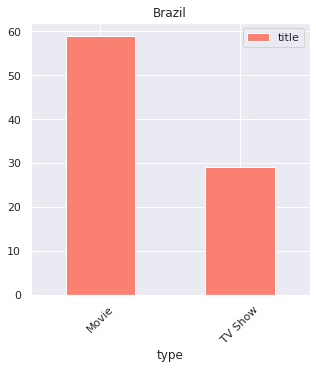

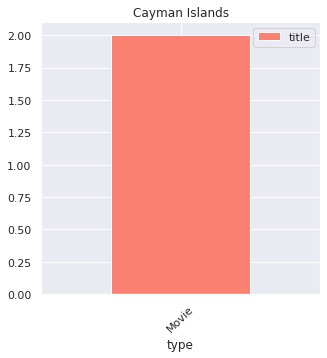

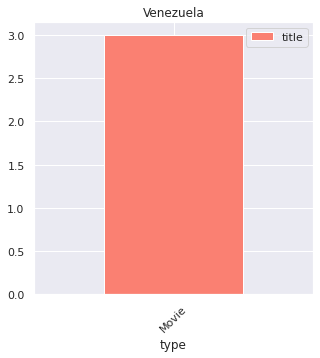

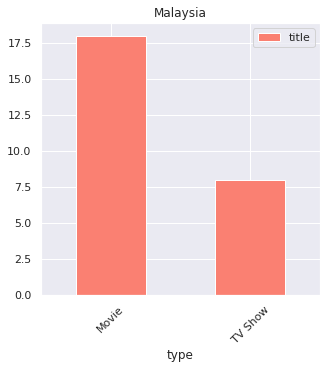

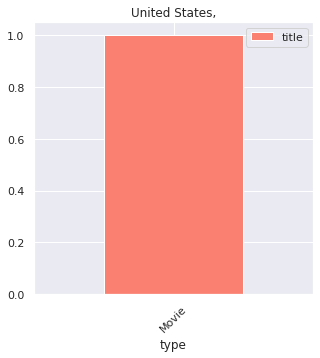

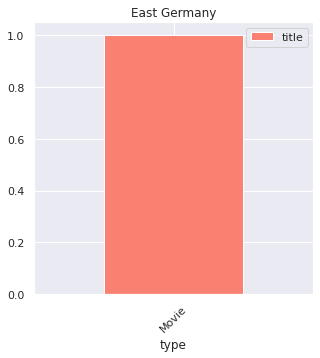

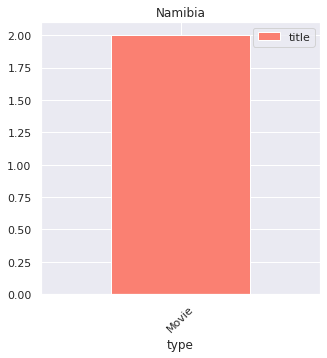

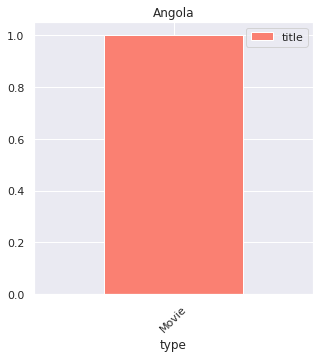

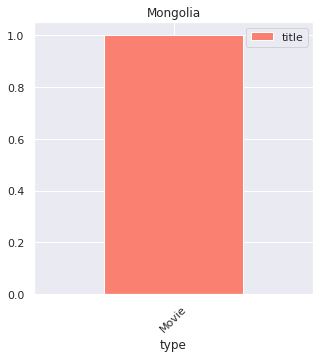

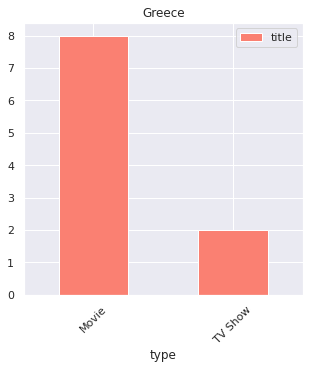

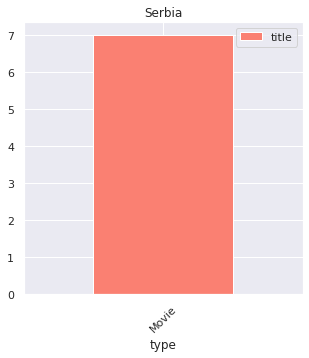

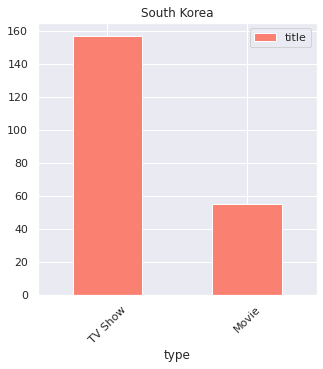

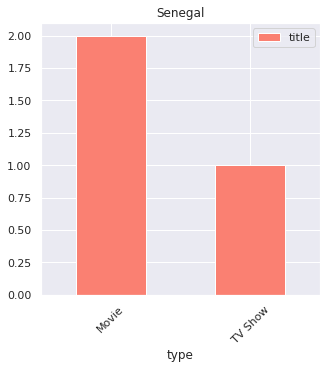

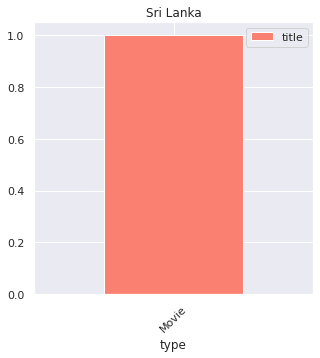

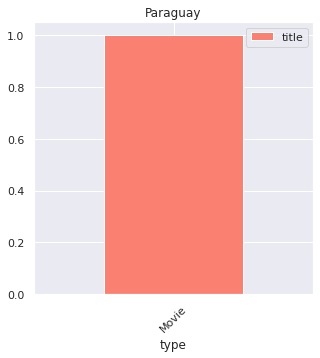

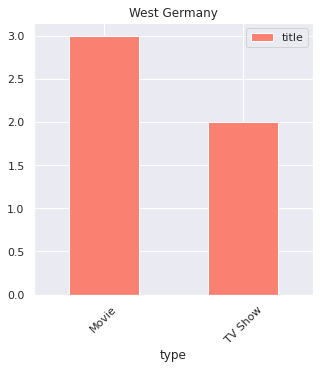

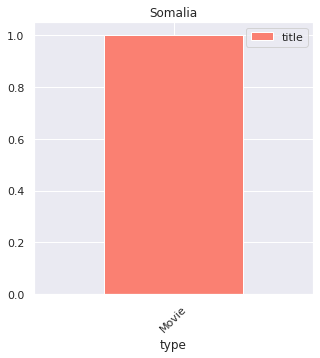

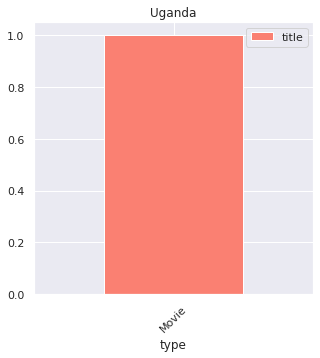

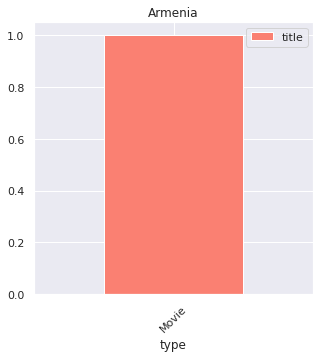

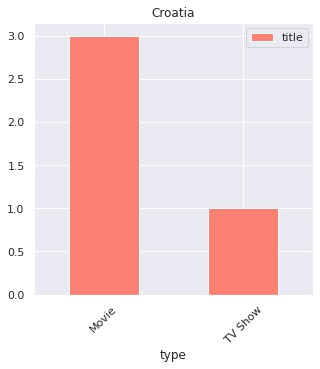

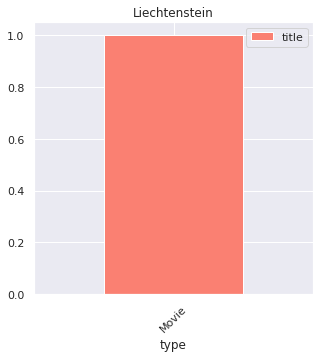

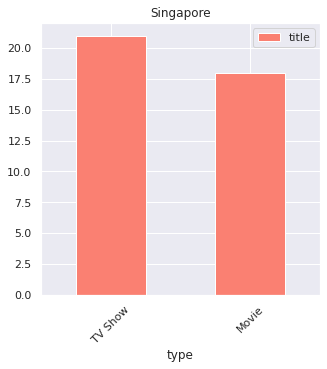

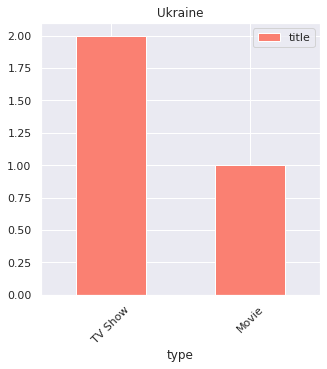

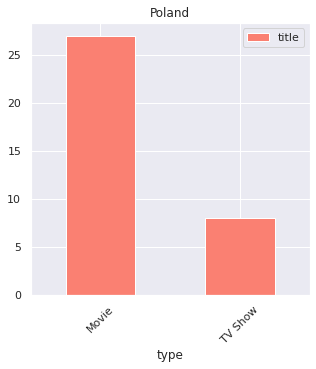

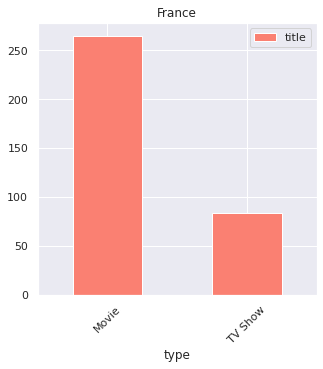

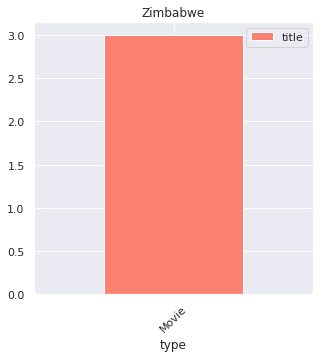

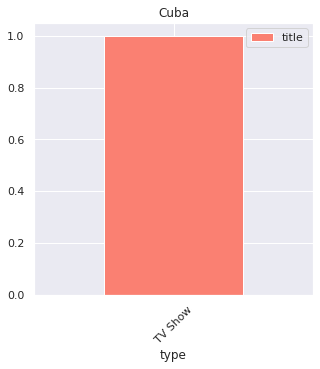

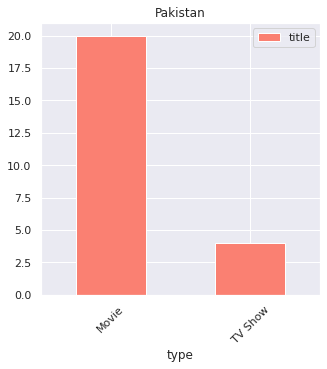

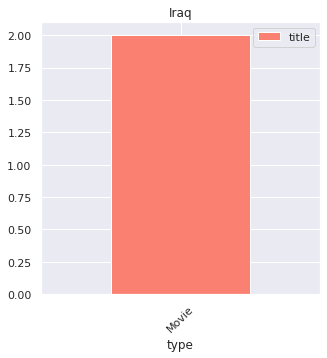

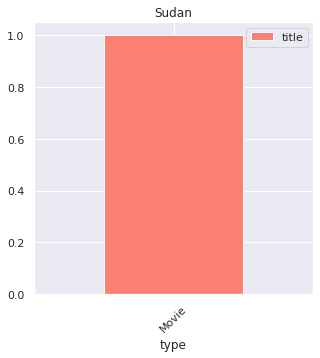

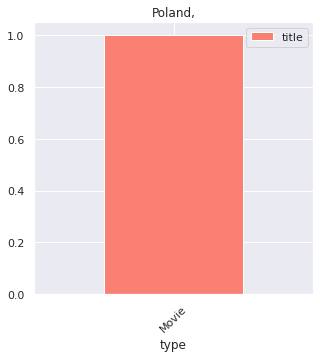

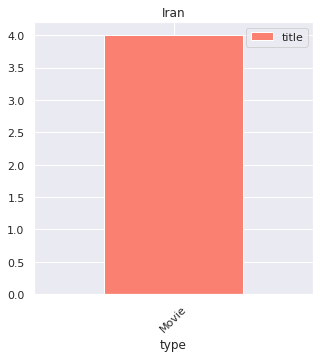

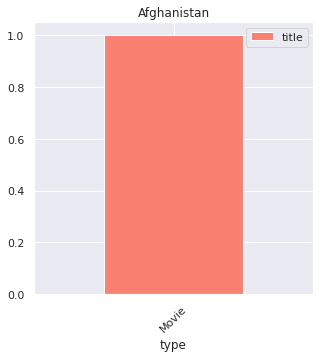

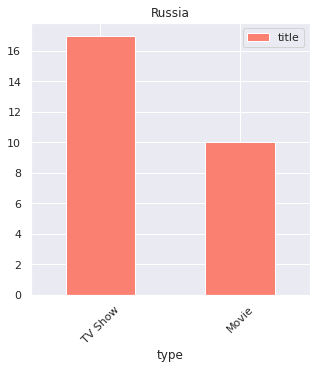

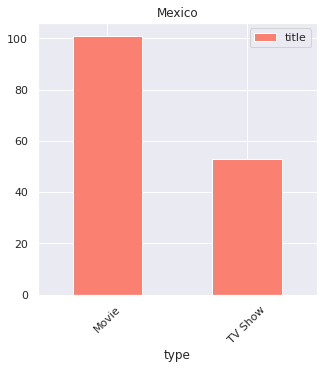

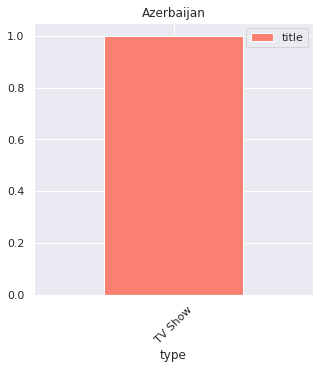

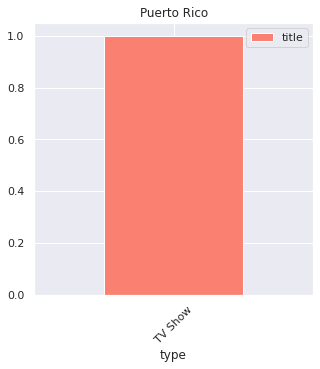

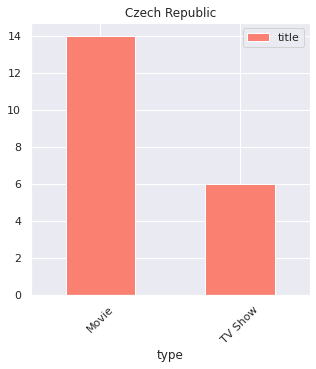

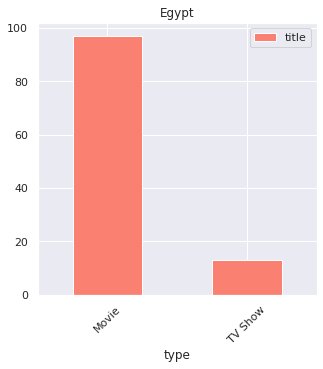

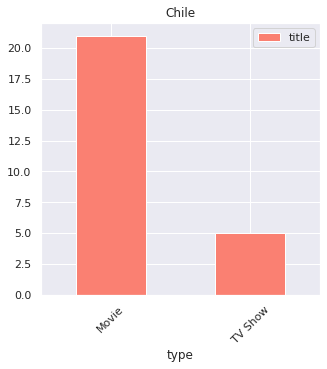

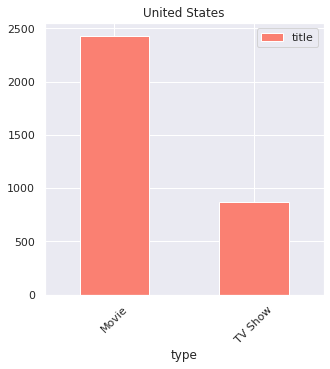

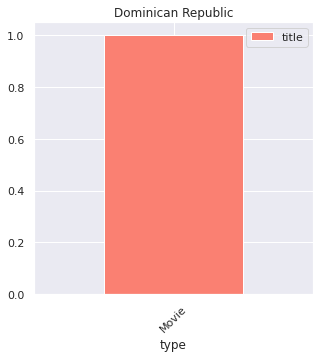

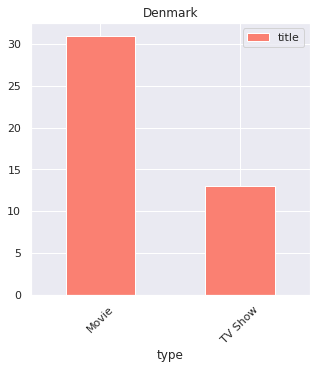

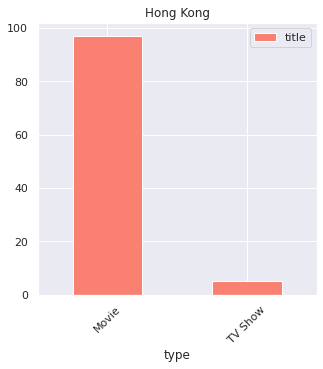

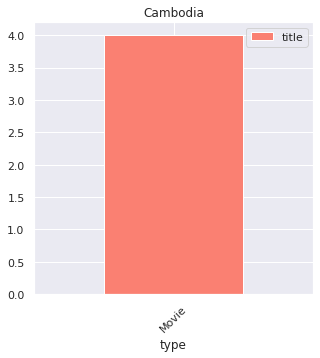

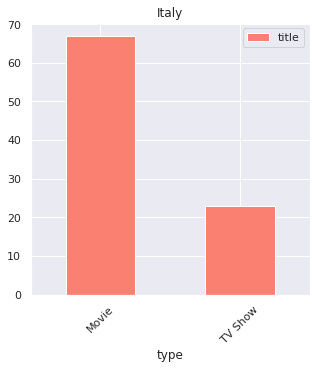

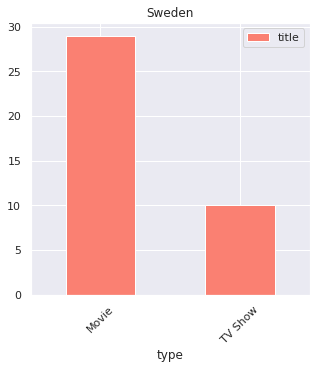

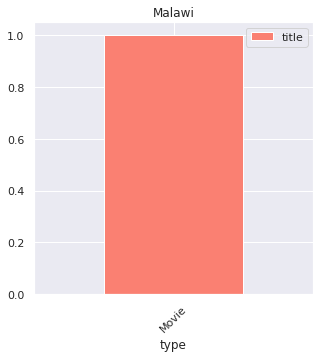

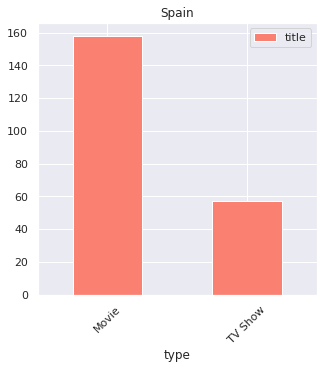

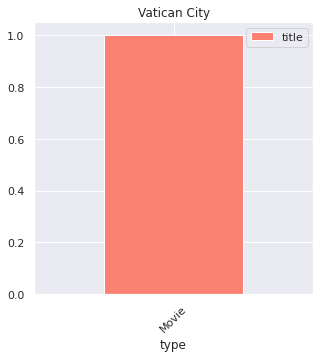

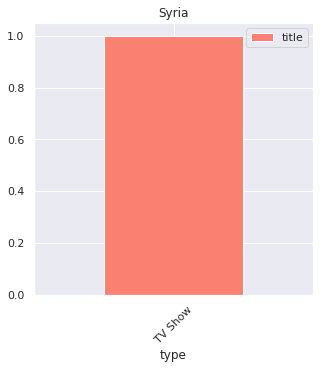

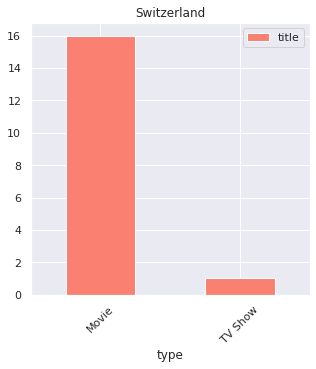

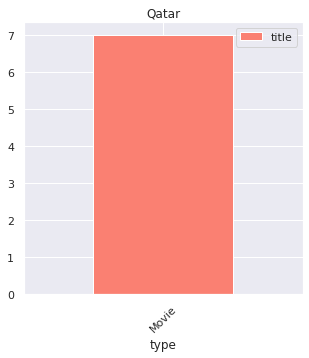

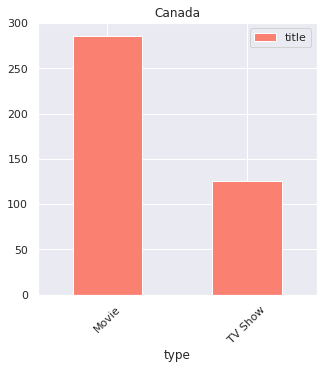

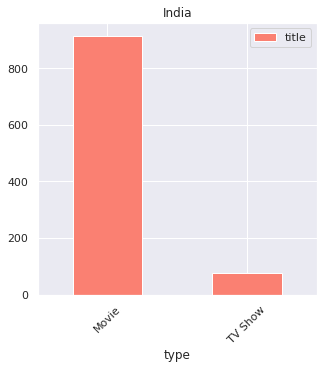

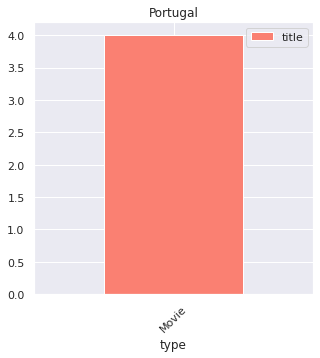

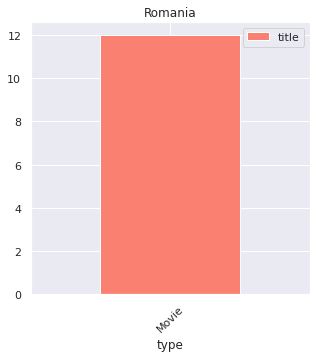

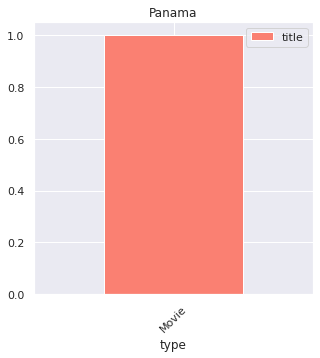

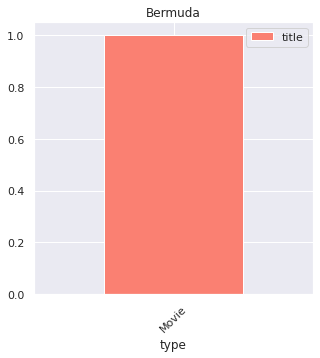

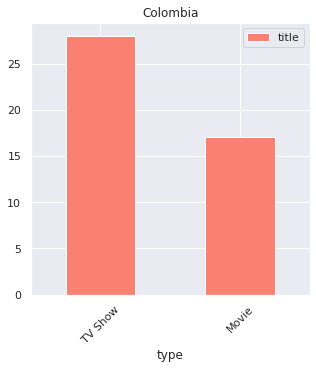

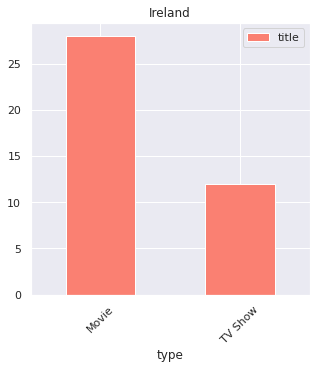

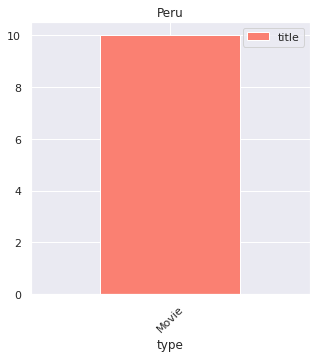

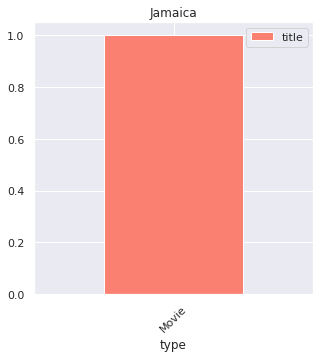

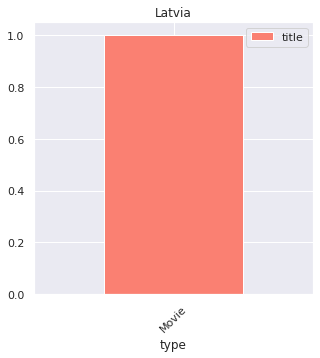

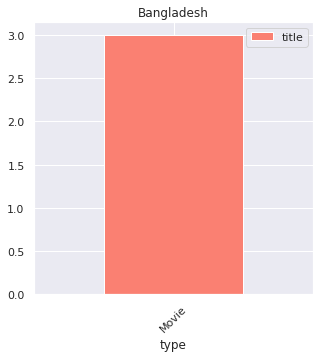

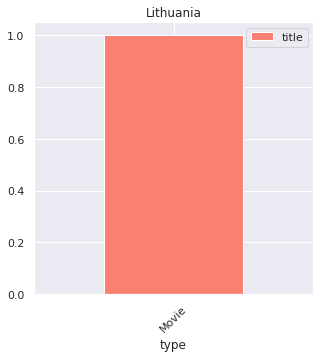

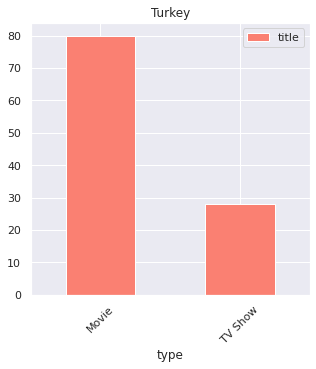

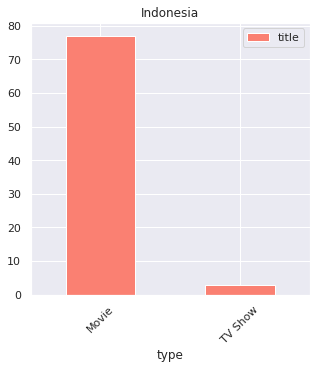

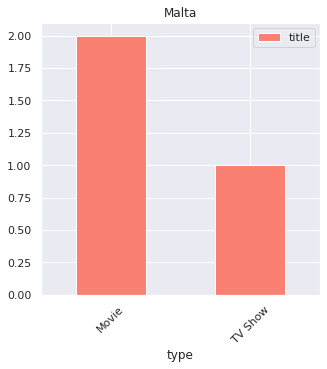

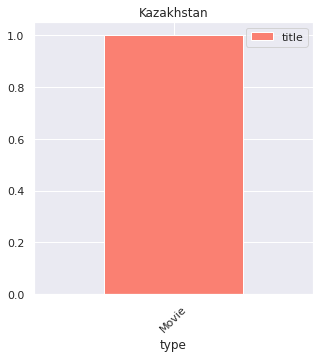

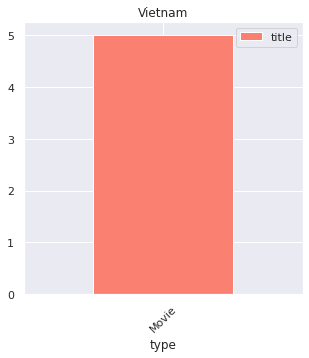

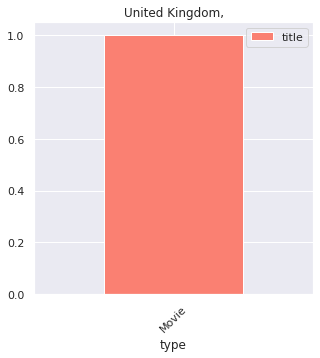

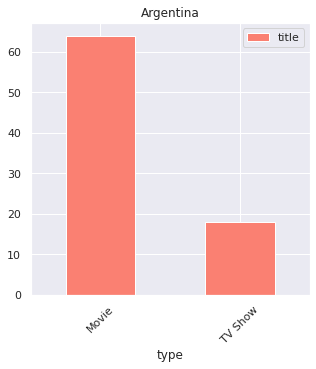

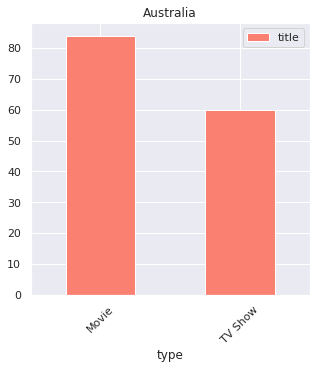

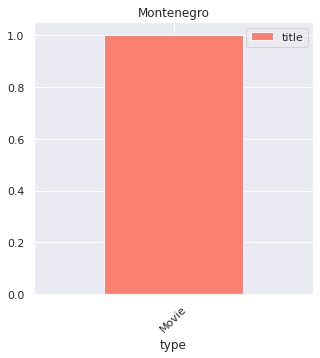

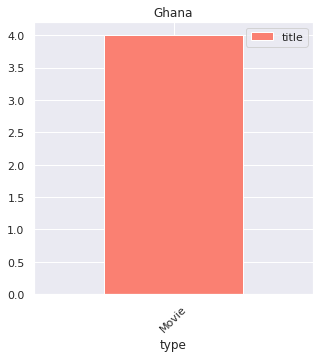

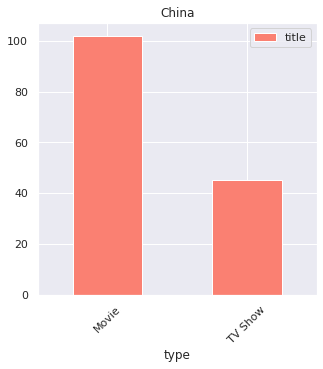

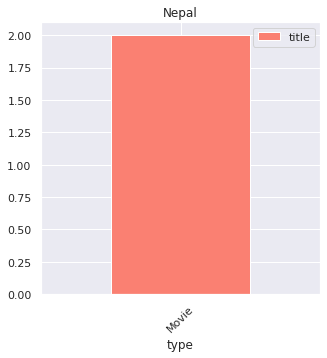

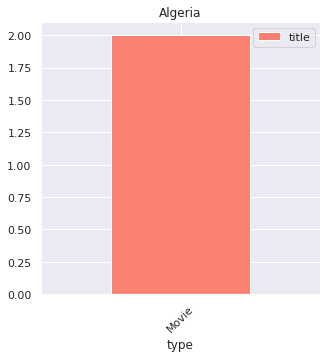

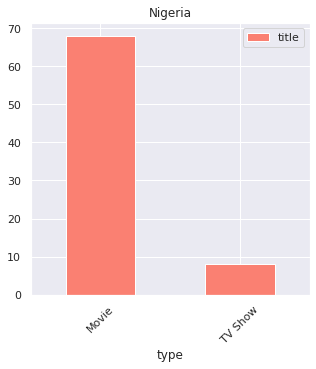

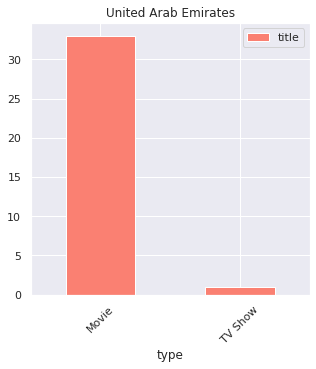

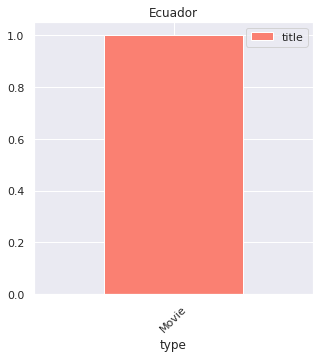

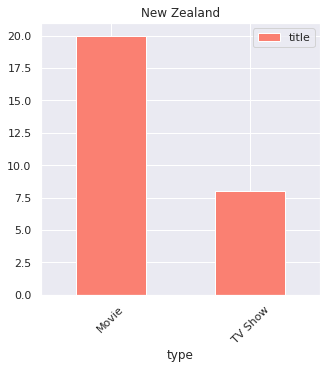

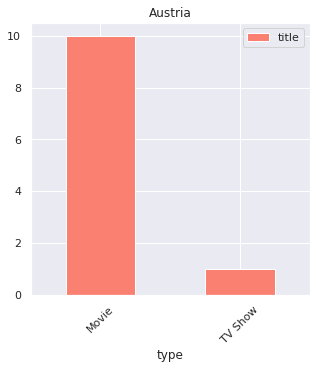

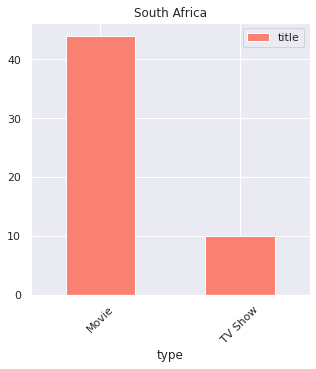

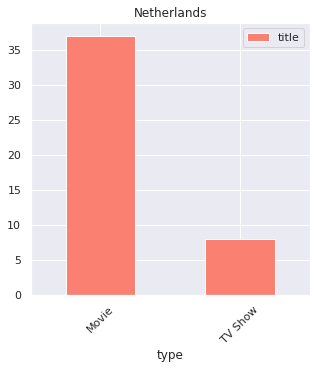

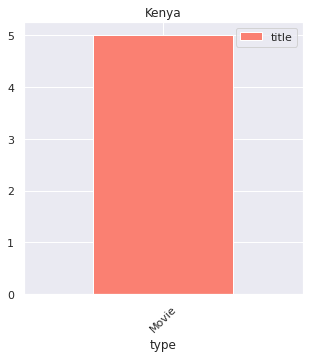

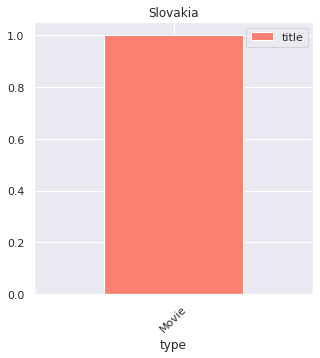

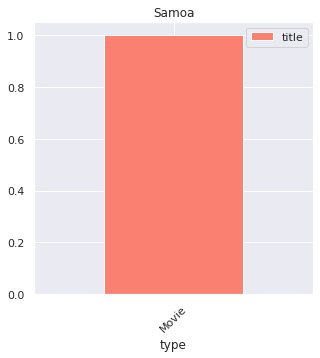

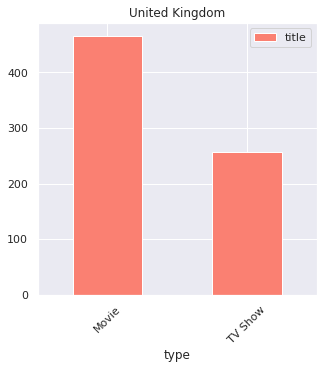

In [120]:
get_country_type_trends(data)

##### 1. Why did you pick the specific chart?

**Barplot :**A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

##### 2. What is/are the insight(s) found from the chart?

First chart shows that which country prefer which type of entertainment program.
Above list of graphs clearly shows the country wise listing for each country.
We can draw lots of useful insights from the above graphs -



*   Most of the countries like Brazil, Mexico, Turkey, Egypt, India etc have produced more International Movies.
*   Countries like Singapore, Japan, South Korea etc have produced more International TV Shows as compared to other genres.
* Contries like US, Poland, iceland Dramas are most produced genre.
* UK is producing more British TV shows.
* Canada have produced most comedies genre shows/movies.




Second chart shows that which country has which type of genres.
Above list of graphs clearly shows the country wise listing in each content rating.
We can draw lots of useful insights from the above graphs -
*  Countries like Brazil, Mexico, United States, Turkey, Egypt, Poland, United Kingdom, Canada etc have produced more number of adult content movie/shows.
*   Countries like India, Singapore, Egypt, Nigeria, Indonesia, Hong Kong etc. are producing more contents which can be consumed by children above 14yrs age.



Third chart shows Which country has which type of rating.
Above list of graphs clearly shows the country wise content type listings.
We can draw lots of useful insights from the above graphs -
*   Most of the countries have produced more movies than TV Shows.
*   Countries like Singapore, Japan, South Korea, Taiwan, Russia, Mauritius etc. have produced more TV shows than movies.
* Mauritius, Syria, Cuba have produced only TV Shows.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this chart we can get very informative and inside detail. Here we get country wise data and trend of these. This data is very useful for decision making of the company(Netflix).From this graph we can know which country has how much contributed for our bussiness.We can take this data as a future reference.

#### Q3. Is number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled?

In [121]:
#Number of TV shows & Movies till 2010
data[data['year_added'] <=2010]['type'].value_counts()

Movie      4
TV Show    1
Name: type, dtype: int64

There are only 4 movies & 1 TV Show till 2010.

In [122]:
#Number of TV shows & Movies till 2017
data[data['year_added'] < 2018]['type'].value_counts()

Movie      1225
TV Show     588
Name: type, dtype: int64

Till year 2017 number of movies became 1225 and number of TV Show became 588.

In [45]:
#Now let's check the Movie and TV count from 2019 to 2021.
data[data['year_added'] >= 2018]['type'].value_counts()

Movie      4152
TV Show    1812
Name: type, dtype: int64

* *The above data shows that number of movies have increased from 1225 to 4152 from year 2017 to year 2021 number of movies has not decreased as shown in the report.*
* *The number of TV Shows have increased from 588 in 2017 to 1812 in 2021. Number of TV Shows have increased more than three times. This statement is truely mentioned in the report.*

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [127]:
data.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
year_added        10
month_added       10
rating             7
target_ages        7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
country_list       0
dtype: int64

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column, 10 in date_added (month_added,year_added) and 7 in rating(7 target_ages). so we need to handle the null values.

In [128]:
# Handling Missing Values & Missing Value Imputation

#Dropping Director Column

data.drop(['target_ages','year_added','month_added','date_added'],axis=1,inplace=True)   # Here we drop these columns because we add these for analysis.

data['cast'].fillna(value='No cast',inplace=True)
data['country'].fillna(value=data['country'].mode()[0],inplace=True)
data['director']=data['director'].fillna('')
data['rating'].fillna(value=data['rating'].mode()[0],inplace=True)


In [129]:
data.isnull().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
country_list    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Deletation of columns having null :** Here First of all, the columns that are created for analysis are removed. 

**Use Appropriate Word :** Here for 'cast' and   'director'  columns we fill the null values with empty space ' '. Because we can not define which movie or TV Shows directed or casted by whom. 

**Use most accurring word :** Here for 'country' and   'rating'  columns we fill the null values with most accurring word . Because probability of belonging to that country and that rating group is more.

### 2. Handling Outliers

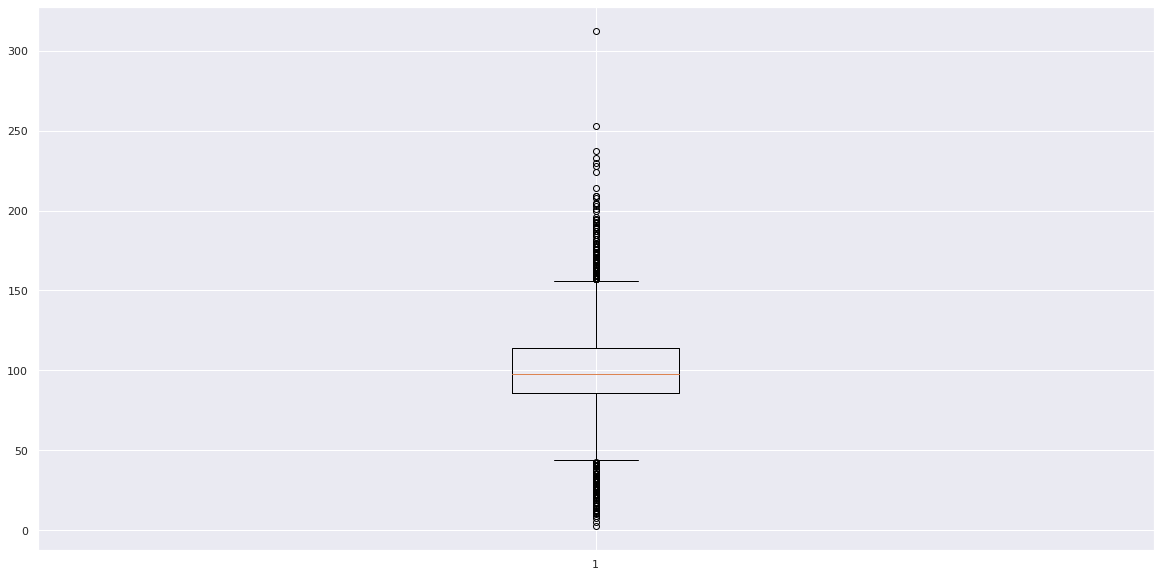

In [131]:
# Handling Outliers & Outlier treatments
plt.boxplot(df_movie['duration'])
plt.show()

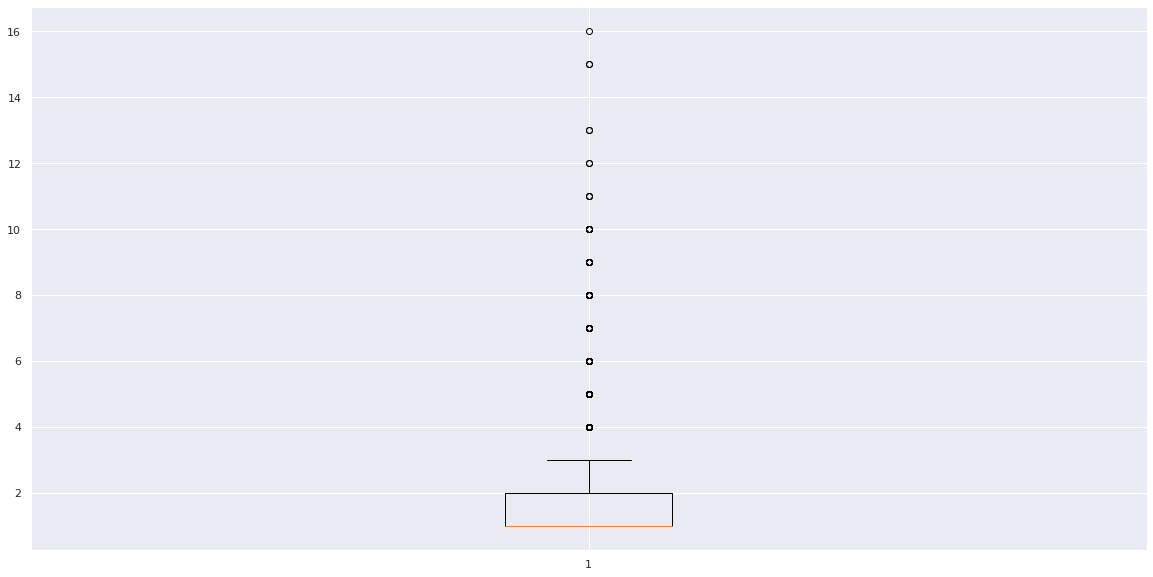

In [132]:
# box plot for tv show duration

plt.boxplot(df_tv["duration"])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here these feature have some outliers. In "movie duration" column we have a major number of ponits in the outer range of box plot but we  don't consider as an outlier because it is a large number and also this coulmn will not be included to get the result (Clustering).

In "show duration" column has less number of outliers so no need to do any treatment .

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we have two  categorical columns type and rating , but for clustering no need to do enncoding.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

# **4. Data preprocessing:**

### **4.1. Modelling Approach:**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:
* Director
* Cast
* Country
* Listed in (genres)
* Description
* Rating

In [136]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = df.copy()

In [137]:
df1.fillna('',inplace=True)

In [139]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])+' '+df1['rating']

In [141]:
df1['clustering_attributes'][20]

'Onir Geetanjali Thapa, Zain Khan Durrani, Shray Rai Tiwari, Mona Ambegaonkar, Chandreyee Ghosh, Barun Chanda, Saheb Bhattacharjee, Shefali Chauhan India Dramas, Independent Movies, International Movies After accidentally connecting over the Internet, two strangers form a tight friendship – not knowing they already share a bond. TV-14'

* **We have successfully added all the necessary data into a single column**

## **4.2. Removing non-ASCII characters:**

In [142]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [143]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [145]:
df1['clustering_attributes'][20]

'Onir Geetanjali Thapa, Zain Khan Durrani, Shray Rai Tiwari, Mona Ambegaonkar, Chandreyee Ghosh, Barun Chanda, Saheb Bhattacharjee, Shefali Chauhan India Dramas, Independent Movies, International Movies After accidentally connecting over the Internet, two strangers form a tight friendship  not knowing they already share a bond. TV-14'

* **We have successfully removed all non-ascii characters from the corpus.**

## **4.3. Remove stopwords and lower case:**

In [146]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [147]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [148]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [150]:
df1['clustering_attributes'][20]

'onir geetanjali thapa, zain khan durrani, shray rai tiwari, mona ambegaonkar, chandreyee ghosh, barun chanda, saheb bhattacharjee, shefali chauhan india dramas, independent movies, international movies accidentally connecting internet, two strangers form tight friendship knowing already share bond. tv-14'

* **We have successfully removed all the stopwords and converted the corpus to lowercase.**

## **4.4. Remove punctuations**

In [151]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [152]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [154]:
df1['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreyee ghosh barun chanda saheb bhattacharjee shefali chauhan india dramas independent movies international movies accidentally connecting internet two strangers form tight friendship knowing already share bond tv14'

* **We have successfully dropped all the punctuation marks from the corpus.**

## **4.5. Lemmatization:**

In [155]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [156]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [157]:
df1['clustering_attributes'][20]

'onir geetanjali thapa zain khan durrani shray rai tiwari mona ambegaonkar chandreyee ghosh barun chanda saheb bhattacharjee shefali chauhan india dramas independent movies international movies accidentally connecting internet two strangers form tight friendship knowing already share bond tv14'

* **We have lemmatized the corpus.**

## **4.6. Tokenization:**

In [158]:
tokenizer = TweetTokenizer()

In [159]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

* **The corpus is converted to tokens.**

## **4.7. Vectorization:**

##### Which text vectorization technique have you used and why?

We use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).

We use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

* We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [160]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [161]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [162]:
X

<7787x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 243303 stored elements in Compressed Sparse Row format>

In [163]:
# Shape of X
X.shape

(7787, 20000)

In [164]:
# data type of vector
type(X)

scipy.sparse.csr.csr_matrix

In [165]:
# convert X into array form for clustering
X = X.toarray()

## **4.8. Dimensionality reduction using PCA:**

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [166]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

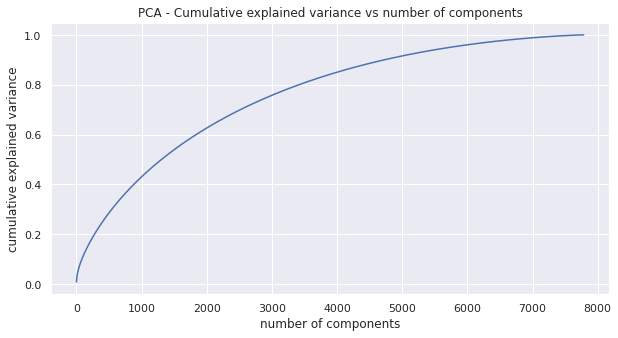

In [167]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that **100%** of the variance is explained by about **~70
00 components**.
* Also, more than **80%** of the variance is explained just by **3500 components**.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [171]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=3500,random_state=42)
pca.fit(X)

PCA(n_components=3500, random_state=42)

In [172]:
# transformed features
x_pca = pca.transform(X)

In [173]:
# shape of transformed vectors
x_pca.shape

(7787, 3500)

In [174]:
len(pca.explained_variance_ratio_)

3500

In [175]:
pca.explained_variance_ratio_.sum() 

0.8025526280888531

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Here we use Pricipal Component Analysis (PCA) Technique for dimensionality reduction.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. 

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***